<b><font color="SteelBlue" size="+3">Préparez des données pour un organisme de santé publique</font></b>

# Introduction

## Contexte

Dans le cadre d'une initiative de l'agence Santé publique France, nous abordons un projet ambitieux visant à améliorer la base de données Open Food Facts, une ressource open source cruciale dans la compréhension de la qualité nutritionnelle des produits alimentaires. Cette base de données, utilisée tant par des particuliers que des organisations, souffre actuellement de lacunes liées à des erreurs de saisie et à l'absence de certaines informations. Pour y remédier, notre entreprise a été sollicitée pour développer un système de suggestion ou d'auto-complétion, facilitant ainsi l'ajout de données par les utilisateurs. Ce projet s'inscrit dans une démarche d'amélioration continue de la qualité des informations nutritionnelles disponibles pour le grand public.

## Objectifs

Notre objectif principal est la création d'un outil d'auto-complétion efficace et fiable pour la base de données Open Food Facts. La première étape consistera à nettoyer et explorer en profondeur les données actuelles, en identifiant et traitant les valeurs manquantes et aberrantes. Nous devrons également automatiser ces traitements pour assurer leur efficacité sur des données évolutives. Parallèlement, une analyse statistique univariée et multivariée sera menée pour comprendre les dynamiques sous-jacentes des données. 

## Imports

In [1]:
# Chargement des librairies
# Builtin
import os
from IPython.display import display

# Data
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from IPython.display import Image

## Data

In [2]:
os.listdir()

['.ipynb_checkpoints',
 'data',
 'Deveau_Estelle_1_notebook_012024.ipynb',
 'OC_projet3.pdf',
 'OC_projet3.pptx',
 '~$OC_projet3.pptx']

In [3]:
os.listdir("data/sources/")

['fr.openfoodfacts.org.products.csv', 'fr.openfoodfacts.org.products.csv.zip']

In [4]:
path     = "./data/sources/"
filename1 = "fr.openfoodfacts.org.products.csv"

In [5]:
data = pd.read_csv(path + filename1, sep='\t', encoding='utf-8')

C:\Users\estel\AppData\Local\Temp\ipykernel_311376\1506192187.py:1: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path + filename1, sep='\t', encoding='utf-8')


# Exploration des données

## Quick tour

In [6]:
data.head()

code                                                url  \
0   3087  http://world-fr.openfoodfacts.org/produit/0000...   
1   4530  http://world-fr.openfoodfacts.org/produit/0000...   
2   4559  http://world-fr.openfoodfacts.org/produit/0000...   
3  16087  http://world-fr.openfoodfacts.org/produit/0000...   
4  16094  http://world-fr.openfoodfacts.org/produit/0000...   

                      creator   created_t      created_datetime  \
0  openfoodfacts-contributors  1474103866  2016-09-17T09:17:46Z   
1             usda-ndb-import  1489069957  2017-03-09T14:32:37Z   
2             usda-ndb-import  1489069957  2017-03-09T14:32:37Z   
3             usda-ndb-import  1489055731  2017-03-09T10:35:31Z   
4             usda-ndb-import  1489055653  2017-03-09T10:34:13Z   

  last_modified_t last_modified_datetime                    product_name  \
0      1474103893   2016-09-17T09:18:13Z              Farine de blé noir   
1      1489069957   2017-03-09T14:32:37Z  Banana Chips Sweetened (Whole)   
2      1489069957   2017-03-09T14:32:37Z                         Peanuts   
3      1489055731   2017-03-09T10:35:31Z          Organic Salted Nut Mix   
4      1489055653   2017-03-09T10:34:13Z                 Organic Polenta   

  generic_name quantity  ... ph_100g fruits-vegetables-nuts_100g  \
0          NaN      1kg  ...     NaN                         NaN   
1          NaN      NaN  ...     NaN                         NaN   
2          NaN      NaN  ...     NaN                         NaN   
3          NaN      NaN  ...     NaN                         NaN   
4          NaN      NaN  ...     NaN                         NaN   

  collagen-meat-protein-ratio_100g cocoa_100g chlorophyl_100g  \
0                              NaN        NaN             NaN   
1                              NaN        NaN             NaN   
2                              NaN        NaN             NaN   
3                              NaN        NaN             NaN   
4                              NaN        NaN             NaN   

  carbon-footprint_100g nutrition-score-fr_100g nutrition-score-uk_100g  \
0                   NaN                     NaN                     NaN   
1                   NaN                    14.0                    14.0   
2                   NaN                     0.0                     0.0   
3                   NaN                    12.0                    12.0   
4                   NaN                     NaN                     NaN   

  glycemic-index_100g water-hardness_100g  
0                 NaN                 NaN  
1                 NaN                 NaN  
2                 NaN                 NaN  
3                 NaN                 NaN  
4                 NaN                 NaN  

[5 rows x 162 columns]

In [7]:
data.shape

(320772, 162)

In [8]:
# Modification des affichages de colonnes, lignes et largeurs de colonnes pour avoir un maximum d'information
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [9]:
data.dtypes.value_counts()

float64    106
object      56
Name: count, dtype: int64

In [10]:
data.describe()

no_nutriments    additives_n  ingredients_from_palm_oil_n  \
count            0.0  248939.000000                248939.000000   
mean             NaN       1.936024                     0.019659   
std              NaN       2.502019                     0.140524   
min              NaN       0.000000                     0.000000   
25%              NaN       0.000000                     0.000000   
50%              NaN       1.000000                     0.000000   
75%              NaN       3.000000                     0.000000   
max              NaN      31.000000                     2.000000   

       ingredients_from_palm_oil  ingredients_that_may_be_from_palm_oil_n  \
count                        0.0                            248939.000000   
mean                         NaN                                 0.055246   
std                          NaN                                 0.269207   
min                          NaN                                 0.000000   
25%                          NaN                                 0.000000   
50%                          NaN                                 0.000000   
75%                          NaN                                 0.000000   
max                          NaN                                 6.000000   

       ingredients_that_may_be_from_palm_oil  nutrition_grade_uk  \
count                                    0.0                 0.0   
mean                                     NaN                 NaN   
std                                      NaN                 NaN   
min                                      NaN                 NaN   
25%                                      NaN                 NaN   
50%                                      NaN                 NaN   
75%                                      NaN                 NaN   
max                                      NaN                 NaN   

        energy_100g  energy-from-fat_100g       fat_100g  saturated-fat_100g  \
count  2.611130e+05            857.000000  243891.000000       229554.000000   
mean   1.141915e+03            585.501214      12.730379            5.129932   
std    6.447154e+03            712.809943      17.578747            8.014238   
min    0.000000e+00              0.000000       0.000000            0.000000   
25%    3.770000e+02             49.400000       0.000000            0.000000   
50%    1.100000e+03            300.000000       5.000000            1.790000   
75%    1.674000e+03            898.000000      20.000000            7.140000   
max    3.251373e+06           3830.000000     714.290000          550.000000   

       butyric-acid_100g  caproic-acid_100g  caprylic-acid_100g  \
count                0.0                0.0                 1.0   
mean                 NaN                NaN                 7.4   
std                  NaN                NaN                 NaN   
min                  NaN                NaN                 7.4   
25%                  NaN                NaN                 7.4   
50%                  NaN                NaN                 7.4   
75%                  NaN                NaN                 7.4   
max                  NaN                NaN                 7.4   

       capric-acid_100g  lauric-acid_100g  myristic-acid_100g  \
count          2.000000          4.000000                 1.0   
mean           6.040000         36.136182                18.9   
std            0.226274         24.101433                 NaN   
min            5.880000          0.044730                18.9   
25%            5.960000         34.661183                18.9   
50%            6.040000         47.600000                18.9   
75%            6.120000         49.075000                18.9   
max            6.200000         49.300000                18.9   

       palmitic-acid_100g  stearic-acid_100g  arachidic-acid_100g  \
count                 1.0                1.0            24.000000   
mean                  8.1             

In [11]:
data.nunique()

code                                          320638
url                                           320749
creator                                         3535
created_t                                     189636
created_datetime                              189568
last_modified_t                               180639
last_modified_datetime                        180495
product_name                                  221347
generic_name                                   38584
quantity                                       13826
packaging                                      14547
packaging_tags                                 12064
brands                                         58784
brands_tags                                    50253
categories                                     36982
categories_tags                                21142
categories_fr                                  21152
origins                                         4840
origins_tags                                  

In [12]:
# Valeurs manquantes
missing_values_count = data.isnull().sum()
total_cells = np.product(data.shape)
total_missing = missing_values_count.sum()
percent_missing = (total_missing/total_cells) * 100
print('Le pourcentage de valeurs manquantes est de', round(percent_missing, 2),'%')

Le pourcentage de valeurs manquantes est de 76.22 %


In [13]:
percent_missing_values =  round((missing_values_count / len(data)) * 100, 2)
missing_data = pd.concat([missing_values_count, percent_missing_values], axis=1, keys=['Nombre de valeurs manquantes', 'Pourcentage de valeurs manquantes'])
display(missing_data)

Nombre de valeurs manquantes  \
code                                                                  23   
url                                                                   23   
creator                                                                2   
created_t                                                              3   
created_datetime                                                       9   
last_modified_t                                                        0   
last_modified_datetime                                                 0   
product_name                                                       17762   
generic_name                                                      267977   
quantity                                                          215953   
packaging                                                         241812   
packaging_tags                                                    241811   
brands                                                             28412   
brands_tags                                                        28420   
categories                                                        236362   
categories_tags                                                   236383   
categories_fr                                                     236361   
origins                                                           298582   
origins_tags                                                      298619   
manufacturing_places                                              284271   
manufacturing_places_tags                                         284277   
labels                                                            274213   
labels_tags                                                       274128   
labels_fr                                                         274106   
emb_codes                                                         291466   
emb_codes_tags                                                    291469   
first_packaging_code_geo                                          301969   
cities                                                            320749   
cities_tags                                                       300452   
purchase_places                                                   262579   
stores                                                            269050   
countries                                                            280   
countries_tags                                                       280   
countries_fr                                                         280   
ingredients_text                                                   71810   
allergens                                                         292428   
allergens_fr                                                      320753   
traces                                                            296419   
traces_tags                                                       296443   
traces_fr                                                         296420   
serving_size                                                      109441   
no_nutriments                                                     320772   
additives_n                                                        71833   
additives                                                          71867   
additives_tags                                                    166092   
additives_fr                                                      166092   
ingredients_from_palm_oil_n                                        71833   
ingredients_from_palm_oil                                         320772   
ingredients_from_palm_oil_tags                                    315937   
ingredients_that_may_be_from_palm_oil_n                            71833   
ingredients_that_may_be_from_palm_oil                             320772   
ingredients_that_may_be_from_palm_oil_tags                        309076   
nutrition_grade_

<Axes: title={'center': 'Valeurs présentes dans notre jeu de données'}>

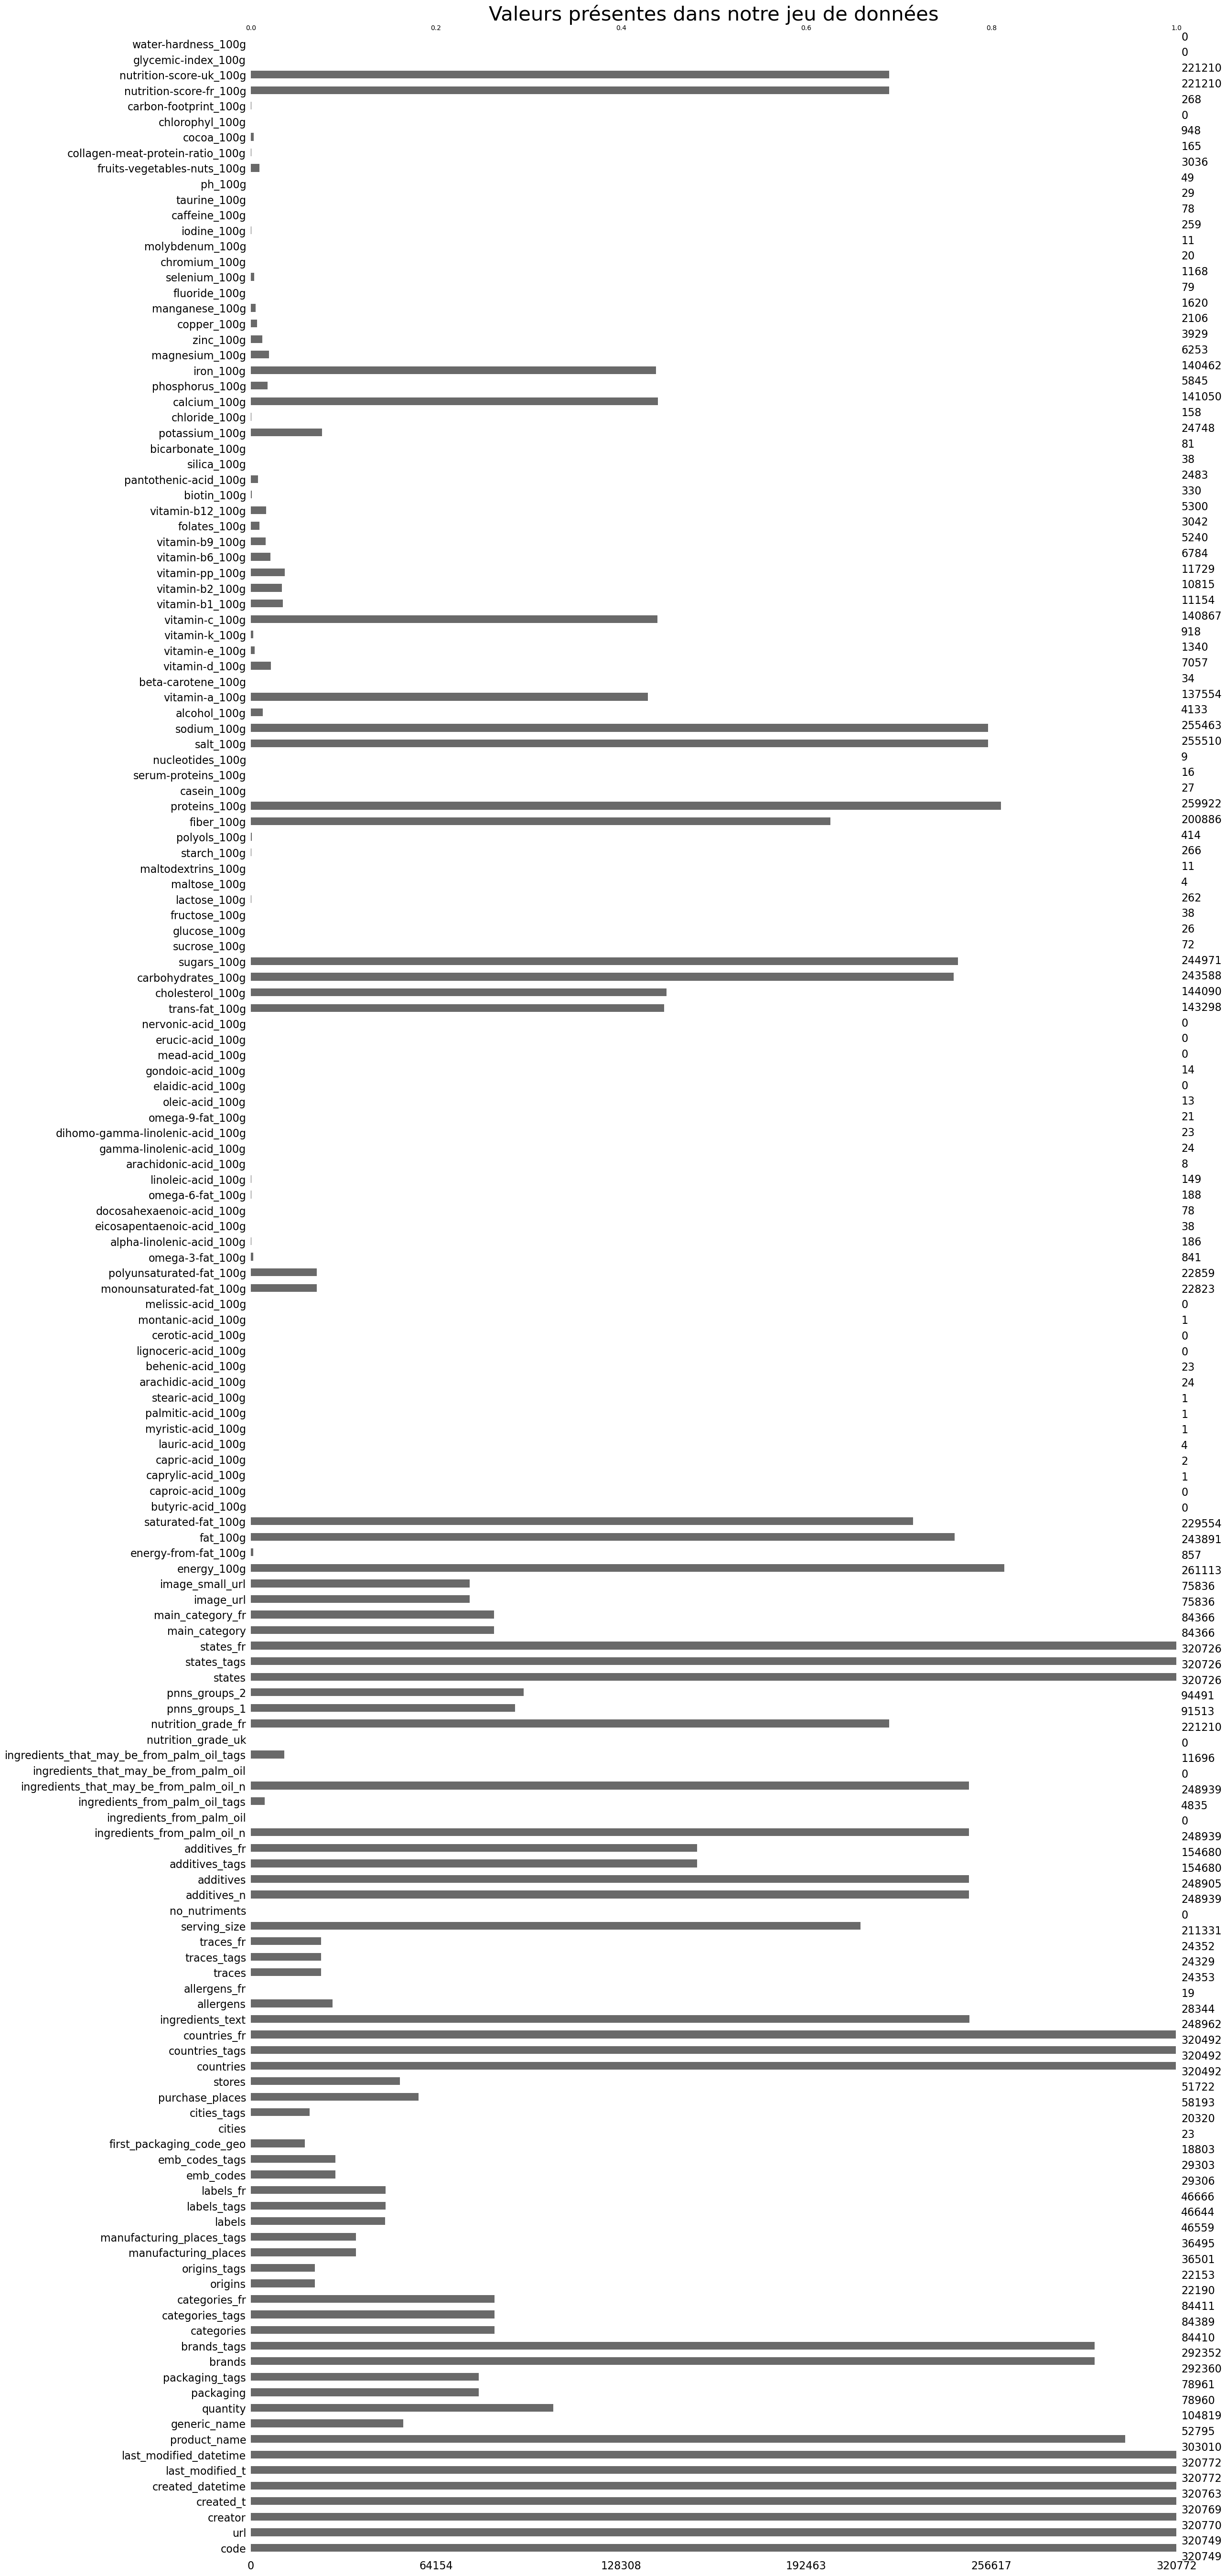

In [14]:
plt.title("Valeurs présentes dans notre jeu de données", fontsize=30)
msno.bar(data)

Beaucoup de valeurs manquantes, dont plus de 5% des noms de produits, et quelques colonnes entièrement vides.

<Axes: >

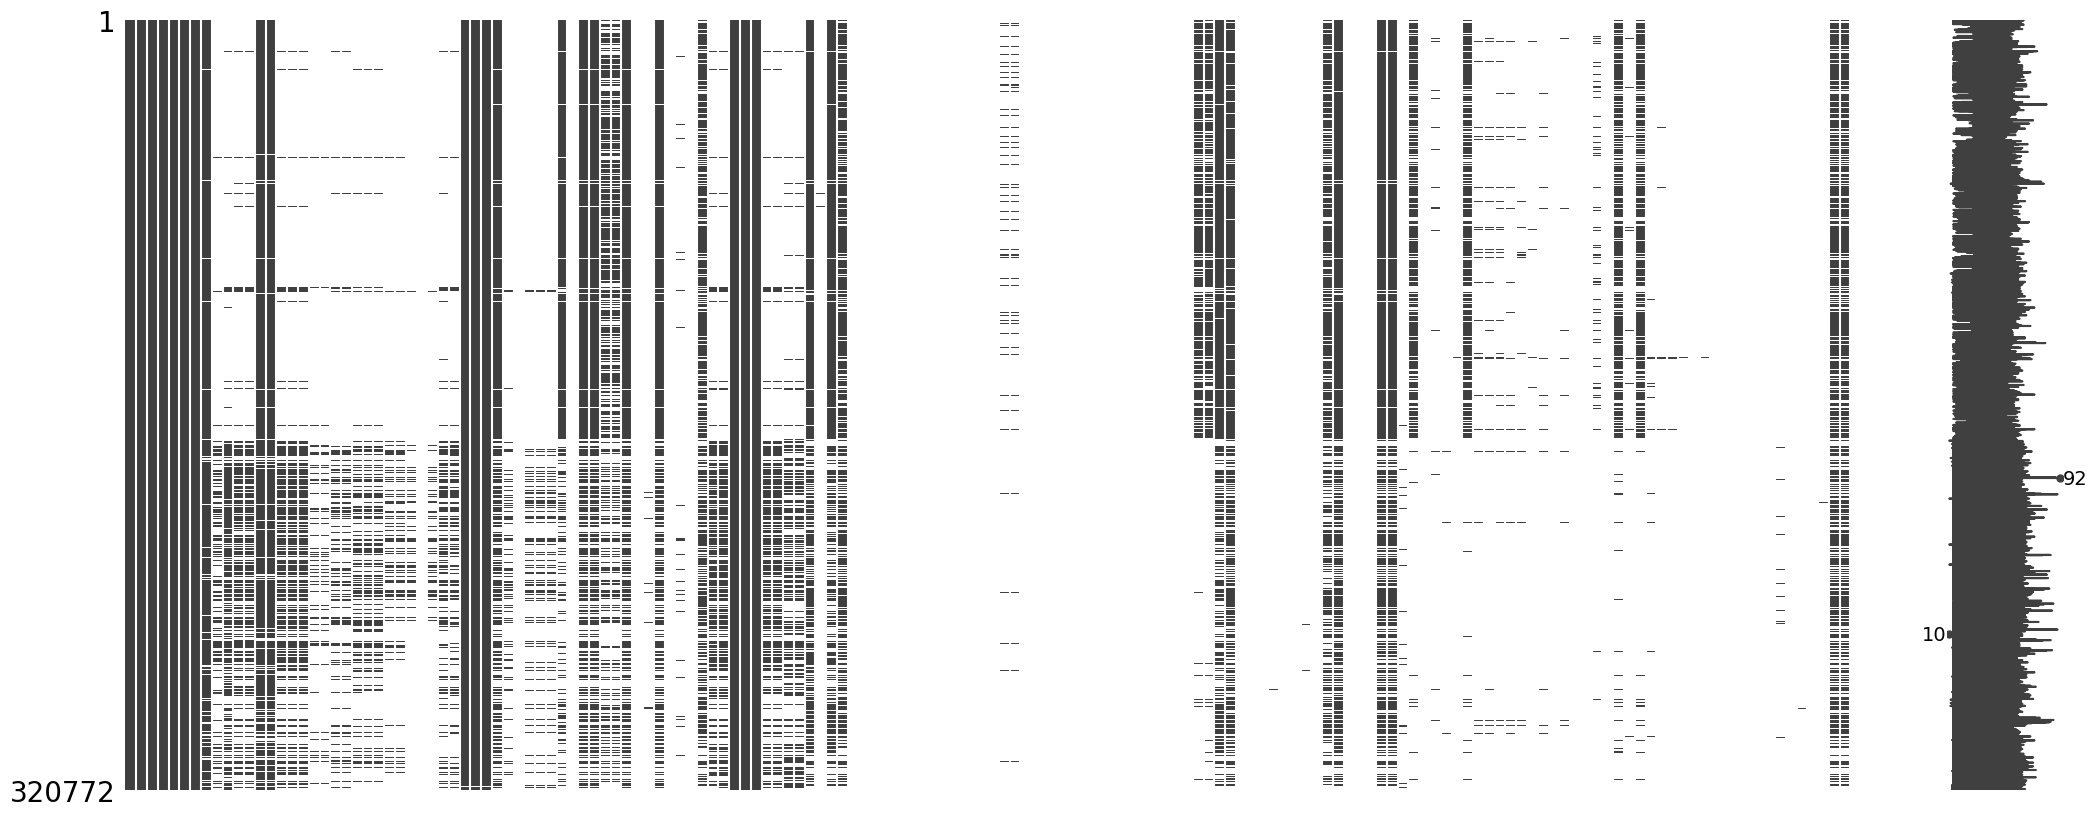

In [15]:
msno.matrix(data)

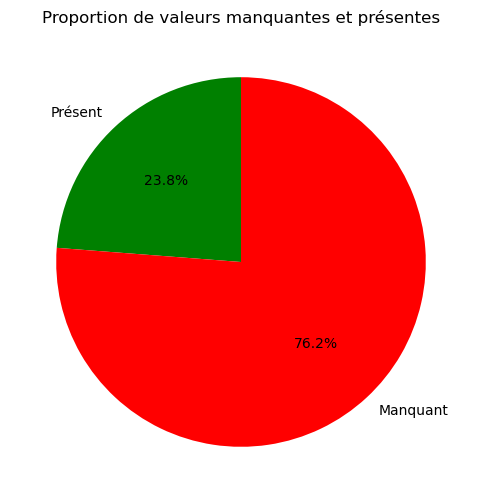

In [16]:
# Créer un diagramme en pour visualiser les valeurs manquantes et présentes
plt.figure(figsize=(6, 6))
plt.pie([data.notnull().sum().sum(), data.isnull().sum().sum()], labels=['Présent', 'Manquant'], colors=['g', 'r'], autopct='%1.1f%%', startangle=90)
plt.title("Proportion de valeurs manquantes et présentes")
plt.show()

## Définition et Compréhension des Variables

Après analyse des variables, nous pouvons les classer en 7 catégories :

1. Informations Générales sur le Produit<br>
    Identifiants et URL: 'code', 'url'<br>
    Création et Modification: 'creator', 'created_t', 'created_datetime', 'last_modified_t', 'last_modified_datetime'<br>
    Nom et Description: 'product_name', 'generic_name'<br>
    Quantité et Emballage: 'quantity', 'packaging', 'packaging_tags'<br>

2. Informations de Marque et de Fabrication<br>
    Marques: 'brands', 'brands_tags'<br>
    Lieux de Fabrication: 'manufacturing_places', 'manufacturing_places_tags', 'first_packaging_code_geo'<br>
    Labels: 'labels', 'labels_tags', 'labels_fr'<br>

3. Catégorisation et Origine du Produit<br>
    Catégories: 'categories', 'categories_tags', 'categories_fr', 'main_category', 'main_category_fr'<br>
    Origines: 'origins', 'origins_tags'<br>
    Lieux d'Achat et de Vente: 'purchase_places', 'stores', 'cities', 'cities_tags', 'countries', 'countries_tags', 'countries_fr'<br>

4. Ingrédients et Additifs<br>
    Ingrédients: 'ingredients_text', 'additives_n', 'additives', 'additives_tags', 'additives_fr'<br>
    Allergènes et Traces: 'allergens', 'allergens_fr', 'traces', 'traces_tags', 'traces_fr'<br>
    Huile de Palme: 'ingredients_from_palm_oil_n', 'ingredients_from_palm_oil', 'ingredients_from_palm_oil_tags', 'ingredients_that_may_be_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil', 'ingredients_that_may_be_from_palm_oil_tags'<br>

5. Informations Nutritionnelles<br>
    Valeurs Énergétiques et Graisses: 'energy_100g', 'energy-from-fat_100g', 'fat_100g', 'saturated-fat_100g', divers acides gras.<br>
    Sucres et Glucides: 'carbohydrates_100g', 'sugars_100g', 'sucrose_100g', 'glucose_100g', 'fructose_100g', 'lactose_100g', 'maltose_100g', 'maltodextrins_100g', 'starch_100g', 'polyols_100g'<br>
    Protéines et Fibres: 'proteins_100g', 'fiber_100g', 'casein_100g', 'serum-proteins_100g', 'nucleotides_100g'<br>
    Sels et Minéraux: 'salt_100g', 'sodium_100g', 'calcium_100g', 'iron_100g', 'potassium_100g', autres minéraux.<br>
    Vitamines: 'vitamin-a_100g', 'vitamin-d_100g', 'vitamin-e_100g', 'vitamin-k_100g', 'vitamin-c_100g', autres vitamines.<br>
    Autres Nutriments: 'alcohol_100g', 'caffeine_100g', 'taurine_100g', 'ph_100g', 'fruits-vegetables-nuts_100g', 'collagen-meat-protein-ratio_100g', 'cocoa_100g'<br>

6. Évaluation Environnementale et Nutritionnelle<br>
    Empreinte Carbone et Durabilité: 'carbon-footprint_100g', 'water-hardness_100g', 'chlorophyl_100g'<br>
    Scores Nutritionnels: 'nutrition-score-fr_100g', 'nutrition_grade_fr', 'nutrition-score-uk_100g', 'glycemic-index_100g'<br>

7. Autres Informations<br>
    Images : 'image_url', 'image_small_url'<br>
    États et Statuts : 'states', 'states_tags', 'states_fr' <br>
    Groupes PNNS : 'pnns_groups_1', 'pnns_groups_2'<br>

## Sélection de la variable cible et élimination des colonnes non pertinentes.

Dans le cadre de notre projet dédié à l'optimisation de la base de données Open Food Facts pour l'agence Santé publique France, notre choix s'est porté sur la variable 'nutrition_grade_fr' comme cible principale.

Comme le 'nutrition_grade_fr' ne concerne que la France, nous allons commencer par ne conserver que les produits vendus en France.

In [17]:
# Afficher les valeurs uniques dans la colonne 'countries_tags'
unique_countries = data['countries_tags'].unique()
print(unique_countries)


['en:france' 'en:united-states' 'en:united-kingdom'
 'en:france,en:united-states' 'en:canada' 'en:switzerland' 'en:spain'
 'en:germany' 'en:slovenia' 'en:italy' 'en:romania' 'en:australia'
 'en:portugal' 'en:france,en:united-kingdom'
 'en:belgium,en:france,en:netherlands,en:united-kingdom' 'en:guadeloupe'
 nan 'en:united-kingdom,en:united-states' 'en:canada,en:united-states'
 'en:netherlands' 'en:australia,en:france'
 'en:canada,en:france,en:switzerland,en:united-states'
 'en:france,en:united-states,en:etats-unis' 'en:ireland'
 'en:france,en:reunion' 'en:taiwan' 'en:australia,en:switzerland'
 'en:france,en:germany' 'en:brazil' 'en:belgium,en:france'
 'en:dominican-republic' 'en:united-states,en:australie' 'en:saudi-arabia'
 'en:united-arab-emirates' 'en:iraq' 'en:kuwait' 'en:moldova' 'en:belgium'
 'en:new-caledonia' 'en:singapore' 'en:finland'
 'en:australia,en:united-states' 'en:france,en:switzerland'
 'en:australia,en:new-zealand,en:singapore,en:thailand,en:united-states'
 'en:french

In [18]:
# Fonction pour filtrer les données et ne garder que les lignes où 'countries_tags' contient 'france'
def keep_fr_data(dataframe):
    dataframe = dataframe[dataframe['countries_tags'].str.contains('france', case=False, na=False)]
    return dataframe

In [19]:
# Conserver uniquement les données des produits vendus en France
data_fr = keep_fr_data(data)
data_fr.shape

(98440, 162)

Pour prédire efficacement la variable cible 'nutrition_grade_fr', il est essentiel de conserver des variables qui sont susceptibles d'avoir une relation directe ou indirecte avec le calcul de son score. Voici une sélection de variables pertinentes, en tenant compte de leur potentiel informatif :

Données Nutritionnelles :

    energy_100g : Énergie du produit pour 100g. Indispensable car l'énergie est un élément clé de la qualité nutritionnelle.
    fat_100g, saturated-fat_100g, carbohydrates_100g, sugars_100g, fiber_100g, proteins_100g, salt_100g : Ces macronutriments sont directement liés à la qualité nutritionnelle.

Autres Variables Pertinentes :

    pnns_groups_1 et pnns_groups_2 : Groupes alimentaires qui peuvent donner des indications sur le type de nourriture.

In [20]:
# Liste des colonnes à conserver
columns_to_keep = [
    'code', 'product_name', 'brands_tags', 'nutrition_grade_fr', 'nutrition-score-fr_100g',
    'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'proteins_100g', 'fiber_100g', 'alcohol_100g', 'salt_100g', 'energy_100g', 
    'pnns_groups_1', 'pnns_groups_2'
]

In [21]:
# Fonction pour conserver uniquement les variables d'interêt pour prédire notre variable cible et éliminer les données où la variable cible est manquante
def filter_data(dataframe, cible, columns):
    # nouveau dataframe avec uniquement les variables d'intérêt
    filtered_data = dataframe[columns]
    
    # Supprimer les lignes où 'nutrition_grade_fr' est manquant
    filtered_data = filtered_data.dropna(subset=[cible])

    # Supprimer les lignes où 'code' est manquant
    filtered_data = filtered_data.dropna(subset=['code'])

    return filtered_data

In [22]:
filtered_data = filter_data(data_fr, 'nutrition_grade_fr', columns_to_keep)

In [23]:
filtered_data.shape

(61415, 16)

In [24]:
filtered_data.head(5)

code                product_name   brands_tags nutrition_grade_fr  \
106     36252              Lion Peanut x2      sunridge                  e   
190  10187319              Mini Confettis  alice-delice                  d   
191  10207260  Praliné Amande Et Noisette  alice-delice                  d   
226  40608754       Pepsi, Nouveau goût !         pepsi                  e   
234  69161025   Tarte Poireaux Et Lardons      bo-frost                  d   

     nutrition-score-fr_100g  fat_100g  saturated-fat_100g  \
106                     22.0      20.0                12.5   
190                     14.0       NaN                 0.8   
191                     14.0       NaN                 2.9   
226                     13.0       0.0                 0.0   
234                     15.0       NaN                11.0   

     carbohydrates_100g  sugars_100g  proteins_100g  fiber_100g  alcohol_100g  \
106                70.0         57.5            2.5         2.5           NaN   
190                 NaN         87.7            0.6         0.9           NaN   
191                 NaN         50.3            9.5         3.9           NaN   
226                10.4         10.4            0.0         0.0           NaN   
234                 NaN          1.0            7.5         1.4           NaN   

     salt_100g  energy_100g pnns_groups_1        pnns_groups_2  
106    0.09652       1883.0       unknown              unknown  
190    0.01000       1753.0           NaN                  NaN  
191    0.00300       2406.0           NaN                  NaN  
226    0.02540        177.0     Beverages  Sweetened beverages  
234    0.80000       1079.0           NaN                  NaN

# Nettoyage des Données

## Format des données

In [25]:
print(filtered_data.dtypes)

code                        object
product_name                object
brands_tags                 object
nutrition_grade_fr          object
nutrition-score-fr_100g    float64
fat_100g                   float64
saturated-fat_100g         float64
carbohydrates_100g         float64
sugars_100g                float64
proteins_100g              float64
fiber_100g                 float64
alcohol_100g               float64
salt_100g                  float64
energy_100g                float64
pnns_groups_1               object
pnns_groups_2               object
dtype: object


In [26]:
# Parcourir chaque colonne et vérifier les types de données uniques pour les colonnes de type 'object'
for col in filtered_data.columns:
    if filtered_data[col].dtype == 'object':
        unique_types = filtered_data[col].apply(lambda x: type(x)).unique()
        print(f"Colonne '{col}' a les types de données : {unique_types}")

Colonne 'code' a les types de données : [<class 'int'> <class 'str'>]
Colonne 'product_name' a les types de données : [<class 'str'> <class 'float'>]
Colonne 'brands_tags' a les types de données : [<class 'str'> <class 'float'>]
Colonne 'nutrition_grade_fr' a les types de données : [<class 'str'>]
Colonne 'pnns_groups_1' a les types de données : [<class 'str'> <class 'float'>]
Colonne 'pnns_groups_2' a les types de données : [<class 'str'> <class 'float'>]


On remarque qu'il y a des int dans la colonne code.

In [27]:
filtered_data['code'] = filtered_data['code'].astype(str)

Lors de notre examen des données, nous avons pu remarquer la présence de valeurs "unknown", nous decidons de formater toutes les valeurs manquantes pour avoir un type unique NaN.

In [28]:
# Uniformisation des valeurs manquantes
def clean_nan(data):
    # Copie du dataframe
    data_copy = data.copy()

    # Remplacement des représentations non conventionnelles de NaN
    nan_values = ['na', 'unknown', ' ']
       
    total_nan_values = sum(data_copy.isin(nan_values).sum())
    print("Nombre de NaN non conventionnelles dans notre dataframe: ", total_nan_values)

    data_copy.replace(nan_values, np.nan, inplace=True)
    
    return data_copy

In [29]:
df_cleaned = clean_nan(filtered_data)

Nombre de NaN non conventionnelles dans notre dataframe:  14452


In [30]:
# On recommence la suppression des lignes où 'nutrition_grade_fr' est manquant
df_cleaned = df_cleaned.dropna(subset=['nutrition_grade_fr'])

In [31]:
df_cleaned.shape

(61415, 16)

In [32]:
df_cleaned.nunique()

code                       61413
product_name               51133
brands_tags                10023
nutrition_grade_fr             5
nutrition-score-fr_100g       53
fat_100g                    1138
saturated-fat_100g          1194
carbohydrates_100g          1335
sugars_100g                 1466
proteins_100g               1058
fiber_100g                   733
alcohol_100g                  38
salt_100g                   2439
energy_100g                 3302
pnns_groups_1                 12
pnns_groups_2                 39
dtype: int64

In [33]:
# Afficher les valeurs uniques du pnns groups 1
print(df_cleaned['pnns_groups_1'].unique())

[nan 'Beverages' 'Sugary snacks' 'Composite foods' 'Fruits and vegetables'
 'Milk and dairy products' 'Fat and sauces' 'Salty snacks'
 'Cereals and potatoes' 'Fish Meat Eggs' 'fruits-and-vegetables'
 'sugary-snacks' 'cereals-and-potatoes']


On remarque la présence de 'Fruits and vegetables' et de 'fruits-and-vegetables', idem pour 'sugary-snacks' et 'cereals-and-potatoes'. On va uniformiser les données.

In [34]:
def standardize_pnns_groups_1(value):
    if pd.isna(value):
        return value  # Garde les valeurs NaN telles quelles
    value = value.lower()  # Convertit en minuscules
    value = value.replace('-', ' ')  # Remplace les tirets par des espaces
    value = value.replace(' and ', ' ')  # Supprime les ' and '
    return value

In [35]:
df_cleaned['pnns_groups_1'] = df_cleaned['pnns_groups_1'].apply(standardize_pnns_groups_1)

# Vérifier les valeurs uniques après uniformisation
print(df_cleaned['pnns_groups_1'].nunique())
print(df_cleaned['pnns_groups_1'].unique())

9
[nan 'beverages' 'sugary snacks' 'composite foods' 'fruits vegetables'
 'milk dairy products' 'fat sauces' 'salty snacks' 'cereals potatoes'
 'fish meat eggs']


In [36]:
# Afficher les valeurs uniques du pnns groups 2
print(df_cleaned['pnns_groups_2'].unique())

[nan 'Sweetened beverages' 'Biscuits and cakes' 'One-dish meals' 'Soups'
 'Non-sugared beverages' 'Cheese' 'Sweets' 'Sandwich'
 'Dressings and sauces' 'Appetizers' 'Nuts' 'Dried fruits'
 'Breakfast cereals' 'Pizza pies and quiche' 'Fruits' 'Fruit juices'
 'Cereals' 'Vegetables' 'Bread' 'Chocolate products' 'Processed meat'
 'Legumes' 'vegetables' 'Ice cream' 'Fish and seafood' 'pastries'
 'Milk and yogurt' 'Dairy desserts' 'Alcoholic beverages' 'Meat' 'Fats'
 'Artificially sweetened beverages' 'Fruit nectars' 'Potatoes'
 'Salty and fatty products' 'Tripe dishes' 'Eggs' 'fruits' 'cereals']


On remarque des doublons avec uniquement la majuscule en début de nom du groupe ou une minuscule. On va uniformiser avec des minuscules partout.

In [37]:
# Convertir toutes les valeurs en minuscules pour uniformiser la casse
df_cleaned['pnns_groups_2'] = df_cleaned['pnns_groups_2'].str.lower()

# Vérifier à nouveau les valeurs uniques après uniformisation
print(df_cleaned['pnns_groups_2'].nunique())
print(df_cleaned['pnns_groups_2'].unique())

36
[nan 'sweetened beverages' 'biscuits and cakes' 'one-dish meals' 'soups'
 'non-sugared beverages' 'cheese' 'sweets' 'sandwich'
 'dressings and sauces' 'appetizers' 'nuts' 'dried fruits'
 'breakfast cereals' 'pizza pies and quiche' 'fruits' 'fruit juices'
 'cereals' 'vegetables' 'bread' 'chocolate products' 'processed meat'
 'legumes' 'ice cream' 'fish and seafood' 'pastries' 'milk and yogurt'
 'dairy desserts' 'alcoholic beverages' 'meat' 'fats'
 'artificially sweetened beverages' 'fruit nectars' 'potatoes'
 'salty and fatty products' 'tripe dishes' 'eggs']


In [38]:
#afficher les valeurs uniques du nutrition_grade_fr
print(df_cleaned['nutrition_grade_fr'].unique())

['e' 'd' 'c' 'a' 'b']


Il ne semble pas y avoir d'autres problèmes sur les formats des données.

## Recherche des doublons

In [39]:
nb_doublons_code = df_cleaned.duplicated(subset=["code"]).sum()
print('Nombre de doublons sur le code :', nb_doublons_code)

Nombre de doublons sur le code : 2


In [40]:
nb_doublons_code_name = df_cleaned.duplicated(subset=["code", "product_name"]).sum()
print('Nombre de doublons sur le code et le nom :', nb_doublons_code_name)

Nombre de doublons sur le code et le nom : 0


In [41]:
nb_doublons_code_name = df_cleaned.duplicated(subset=["code", "brands_tags"]).sum()
print('Nombre de doublons sur le code et la marque :', nb_doublons_code_name)

Nombre de doublons sur le code et la marque : 1


In [42]:
nb_doublons_code_name = df_cleaned.duplicated(subset=["brands_tags","product_name","energy_100g"]).sum()
print('Nombre de doublons sur energy et la marque :', nb_doublons_code_name)

Nombre de doublons sur energy et la marque : 963


In [43]:
nb_doublons_code_name = df_cleaned.duplicated(subset=["brands_tags","product_name"]).sum()
print('Nombre de doublons sur energy et la marque :', nb_doublons_code_name)

Nombre de doublons sur energy et la marque : 2457


In [44]:
nb_doublons_code_name = df_cleaned.duplicated(subset=["energy_100g","product_name"]).sum()
print('Nombre de doublons sur energy et la marque :', nb_doublons_code_name)

Nombre de doublons sur energy et la marque : 1998


In [45]:
nb_doublons_code_name = df_cleaned.duplicated(subset=["energy_100g","brands_tags"]).sum()
print('Nombre de doublons sur energy et la marque :', nb_doublons_code_name)

Nombre de doublons sur energy et la marque : 11634


In [46]:
def remove_specific_duplicates(dataframe, subset):
    # Calculer le nombre de lignes avant suppression des doublons
    initial_count = dataframe.shape[0]
    
    # Calculer le nombre de NaN dans chaque ligne pour toutes les colonnes
    dataframe['nb_nan'] = dataframe.isna().sum(axis=1)

    # Trier le DataFrame par les colonnes du subset et par le nombre de NaN, en montant
    dataframe_sorted = dataframe.sort_values(by=subset + ['nb_nan'], ascending=True)

    # Supprimer les doublons en gardant la première occurrence (la ligne avec le moins de NaN après le tri)
    dataframe_deduplicated = dataframe_sorted.drop_duplicates(subset=subset, keep='first')
    
    # Supprimer la colonne 'nb_nan' ajoutée pour le tri
    dataframe_final = dataframe_deduplicated.drop(columns=['nb_nan'])

    # Calculer le nombre de lignes après suppression des doublons
    final_count = dataframe_final.shape[0]

    # Calculer le nombre de lignes supprimées
    num_lines_removed = initial_count - final_count

    print(f"Nombre de lignes supprimées pour les doublons dans {subset} : {num_lines_removed}")
    
    return dataframe_final


In [47]:
df_cleaned = remove_specific_duplicates(df_cleaned, ['code', 'brands_tags'])

Nombre de lignes supprimées pour les doublons dans ['code', 'brands_tags'] : 1


In [48]:
df_cleaned = remove_specific_duplicates(df_cleaned, ['product_name', 'energy_100g', 'brands_tags'])

Nombre de lignes supprimées pour les doublons dans ['product_name', 'energy_100g', 'brands_tags'] : 963


Les codes-barres et les marques nous ont servi à identifier les doublons mais n'apportent rien à notre prediction de la variable cible donc nous les supprimons du jeu de données.

In [49]:
# Suppression des codes et marque
def remove_code(dataframe):
    dataframe = dataframe.drop(['code', 'brands_tags'], axis=1)
    return dataframe

In [50]:
df_cleaned = remove_code(df_cleaned)

In [51]:
df_cleaned.shape

(60451, 14)

## Gestion des valeurs aberrantes

In [52]:
df_cleaned.describe()

nutrition-score-fr_100g      fat_100g  saturated-fat_100g  \
count             60451.000000  43364.000000        60371.000000   
mean                  8.665779     13.301060            5.441978   
std                   9.047846     16.652467            8.538123   
min                 -15.000000      0.000000            0.000000   
25%                   1.000000      1.400000            0.300000   
50%                   9.000000      7.000000            2.000000   
75%                  15.000000     21.000000            7.500000   
max                  40.000000    380.000000          210.000000   

       carbohydrates_100g   sugars_100g  proteins_100g    fiber_100g  \
count        43313.000000  60371.000000   60371.000000  44243.000000   
mean            27.897527     13.391559       7.759703      2.550311   
std             27.263349     18.996647       7.847650      4.630846   
min              0.000000     -0.100000       0.000000      0.000000   
25%              4.200000      1.000000       1.900000      0.000000   
50%             15.000000      4.000000       6.000000      1.400000   
75%             53.000000     18.000000      10.900000      3.200000   
max            190.000000    104.000000     100.000000    178.000000   

       alcohol_100g     salt_100g   energy_100g  
count    622.000000  60371.000000  6.037100e+04  
mean       0.580756      1.081526  1.183094e+03  
std        2.553257      3.789464  1.327533e+04  
min        0.000000      0.000000  0.000000e+00  
25%        0.000000      0.080000  4.370000e+02  
50%        0.000000      0.555000  1.042000e+03  
75%        0.000000      1.220000  1.659000e+03  
max       37.500000    211.000000  3.251373e+06

### Approche métier

 Le  **nutrition-score-fr_100g** doit être compris entre -15 et 40

L'**energy_100g** : Le calcul pour trouver l'énergie en KJ d'un produit est : <br>
Energie (kJ)=(Protéines(g) × 17)+(Lipides(g) × 37)+(Glucides(g) × 17)+(Alcool(g) × 29)<br>
donc l'energy_100g ne peut pas dépasser les 37*100 = 3700 et ne peut pas être inférieur à 0.


La **composition pour 100g**<br>
un aliment de 100g ne peut pas avoir de valeur négative ni plus de 100g pour les valeurs suivantes :
- fat_100g
- saturated-fat_100g
- carbohydrates_100g 	
- sugars_100g 	
- fiber_100g 	
- proteins_100g 	
- salt_100g 
- alcohol_100g

**On remplace par NaN les valeurs qui n'ont aucun sens et sont clairement issues d'une erreur de saisie. (valeurs impossible)**

In [53]:
# correction des outliers
def replace_outliers_with_nan(data):
    # Remplacer par NaN si 'nutrition-score-fr_100g' est hors de -15 à 40
    data['nutrition-score-fr_100g'] = data['nutrition-score-fr_100g'].where(data['nutrition-score-fr_100g'].between(-15, 40), np.nan)
         
    # Remplacer par NaN si 'energy_100g' est hors de 0 à 3700 (avec une petite marge de l'ordre de 2.7%)
    data['energy_100g'] = data['energy_100g'].where(data['energy_100g'].between(0, 3800), np.nan) 
    
    # Liste des colonnes composants_100g
    columns_100g = ['fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 
                    'proteins_100g', 'salt_100g', 'alcohol_100g']
    
    # Remplacer par NaN si la valeurs des composants pour 100g est hors de 0 à 100
    for col in columns_100g:
        data[col] = data[col].where(data[col].between(0, 100), np.nan) 
          
    # Remplacer par NaN si la somme des protéines, glucides et lipides est supérieure à 100 (avec une marge de 1)
    sum_cols = data[['fat_100g', 'carbohydrates_100g', 'proteins_100g']].sum(axis=1)
    data.loc[sum_cols > 101, ['fat_100g', 'carbohydrates_100g', 'proteins_100g']] = np.nan
  
    
    return data

In [54]:
df_cleaned = replace_outliers_with_nan(df_cleaned)

**Vérification de la cohérance entre les colonnes des nutriments et de l'energie.**

In [55]:
def validation_energy(df):
    # Copie temporaire de la colonne 'alcohol_100g' où les valeurs NaN sont remplacées par 0
    alcohol_100g_temp = df['alcohol_100g'].fillna(0)
    
    # Créer un masque pour les lignes avec toutes les valeurs non manquantes
    mask_complete = ~df[['fat_100g', 'carbohydrates_100g', 'proteins_100g', 'energy_100g']].isnull().any(axis=1)

    # Calcule de l'energie en KJ
    calculated_energy = df['fat_100g'] * 37 + df['carbohydrates_100g'] * 17 + df['proteins_100g'] * 17 + alcohol_100g_temp * 29

    # Calcule la différence relative entre l'énergie calculée et l'énergie donnée
    relative_difference_kj = abs((calculated_energy - df['energy_100g']) / df['energy_100g'])

    # Identifie les lignes où la différence relative est supérieure à 10%
    mask = relative_difference_kj > 0.1

    # Compte le nombre de lignes où le calcul était faux
    count_incoherent = mask.sum()
    print(f"Nombre de lignes où l'energy et les nutriments ne sont pas cohérantes: {count_incoherent}")

    # Supprime les lignes où le masque est True dans le DataFrame original
    df = df[~mask]

    return df


In [56]:
df_cleaned = validation_energy(df_cleaned)

Nombre de lignes où l'energy et les nutriments ne sont pas cohérantes: 3540


In [57]:
def validation_sucre_saturatedfat(df):
    # Créer des masques pour identifier les lignes incohérentes
    incoherent_fat_mask = (df['saturated-fat_100g'] > df['fat_100g']) & ~df[['fat_100g', 'saturated-fat_100g']].isnull().any(axis=1)
    incoherent_sucre_mask = (df['sugars_100g'] > df['carbohydrates_100g']) & ~df[['carbohydrates_100g', 'sugars_100g']].isnull().any(axis=1)

    # Compter le nombre de lignes incohérentes pour chaque cas
    count_incoherent_fat = incoherent_fat_mask.sum()
    count_incoherent_sucre = incoherent_sucre_mask.sum()
    print(f"Nombre de lignes où les graisses saturées étaient incohérentes : {count_incoherent_fat}")
    print(f"Nombre de lignes où les sucres étaient incohérents : {count_incoherent_sucre}")

    # Supprimer les lignes incohérentes
    df = df[~incoherent_fat_mask & ~incoherent_sucre_mask]
    
    return df


In [58]:
df_cleaned = validation_sucre_saturatedfat(df_cleaned)

Nombre de lignes où les graisses saturées étaient incohérentes : 49
Nombre de lignes où les sucres étaient incohérents : 69


**Verification de la cohérance entre les nutriscore grade et score**

In [59]:
Image(url="https://get.apicbase.com/wp-content/uploads/2020/08/Nutri-Score-overview-1-1024x539.png")

In [60]:
# Seuils pour chaque groupe de nutriscore
seuils_nutriscore = {
    'a': (-15, -1),
    'b': (0, 2),
    'c': (3, 10),
    'd': (11, 18),
    'e': (19, 40)
}

In [61]:
def validation_nutrition_score(df, seuils_nutriscore):
    # Filtrer les lignes pour chaque groupe de nutriscore
    for groupe, (min_score, max_score) in seuils_nutriscore.items():
        # Sélectionner les lignes qui ne respectent pas les seuils et qui ne sont pas des boissons ou NaN
        lignes_incorrectes = df[(df['nutrition_grade_fr'] == groupe) & 
                                ((df['nutrition-score-fr_100g'] < min_score) | 
                                 (df['nutrition-score-fr_100g'] > max_score)) &
                                (df['pnns_groups_1'] != "beverages")]

        # Compter le nombre de lignes incohérentes pour chaque cas
        count_lignes_incorrectes = lignes_incorrectes.shape[0]
        print(f"Nombre de lignes où les nutrtions score et grade étaient incohérents pour le grade {groupe}: {count_lignes_incorrectes}")

        # Supprimer les lignes incorrectes du DataFrame
        df = df.drop(lignes_incorrectes.index)

    return df


In [62]:
df_cleaned = validation_nutrition_score(df_cleaned, seuils_nutriscore)

Nombre de lignes où les nutrtions score et grade étaient incohérents pour le grade a: 0
Nombre de lignes où les nutrtions score et grade étaient incohérents pour le grade b: 0
Nombre de lignes où les nutrtions score et grade étaient incohérents pour le grade c: 0
Nombre de lignes où les nutrtions score et grade étaient incohérents pour le grade d: 14
Nombre de lignes où les nutrtions score et grade étaient incohérents pour le grade e: 9


In [63]:
# Seuils pour chaque groupe de nutriscore
seuils_nutriscore_boissons = {
    'a': (0,0),
    'b': (0, 1),
    'c': (2, 5),
    'd': (6, 9),
    'e': (10, 40)
}

In [64]:
def validation_nutrition_score_boisson(df, seuils_nutriscore):
    # Filtrer les lignes pour chaque groupe de nutriscore
    for groupe, (min_score, max_score) in seuils_nutriscore.items():
        # Sélectionner les lignes qui ne respectent pas les seuils et qui ne sont pas des boissons ou NaN
        lignes_incorrectes = df[(df['nutrition_grade_fr'] == groupe) & 
                                ((df['nutrition-score-fr_100g'] < min_score) | 
                                 (df['nutrition-score-fr_100g'] > max_score)) &
                                (df['pnns_groups_1'] == "beverages")]

        # Compter le nombre de lignes incohérentes pour chaque cas
        count_lignes_incorrectes = lignes_incorrectes.shape[0]
        print(f"Nombre de lignes où les nutrtions score et grade étaient incohérents pour le grade {groupe}: {count_lignes_incorrectes}")

        # Supprimer les lignes incorrectes du DataFrame
        df = df.drop(lignes_incorrectes.index)

    return df


In [65]:
df_cleaned = validation_nutrition_score_boisson(df_cleaned, seuils_nutriscore_boissons)

Nombre de lignes où les nutrtions score et grade étaient incohérents pour le grade a: 97
Nombre de lignes où les nutrtions score et grade étaient incohérents pour le grade b: 85
Nombre de lignes où les nutrtions score et grade étaient incohérents pour le grade c: 1
Nombre de lignes où les nutrtions score et grade étaient incohérents pour le grade d: 49
Nombre de lignes où les nutrtions score et grade étaient incohérents pour le grade e: 0


In [66]:
df_cleaned.shape

(56540, 14)

### Approche statistique

La comparaison entre deux produits n'a de sens que s'ils sont de la même catégrorie. Nous partirons donc sur une analyse des outliers par nutrition_grade_fr.

In [67]:
# Dictionnaire pour stocker les DataFrames de chaque groupe
grouped_dfs = {group: group_df for group, group_df in df_cleaned.groupby('nutrition_grade_fr') if group is not np.nan}


In [68]:
numerics_col = ['nutrition-score-fr_100g','energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g','sugars_100g','proteins_100g',
                'fiber_100g', 'salt_100g', 'alcohol_100g']

In [69]:
# Nutriscore_grade
grade_order = ['a', 'b', 'c', 'd', 'e']
grade_colors = {'a': tuple([x/255. for x in (10, 142, 69)]), 
                'b': tuple([x/255. for x in (122, 197, 71)]), 
                'c': tuple([x/255. for x in (255, 199, 52)]), 
                'd': tuple([x/255. for x in (255, 125, 36)]), 
                'e': tuple([x/255. for x in (255, 66, 26)])}

In [70]:
# séparation des boissons et des autres aliments car le nutriscore n'est pas calculé de la même façon
df_cleaned_boisson = df_cleaned[df_cleaned['pnns_groups_1'] == "beverages"].copy()
df_cleaned_autre = df_cleaned[df_cleaned['pnns_groups_1'] != "beverages"].copy()

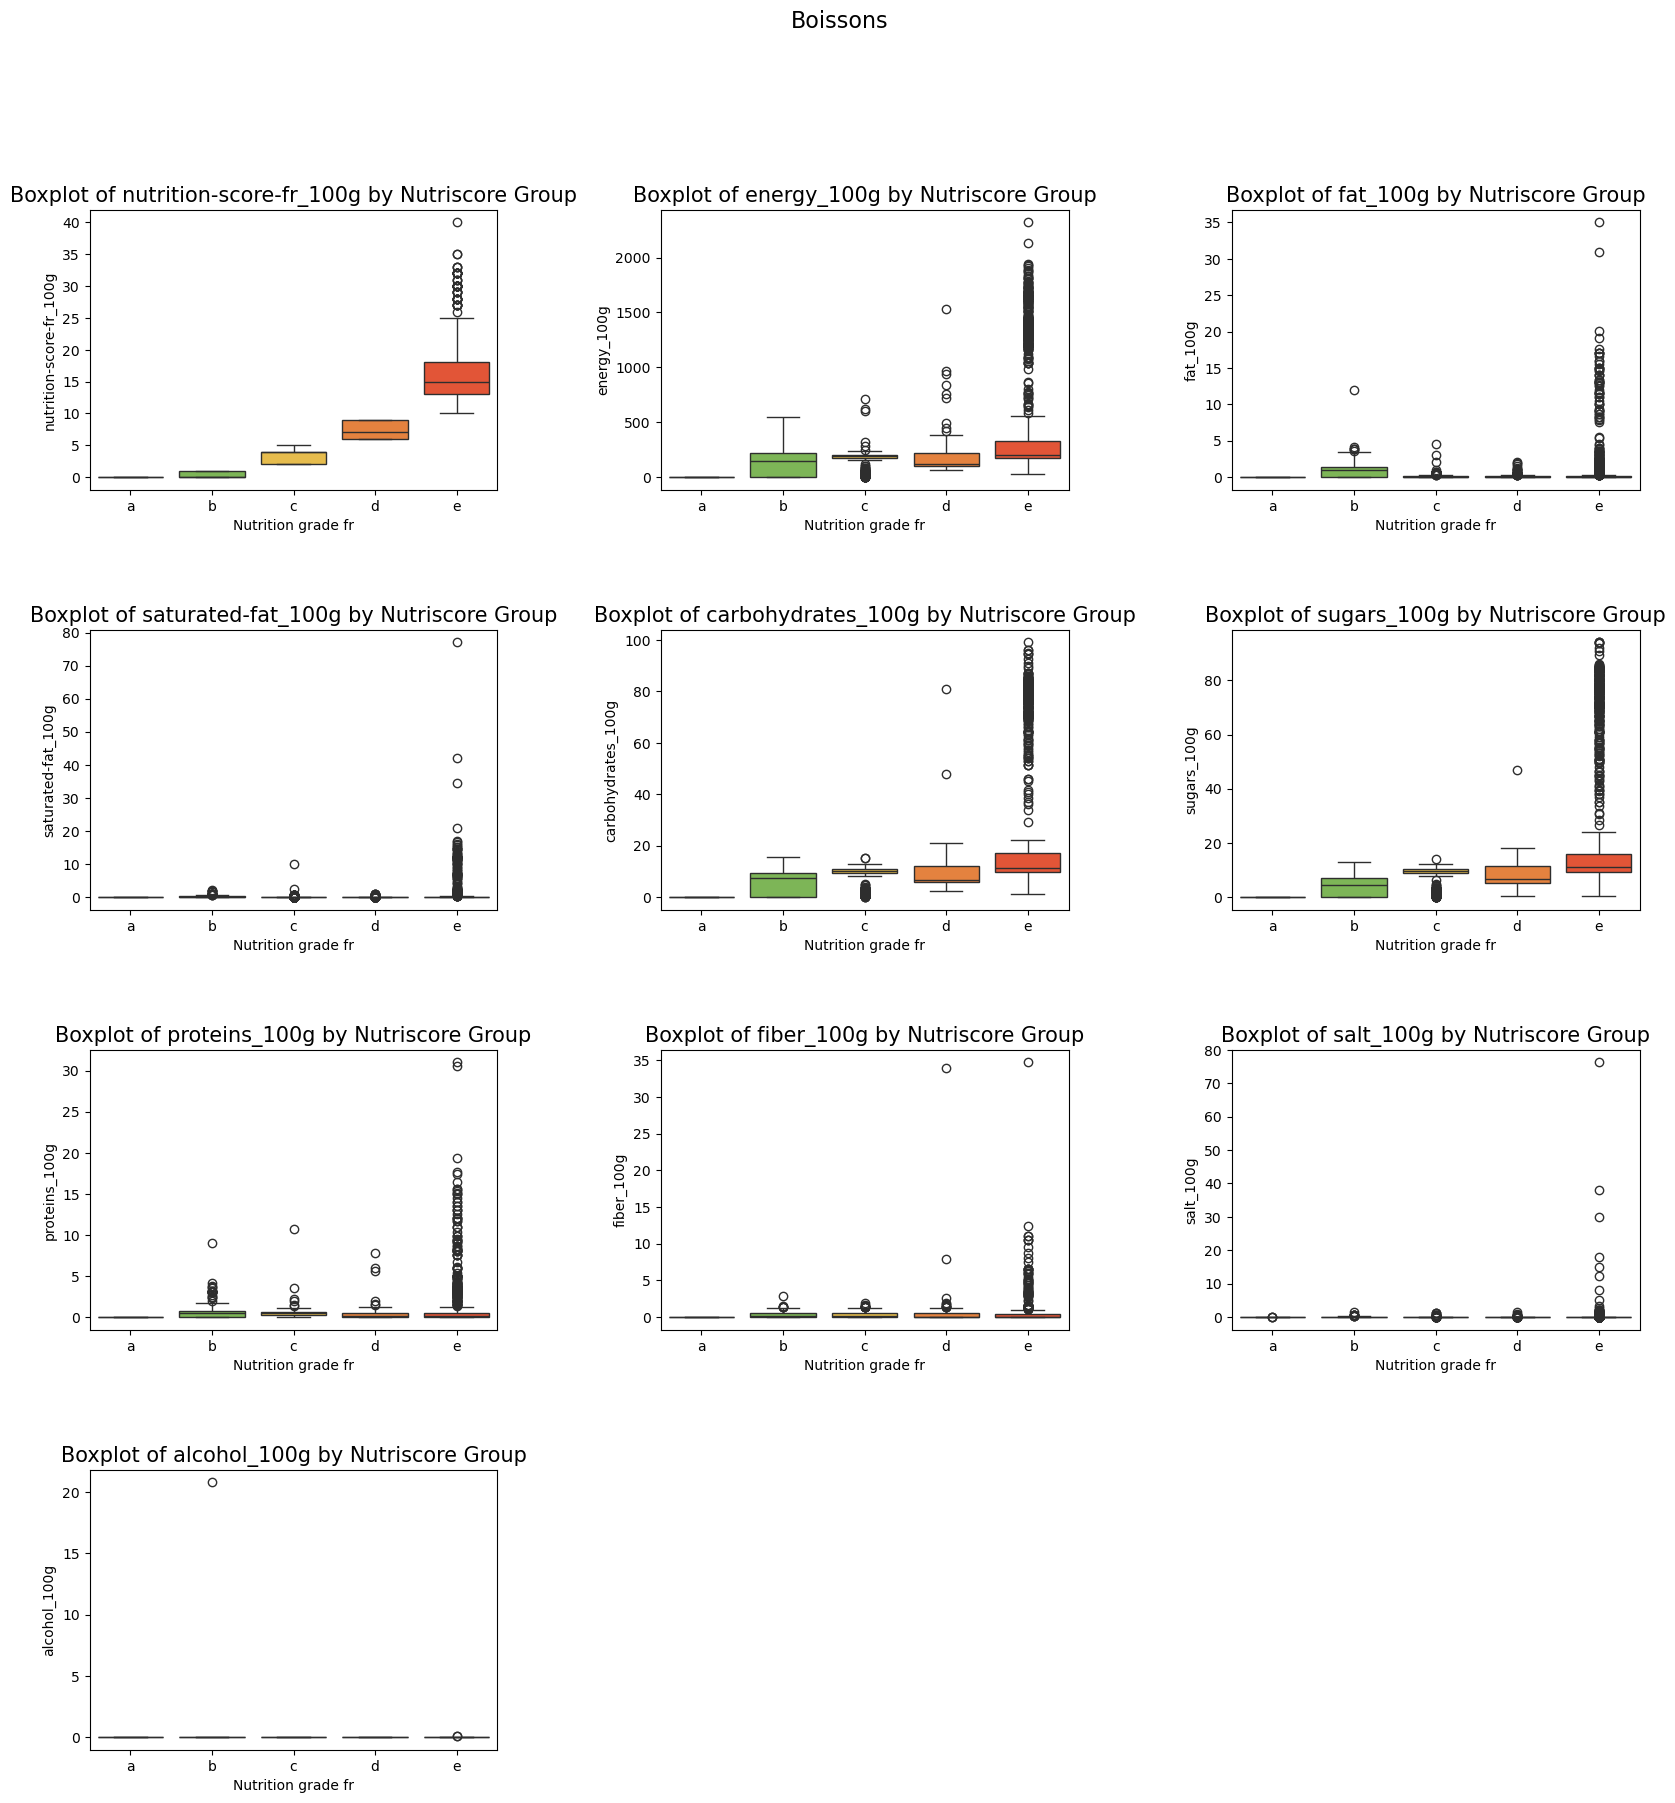

In [71]:
# Créer une figure avec des sous-graphiques pour chaque colonne numérique
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20,20))
plt.subplots_adjust(hspace=0.5, wspace=0.4)

# Parcourir chaque colonne numérique et créer un boxplot pour chaque groupe de nutriscore
for i, col in enumerate(numerics_col):
    row = i // 3  # ligne
    col_num = i % 3  # colonne
    ax = axes[row, col_num]
    sns.boxplot(x='nutrition_grade_fr', y=col, data=df_cleaned_boisson, ax=ax, order=grade_order, hue='nutrition_grade_fr', palette=grade_colors, legend=False)
    ax.set_xlabel('Nutrition grade fr')
    ax.set_ylabel(col)
    ax.set_title(f'Boxplot of {col} by Nutriscore Group', fontsize=15)

# Supprimer les axes vides
for i in range(len(numerics_col), 4 * 3):
    row = i // 3
    col_num = i % 3
    fig.delaxes(axes[row, col_num])

# Ajouter un titre global à la figure
fig.suptitle('Boissons', fontsize=16)

plt.show()

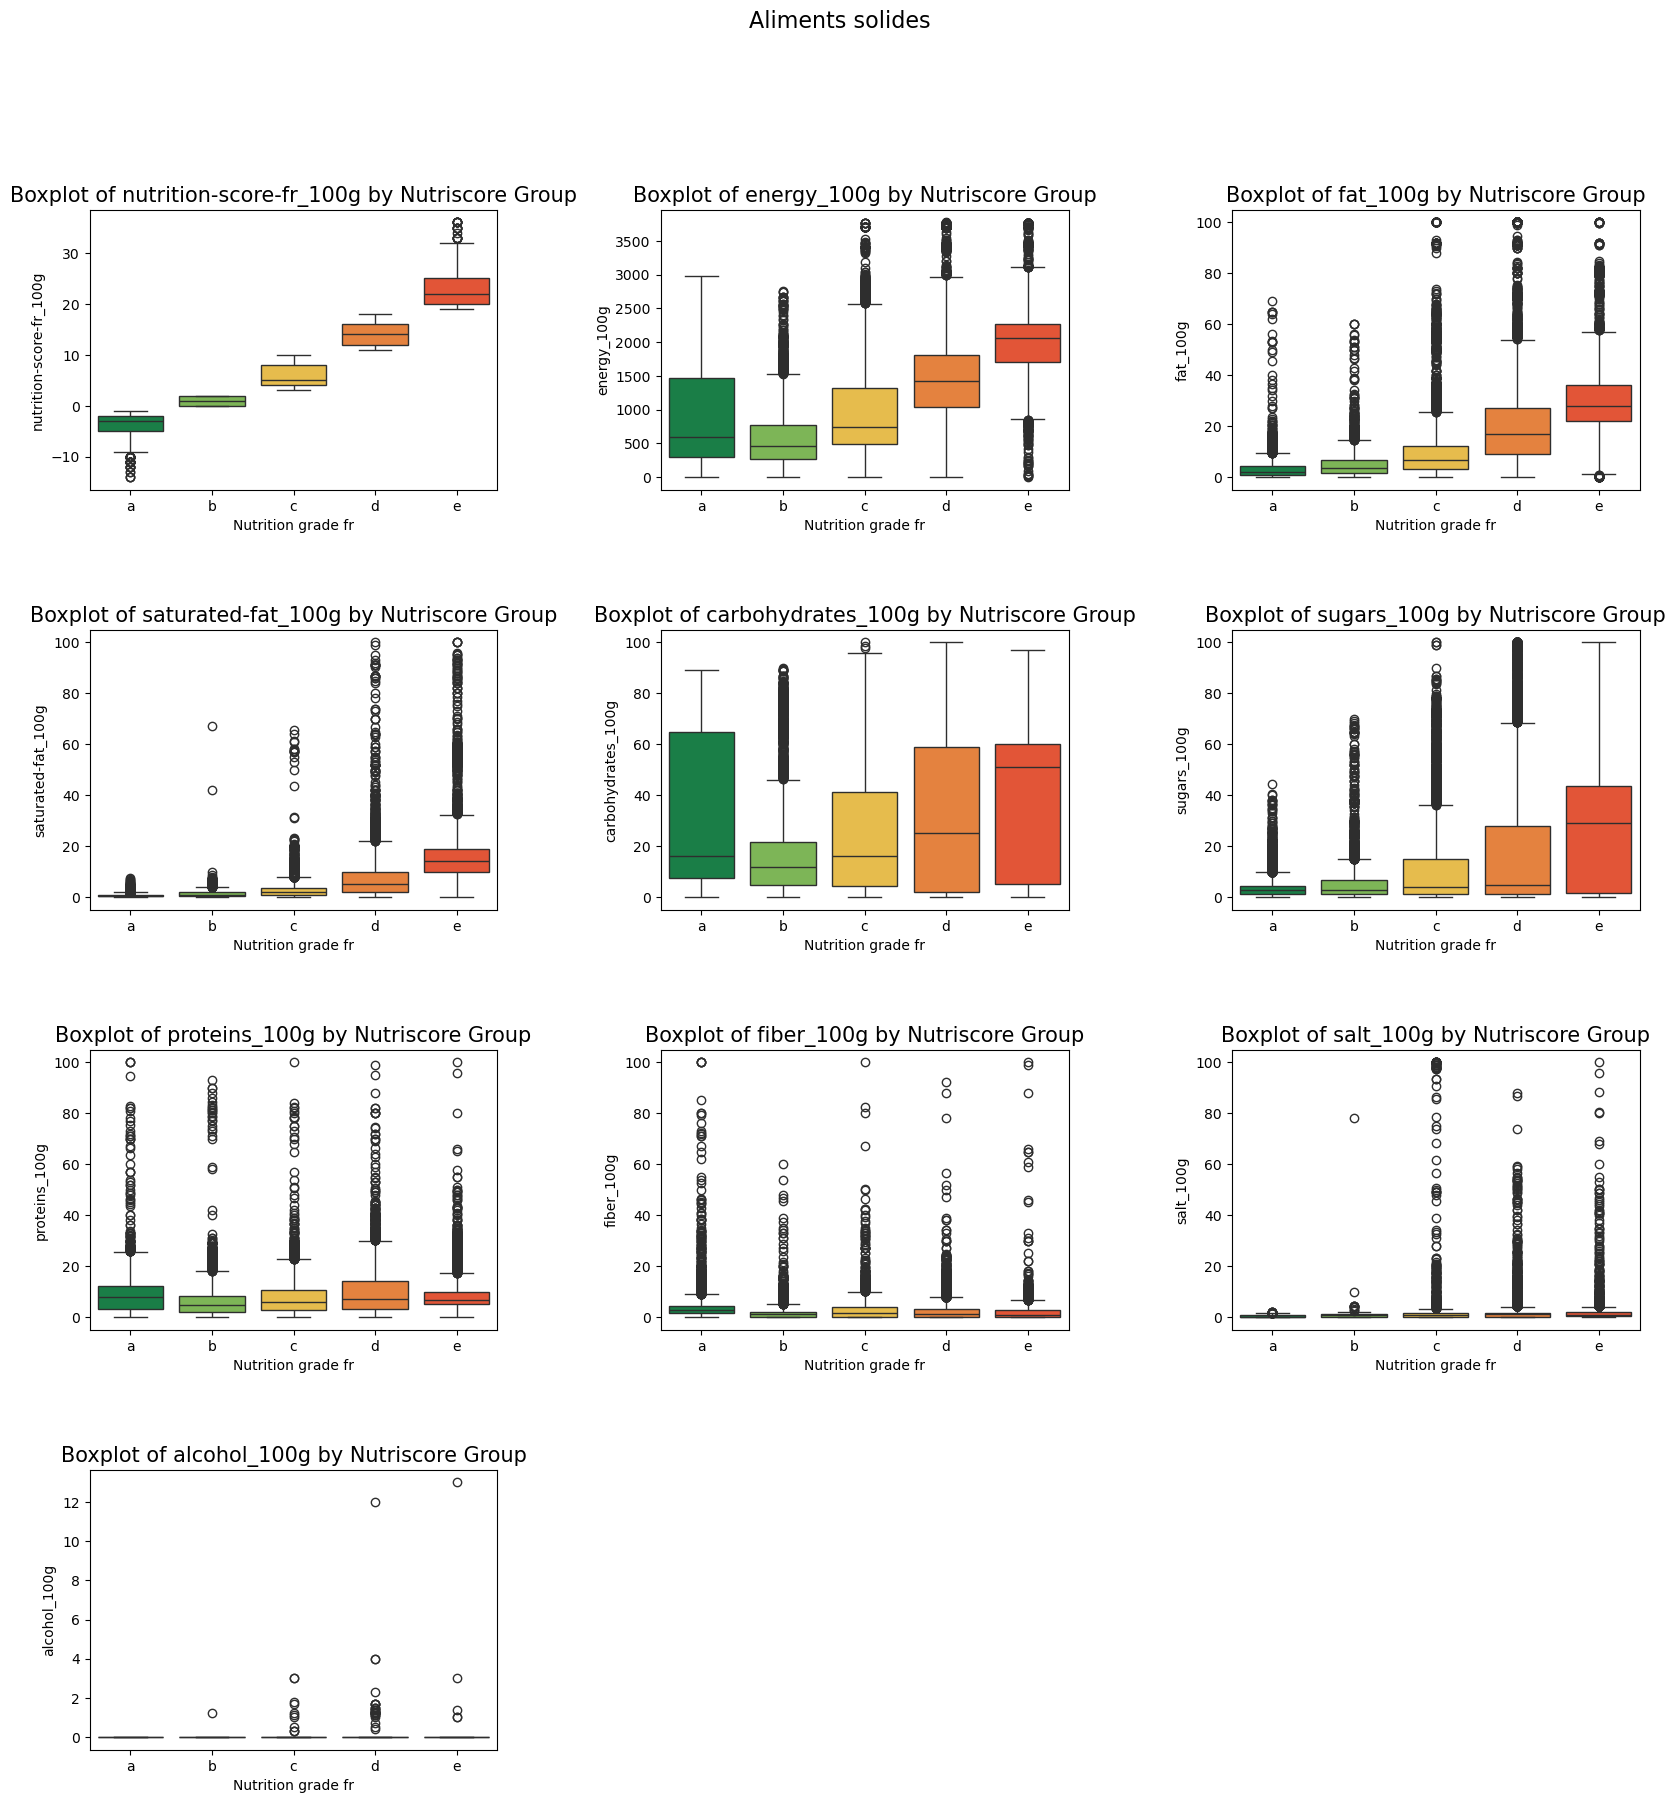

In [72]:
# Créer une figure avec des sous-graphiques pour chaque colonne numérique
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20,20))
plt.subplots_adjust(hspace=0.5, wspace=0.4)

# Parcourir chaque colonne numérique et créer un boxplot pour chaque groupe de nutriscore
for i, col in enumerate(numerics_col):
    row = i // 3  # ligne
    col_num = i % 3  # colonne
    ax = axes[row, col_num]
    sns.boxplot(x='nutrition_grade_fr', y=col, data=df_cleaned_autre, ax=ax, order=grade_order, hue='nutrition_grade_fr', palette=grade_colors, legend=False)
    ax.set_xlabel('Nutrition grade fr')
    ax.set_ylabel(col)
    ax.set_title(f'Boxplot of {col} by Nutriscore Group', fontsize=15)

# Supprimer les axes vides
for i in range(len(numerics_col), 4 * 3):
    row = i // 3
    col_num = i % 3
    fig.delaxes(axes[row, col_num])

# Ajouter un titre global à la figure
fig.suptitle('Aliments solides', fontsize=16)

plt.show()

In [73]:
def extract_outliers_selective(df, cols):
    outliers_info = {}

    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 3 * IQR
        upper_bound = Q3 + 3 * IQR
        mask = (df[col] < lower_bound) | (df[col] > upper_bound)
        outliers_info[col] = df[mask]

    return outliers_info

In [74]:
# Créer un dictionnaire avec les outliers pour chaque groupe
grouped_outliers = {group: extract_outliers_selective(group_df, numerics_col) 
                    for group, group_df in grouped_dfs.items()}

# Afficher les outliers pour chaque groupe
for group, cols_outliers in grouped_outliers.items():
    group_outliers_info = [f"  {col} a {df.shape[0]} outliers" 
                           for col, df in cols_outliers.items() if not df.empty]

    # Afficher ssi des outliers sont présents
    if group_outliers_info:
        print(f"Groupe: {group}")
        print("\n".join(group_outliers_info))
        print() 


Groupe: a
  fat_100g a 83 outliers
  saturated-fat_100g a 122 outliers
  sugars_100g a 331 outliers
  proteins_100g a 40 outliers
  fiber_100g a 252 outliers

Groupe: b
  energy_100g a 28 outliers
  fat_100g a 67 outliers
  saturated-fat_100g a 22 outliers
  carbohydrates_100g a 265 outliers
  sugars_100g a 167 outliers
  proteins_100g a 43 outliers
  fiber_100g a 178 outliers
  salt_100g a 9 outliers
  alcohol_100g a 2 outliers

Groupe: c
  energy_100g a 42 outliers
  fat_100g a 293 outliers
  saturated-fat_100g a 147 outliers
  sugars_100g a 384 outliers
  proteins_100g a 35 outliers
  fiber_100g a 75 outliers
  salt_100g a 235 outliers
  alcohol_100g a 11 outliers

Groupe: d
  fat_100g a 262 outliers
  saturated-fat_100g a 104 outliers
  proteins_100g a 33 outliers
  fiber_100g a 224 outliers
  salt_100g a 326 outliers
  alcohol_100g a 30 outliers

Groupe: e
  nutrition-score-fr_100g a 1 outliers
  fat_100g a 25 outliers
  saturated-fat_100g a 430 outliers
  proteins_100g a 605 outl

Il nous reste encore beaucoup trop d'outliers pour être examinés à la main. Comme nous avons déjà supprimé les valeurs complètements impossible avec l'approche métier, nous supposerons qu'il s'agit uniquement de valeurs atypiques.

Maintenant que nous avons géré les valeurs abérrantes, le nom des produits ne nous apportera plus d'information pour la suite de notre étude.

In [75]:
df_cleaned = df_cleaned.drop(['product_name'], axis=1)

## Traitement des valeurs manquantes

In [76]:
# Valeurs manquantes
missing_values_count = df_cleaned.isnull().sum()
total_cells = np.product(df_cleaned.shape)
total_missing = missing_values_count.sum()
percent_missing = (total_missing/total_cells) * 100
print('Le pourcentage de valeurs manquantes est de', round(percent_missing, 2),'%')

Le pourcentage de valeurs manquantes est de 20.01 %


In [77]:
percent_missing_values =  round((missing_values_count / len(df_cleaned)) * 100, 2)
missing_data = pd.concat([missing_values_count, percent_missing_values], axis=1, keys=['Nombre de valeurs manquantes', 'Pourcentage de valeurs manquantes'])
display(missing_data)

Nombre de valeurs manquantes  \
nutrition_grade_fr                                  0   
nutrition-score-fr_100g                             0   
fat_100g                                        17073   
saturated-fat_100g                                 81   
carbohydrates_100g                              17128   
sugars_100g                                        84   
proteins_100g                                     115   
fiber_100g                                      15182   
alcohol_100g                                    56045   
salt_100g                                          82   
energy_100g                                       170   
pnns_groups_1                                   20587   
pnns_groups_2                                   20538   

                         Pourcentage de valeurs manquantes  
nutrition_grade_fr                                    0.00  
nutrition-score-fr_100g                               0.00  
fat_100g                                             30.20  
saturated-fat_100g                                    0.14  
carbohydrates_100g                                   30.29  
sugars_100g                                           0.15  
proteins_100g                                         0.20  
fiber_100g                                           26.85  
alcohol_100g                                         99.12  
salt_100g                                             0.15  
energy_100g                                           0.30  
pnns_groups_1                                        36.41  
pnns_groups_2                                        36.32

<Axes: >

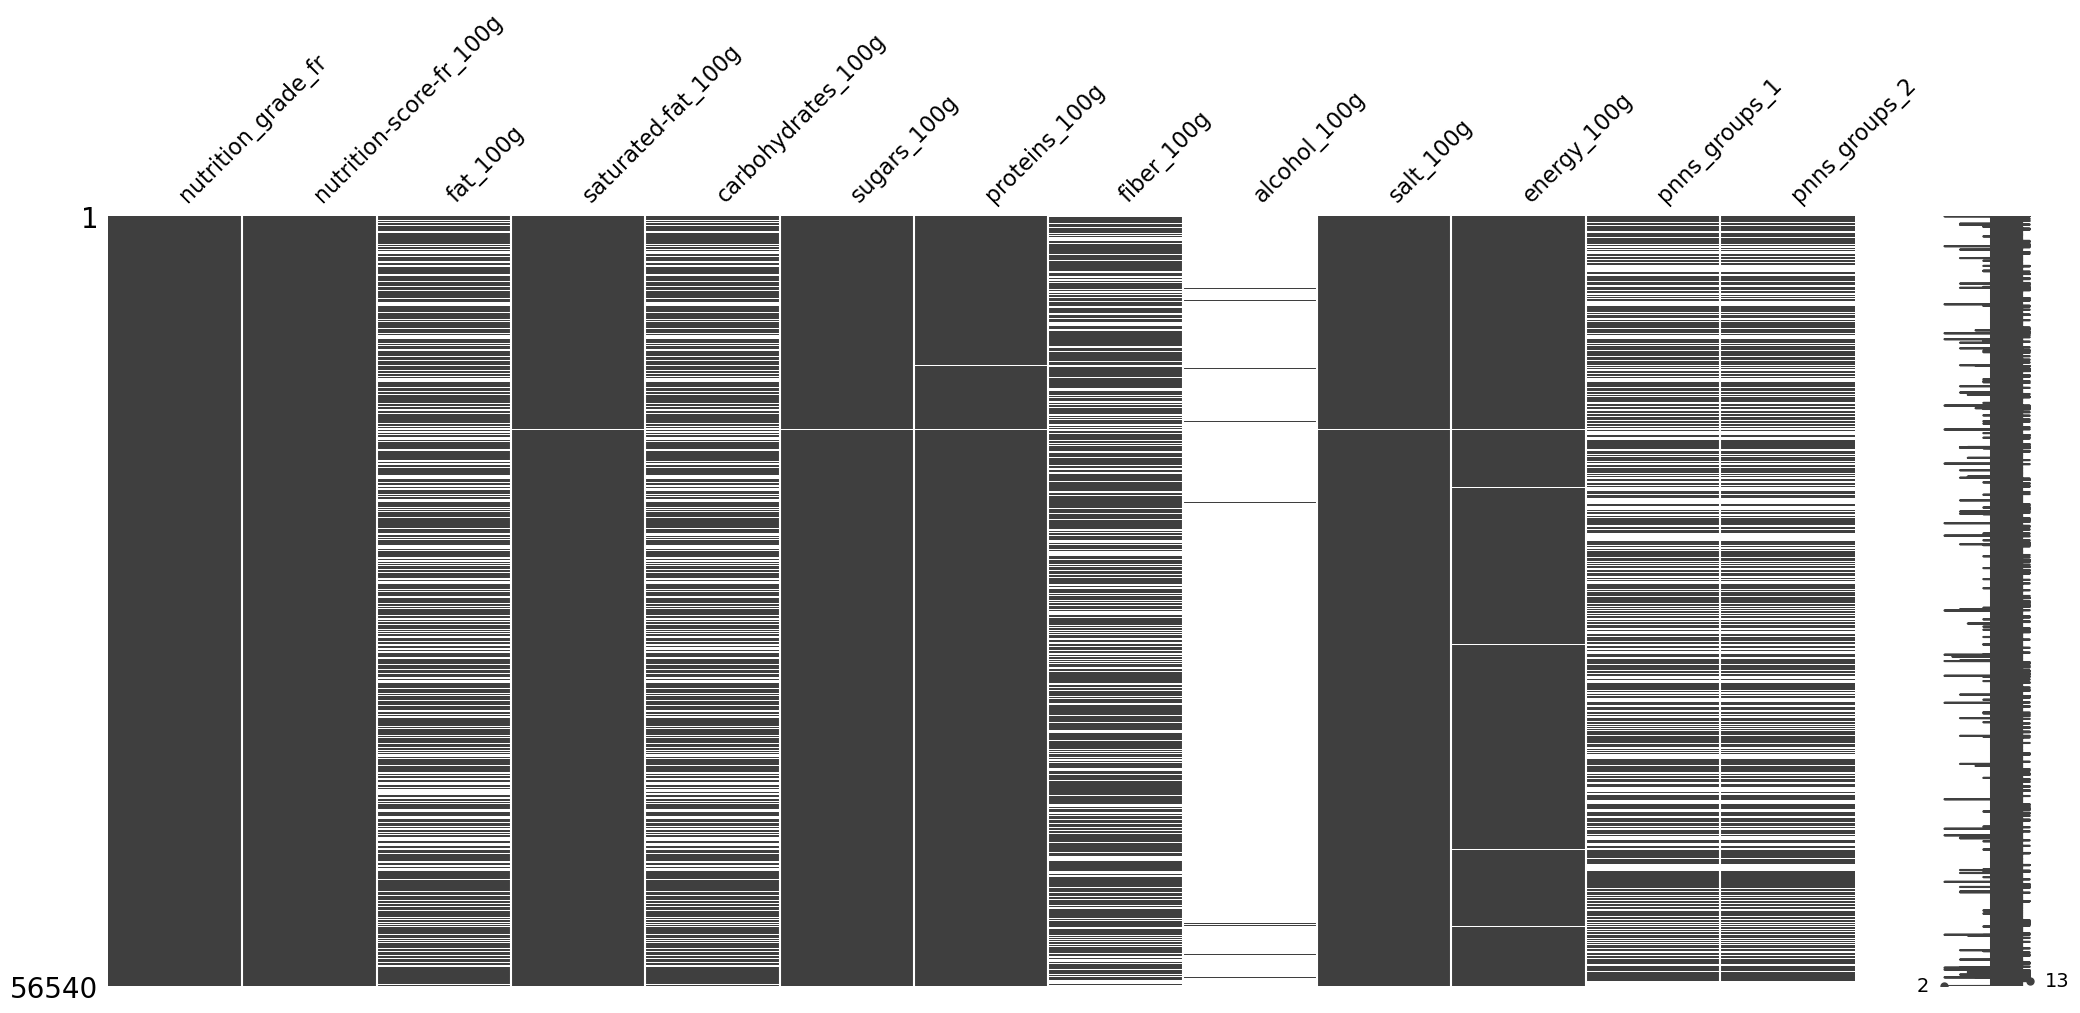

In [78]:
msno.matrix(df_cleaned)

<Axes: title={'center': 'Valeurs présentes dans notre jeu de données'}>

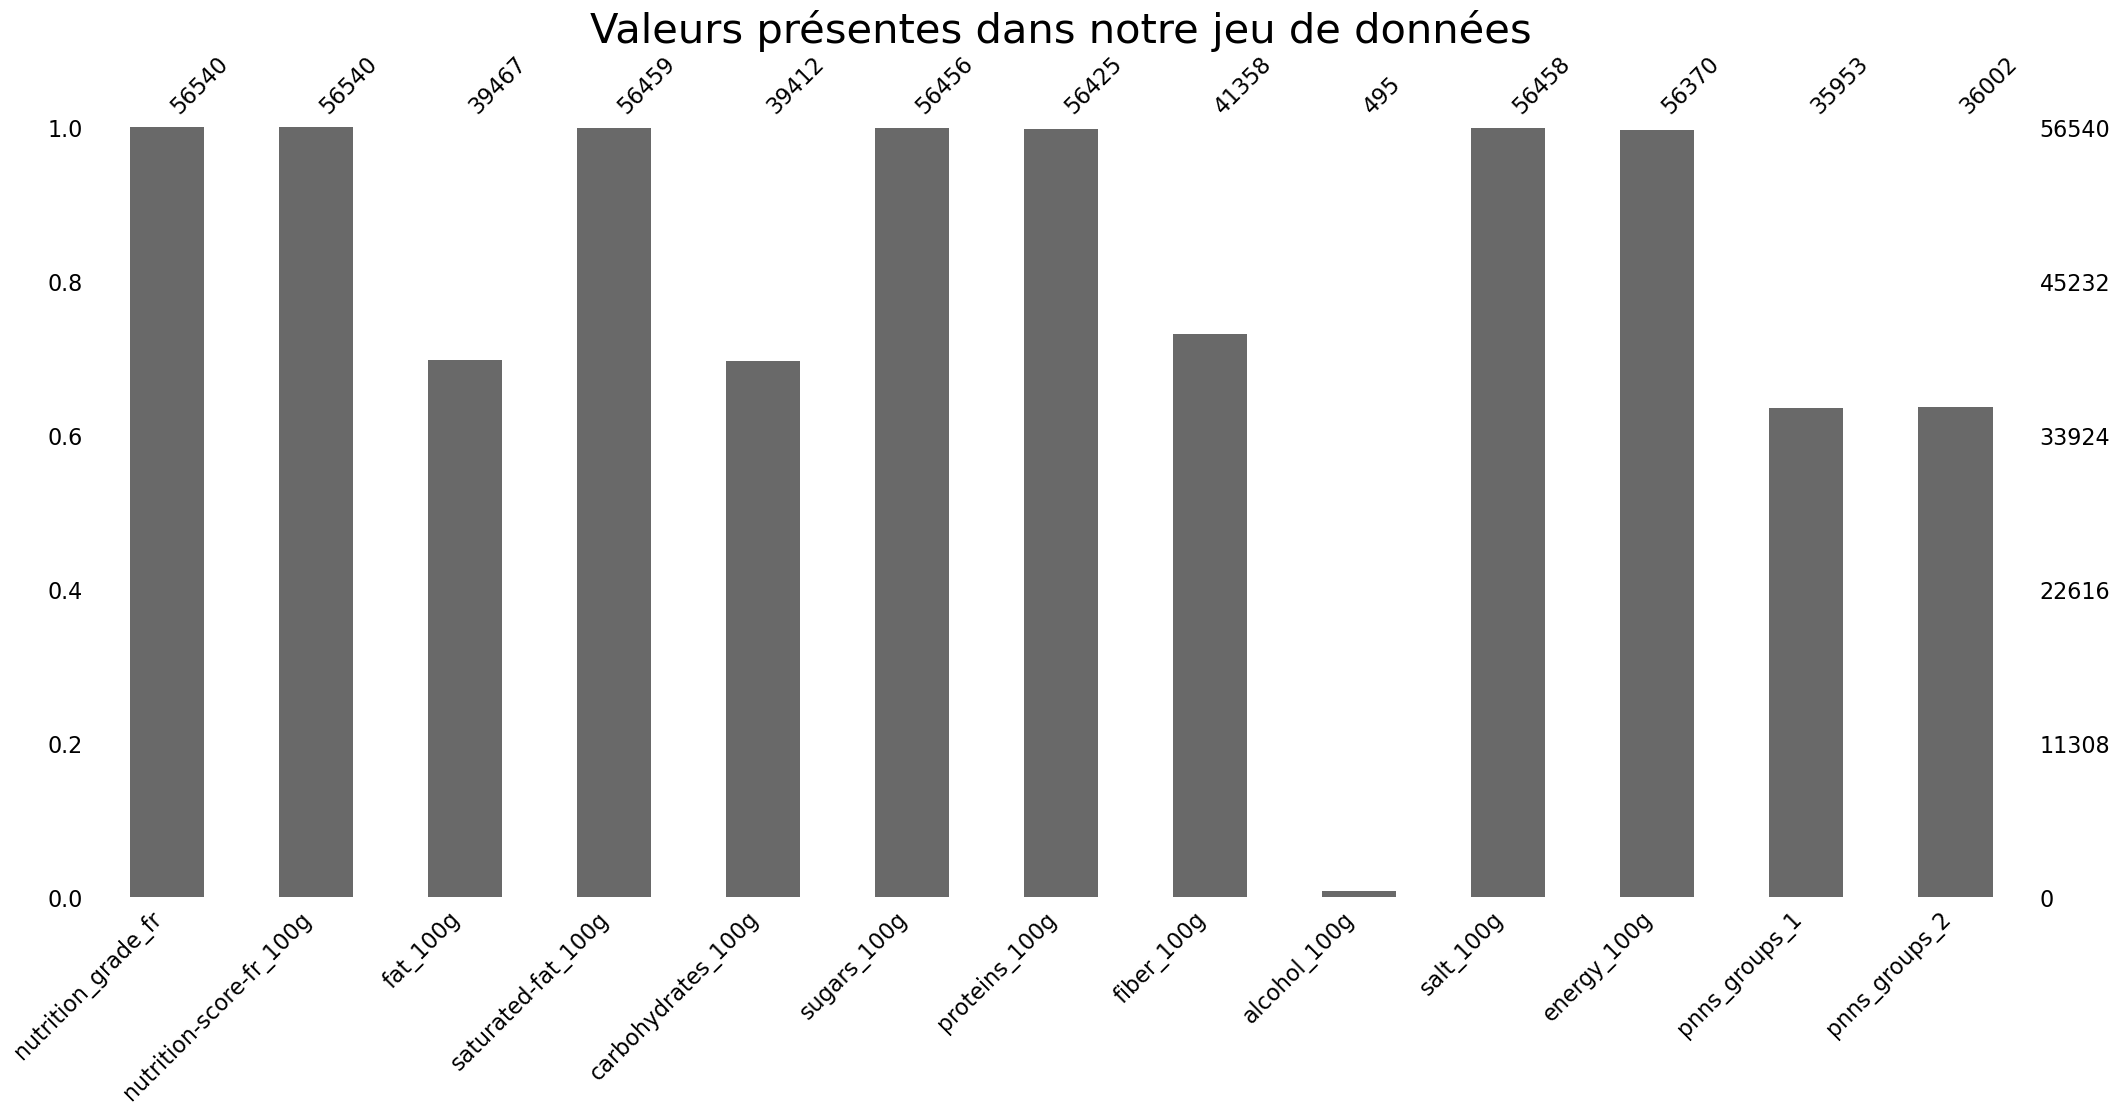

In [79]:
plt.title("Valeurs présentes dans notre jeu de données", fontsize=30)
msno.bar(df_cleaned)

<Axes: >

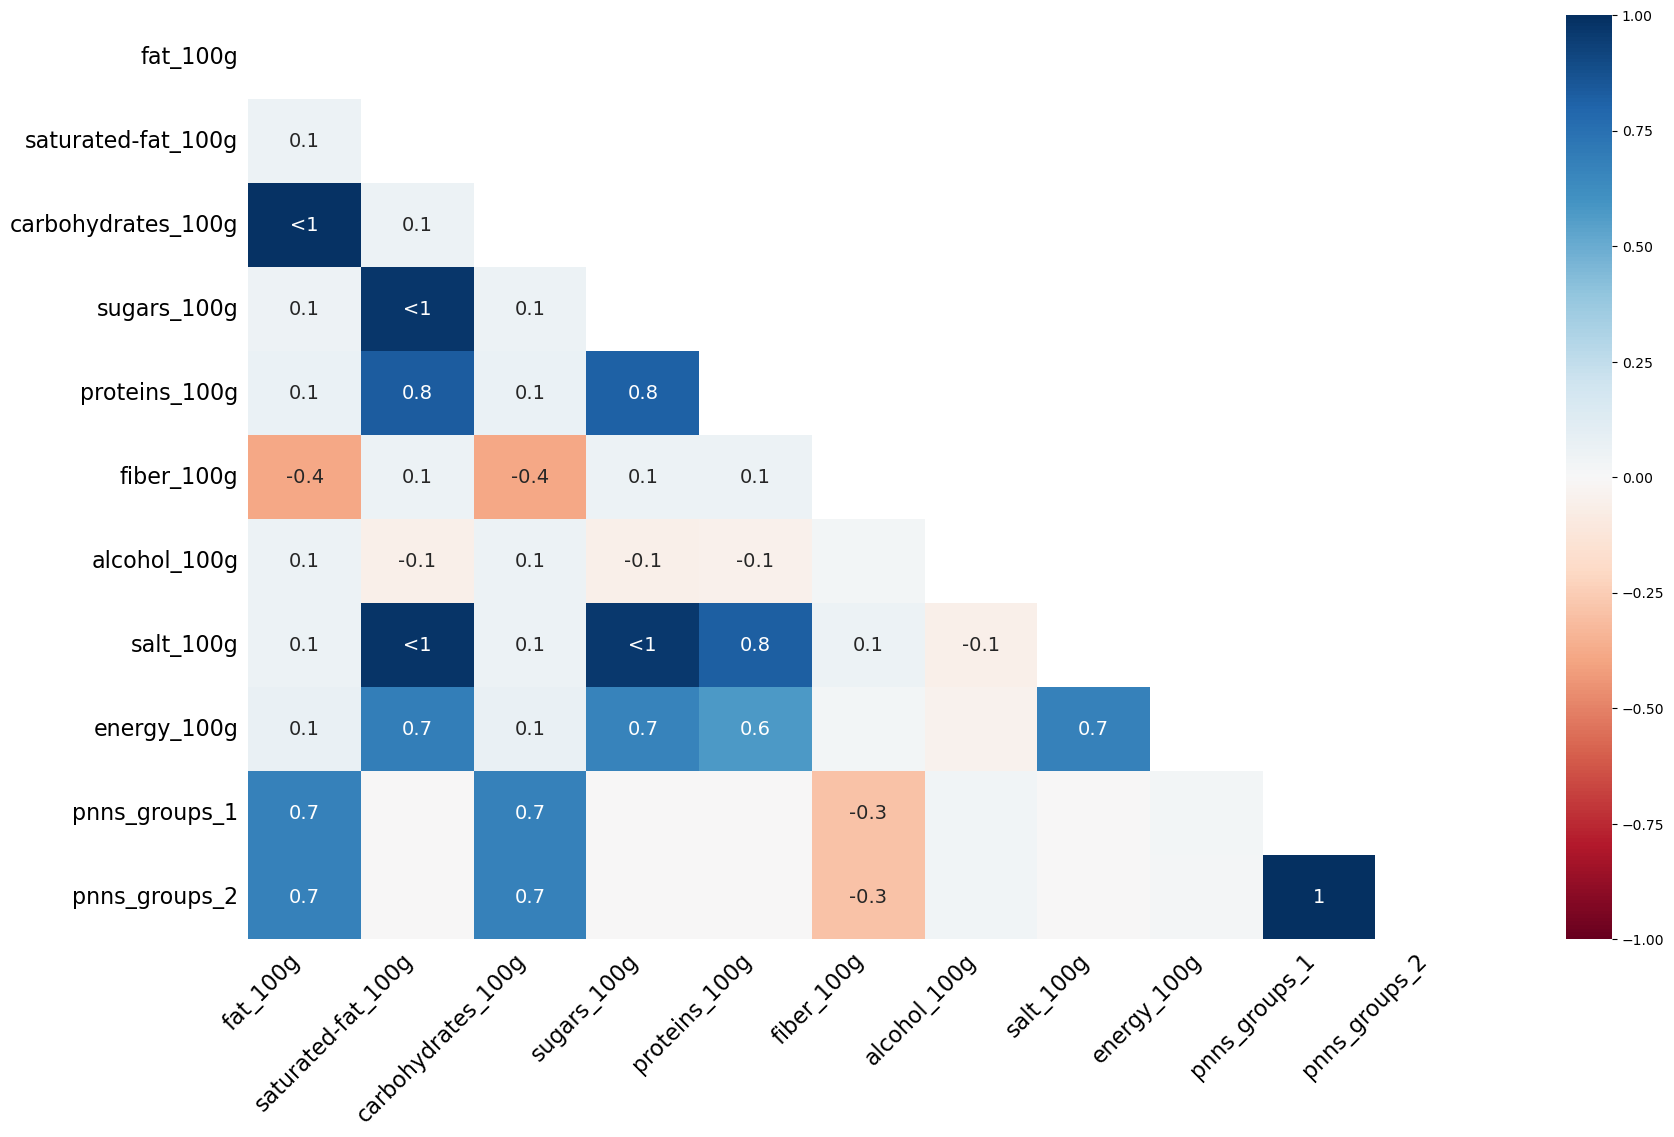

In [80]:
msno.heatmap(df_cleaned)

On note dans nos variables manquantes que si le pnns_groups_1 est manquant alors le pnns_groups_2 est manquant également.<br>
On note également les fortes corrélation existantes entres d'autres variables qui suggèrent que lorsqu'un produit n'a pas été renseigné pour une variable il y a souvent d'autres variables qui n'ont pas été remplies pour ce même produit.

### Complétion à 0

#### Les fibres

In [81]:
def fill_fibres_nan(dataframe):
    dataframe['fiber_100g'].fillna(0, inplace=True)
    return dataframe


In [82]:
df_completed = fill_fibres_nan(df_cleaned)

#### Les nutriments

L'energy_100g est calculée en KJ. La formule est donc :<br>
Energie (kJ)=(Protéines(g) × 17)+(Lipides(g) × 37)+(Glucides(g) × 17)+(Alcool(g) × 29)<br>
Si le calcul de l'energie est coherant en replacant la valeur des nutriments NaN par 0 on effectue la complétion à 0.

In [83]:
def calcul_no_lipide(df):
    # Créer des copies temporaires des colonnes utilisées dans le calcul
    glucides = df['carbohydrates_100g'].fillna(0)
    proteines = df['proteins_100g'].fillna(0)
    alcool = df['alcohol_100g'].fillna(0)

    # Créer une nouvelle colonne avec la somme des valeurs caloriques calculées à partir des macronutriments
    df['calculated_energy'] = glucides * 17 + proteines * 17 + alcool * 29
    
    # Calculer la condition où l'énergie calculée est égale à 'energy_kcal_100g' avec une marge de 5%
    condition = abs(df['calculated_energy'] - df['energy_100g']) <= 0.05 * df['energy_100g']

    # Compteur pour les cas où 'fat_100g' est mis à 0
    count_fat_set_to_zero = 0

    # Pour les lignes où 'fat_100g' est NaN et la condition est vraie, mettre 'fat_100g' à 0
    # et incrémenter le compteur
    for index, row in df.iterrows():
        if pd.isna(row['fat_100g']) and condition[index]:
            df.at[index, 'fat_100g'] = 0
            count_fat_set_to_zero += 1

    # Supprimer la colonne d'énergie calculée
    df.drop('calculated_energy', axis=1, inplace=True)

    print(count_fat_set_to_zero, 'valeurs ont été complétés à 0')

    return df

In [84]:
df_completed = calcul_no_lipide(df_completed)

200 valeurs ont été complétés à 0


In [85]:
def calcul_no_glucides(df):
    # Créer des copies temporaires des colonnes utilisées dans le calcul
    lipides = df['fat_100g'].fillna(0)
    proteines = df['proteins_100g'].fillna(0)
    alcool = df['alcohol_100g'].fillna(0)

    # Créer une nouvelle colonne avec la somme des valeurs caloriques calculées à partir des macronutriments
    df['calculated_energy'] = lipides * 37 + proteines * 17 + alcool * 29
    
    # Calculer la condition où l'énergie calculée est égale à 'energy_kcal_100g' avec une marge de 5%
    condition = abs(df['calculated_energy'] - df['energy_100g']) <= 0.05 * df['energy_100g']

    # Compteur pour les cas où 'carbohydrates_100g' est mis à 0
    count_set_to_zero = 0

    # Pour les lignes où 'carbohydrates_100g' est NaN et la condition est vraie, mettre 'carbohydrates_100g' à 0
    # et incrémenter le compteur
    for index, row in df.iterrows():
        if pd.isna(row['carbohydrates_100g']) and condition[index]:
            df.at[index, 'carbohydrates_100g'] = 0
            count_set_to_zero += 1

    # Supprimer la colonne d'énergie calculée
    df.drop('calculated_energy', axis=1, inplace=True)

    print(count_set_to_zero, 'valeurs ont été complétés à 0')

    return df

In [86]:
df_completed = calcul_no_glucides(df_completed)

246 valeurs ont été complétés à 0


In [87]:
def calcul_no_prot(df):
    # Créer des copies temporaires des colonnes utilisées dans le calcul
    lipides = df['fat_100g'].fillna(0)
    glucides = df['carbohydrates_100g'].fillna(0)
    alcool = df['alcohol_100g'].fillna(0)

    # Créer une nouvelle colonne avec la somme des valeurs caloriques calculées à partir des macronutriments
    df['calculated_energy'] = lipides * 37 + glucides * 17 + alcool * 29
    
    # Calculer la condition où l'énergie calculée est égale à 'energy_kcal_100g' avec une marge de 5%
    condition = abs(df['calculated_energy'] - df['energy_100g']) <= 0.05 * df['energy_100g']

    # Compteur pour les cas où 'carbohydrates_100g' est mis à 0
    count_set_to_zero = 0

    # Pour les lignes où 'carbohydrates_100g' est NaN et la condition est vraie, mettre 'proteins_100g' à 0
    # et incrémenter le compteur
    for index, row in df.iterrows():
        if pd.isna(row['proteins_100g']) and condition[index]:
            df.at[index, 'proteins_100g'] = 0
            count_set_to_zero += 1

    # Supprimer la colonne d'énergie calculée
    df.drop('calculated_energy', axis=1, inplace=True)

    print(count_set_to_zero, 'valeurs ont été complétés à 0')

    return df

In [88]:
df_completed = calcul_no_prot(df_completed)

0 valeurs ont été complétés à 0


In [89]:
def calcul_no_alcool(df):
    # Créer des copies temporaires des colonnes utilisées dans le calcul
    lipides = df['fat_100g'].fillna(0)
    glucides = df['carbohydrates_100g'].fillna(0)
    proteines = df['proteins_100g'].fillna(0)

    # Créer une nouvelle colonne avec la somme des valeurs caloriques calculées à partir des macronutriments
    df['calculated_energy'] = lipides * 37 + glucides * 17 + proteines * 17
    
    # Calculer la condition où l'énergie calculée est égale à 'energy_kcal_100g' avec une marge de 10%
    condition = abs(df['calculated_energy'] - df['energy_100g']) <= 0.1 * df['energy_100g']

    # Compteur pour les cas où 'carbohydrates_100g' est mis à 0
    count_set_to_zero = 0

    # Pour les lignes où 'carbohydrates_100g' est NaN et la condition est vraie, mettre 'alcohol_100g' à 0
    # et incrémenter le compteur
    for index, row in df.iterrows():
        if pd.isna(row['alcohol_100g']) and condition[index]:
            df.at[index, 'alcohol_100g'] = 0
            count_set_to_zero += 1

    # Supprimer la colonne d'énergie calculée
    df.drop('calculated_energy', axis=1, inplace=True)

    print(count_set_to_zero, 'valeurs ont été complétés à 0')

    return df

In [90]:
df_completed = calcul_no_alcool(df_completed)

39195 valeurs ont été complétés à 0


In [91]:
def no_sugars(df):
    # Compter le nombre de cas où 'carbohydrates_100g' est 0 et 'sugars_100g' est NaN
    count = ((df['carbohydrates_100g'] == 0) & (pd.isna(df['sugars_100g']))).sum()
    print('Il y a', count, 'cas où le sucre est mis à 0 pour être cohérent avec les glucides.')

    # Mettre à jour 'sugars_100g' en le mettant à 0 lorsque 'carbohydrates_100g' est 0
    df.loc[df['carbohydrates_100g'] == 0, 'sugars_100g'] = 0
    
    return df


In [92]:
df_completed = no_sugars(df_completed)

Il y a 0 cas où le sucre est mis à 0 pour être cohérent avec les glucides.


In [93]:
def no_saturatedfat(df):
    # Compter le nombre de cas où 'fat_100g' est 0 et 'saturated-fat_100g' est NaN
    count = ((df['fat_100g'] == 0) & (pd.isna(df['saturated-fat_100g']))).sum()
    print('Il y a', count, 'cas où les graisses saturées est mis à 0 pour être cohérent avec les lipides total.')

    # Mettre à jour 'saturated-fat_100g' en le mettant à 0 lorsque 'fat_100g' est 0
    df.loc[df['fat_100g'] == 0, 'saturated-fat_100g'] = 0
    
    return df


In [94]:
df_completed = no_saturatedfat(df_completed)

Il y a 0 cas où les graisses saturées est mis à 0 pour être cohérent avec les lipides total.


In [95]:
# Valeurs manquantes
missing_values_count = df_completed.isnull().sum()
total_cells = np.product(df_completed.shape)
total_missing = missing_values_count.sum()
percent_missing = (total_missing/total_cells) * 100
print('Le pourcentage de valeurs manquantes est de', round(percent_missing, 2),'%')

Le pourcentage de valeurs manquantes est de 12.55 %


In [96]:
percent_missing_values =  round((missing_values_count / len(df_completed)) * 100, 2)
missing_data = pd.concat([missing_values_count, percent_missing_values], axis=1, keys=['Nombre de valeurs manquantes', 'Pourcentage de valeurs manquantes'])
display(missing_data)

Nombre de valeurs manquantes  \
nutrition_grade_fr                                  0   
nutrition-score-fr_100g                             0   
fat_100g                                        16873   
saturated-fat_100g                                 81   
carbohydrates_100g                              16882   
sugars_100g                                        84   
proteins_100g                                     115   
fiber_100g                                          0   
alcohol_100g                                    16850   
salt_100g                                          82   
energy_100g                                       170   
pnns_groups_1                                   20587   
pnns_groups_2                                   20538   

                         Pourcentage de valeurs manquantes  
nutrition_grade_fr                                    0.00  
nutrition-score-fr_100g                               0.00  
fat_100g                                             29.84  
saturated-fat_100g                                    0.14  
carbohydrates_100g                                   29.86  
sugars_100g                                           0.15  
proteins_100g                                         0.20  
fiber_100g                                            0.00  
alcohol_100g                                         29.80  
salt_100g                                             0.15  
energy_100g                                           0.30  
pnns_groups_1                                        36.41  
pnns_groups_2                                        36.32

<Axes: >

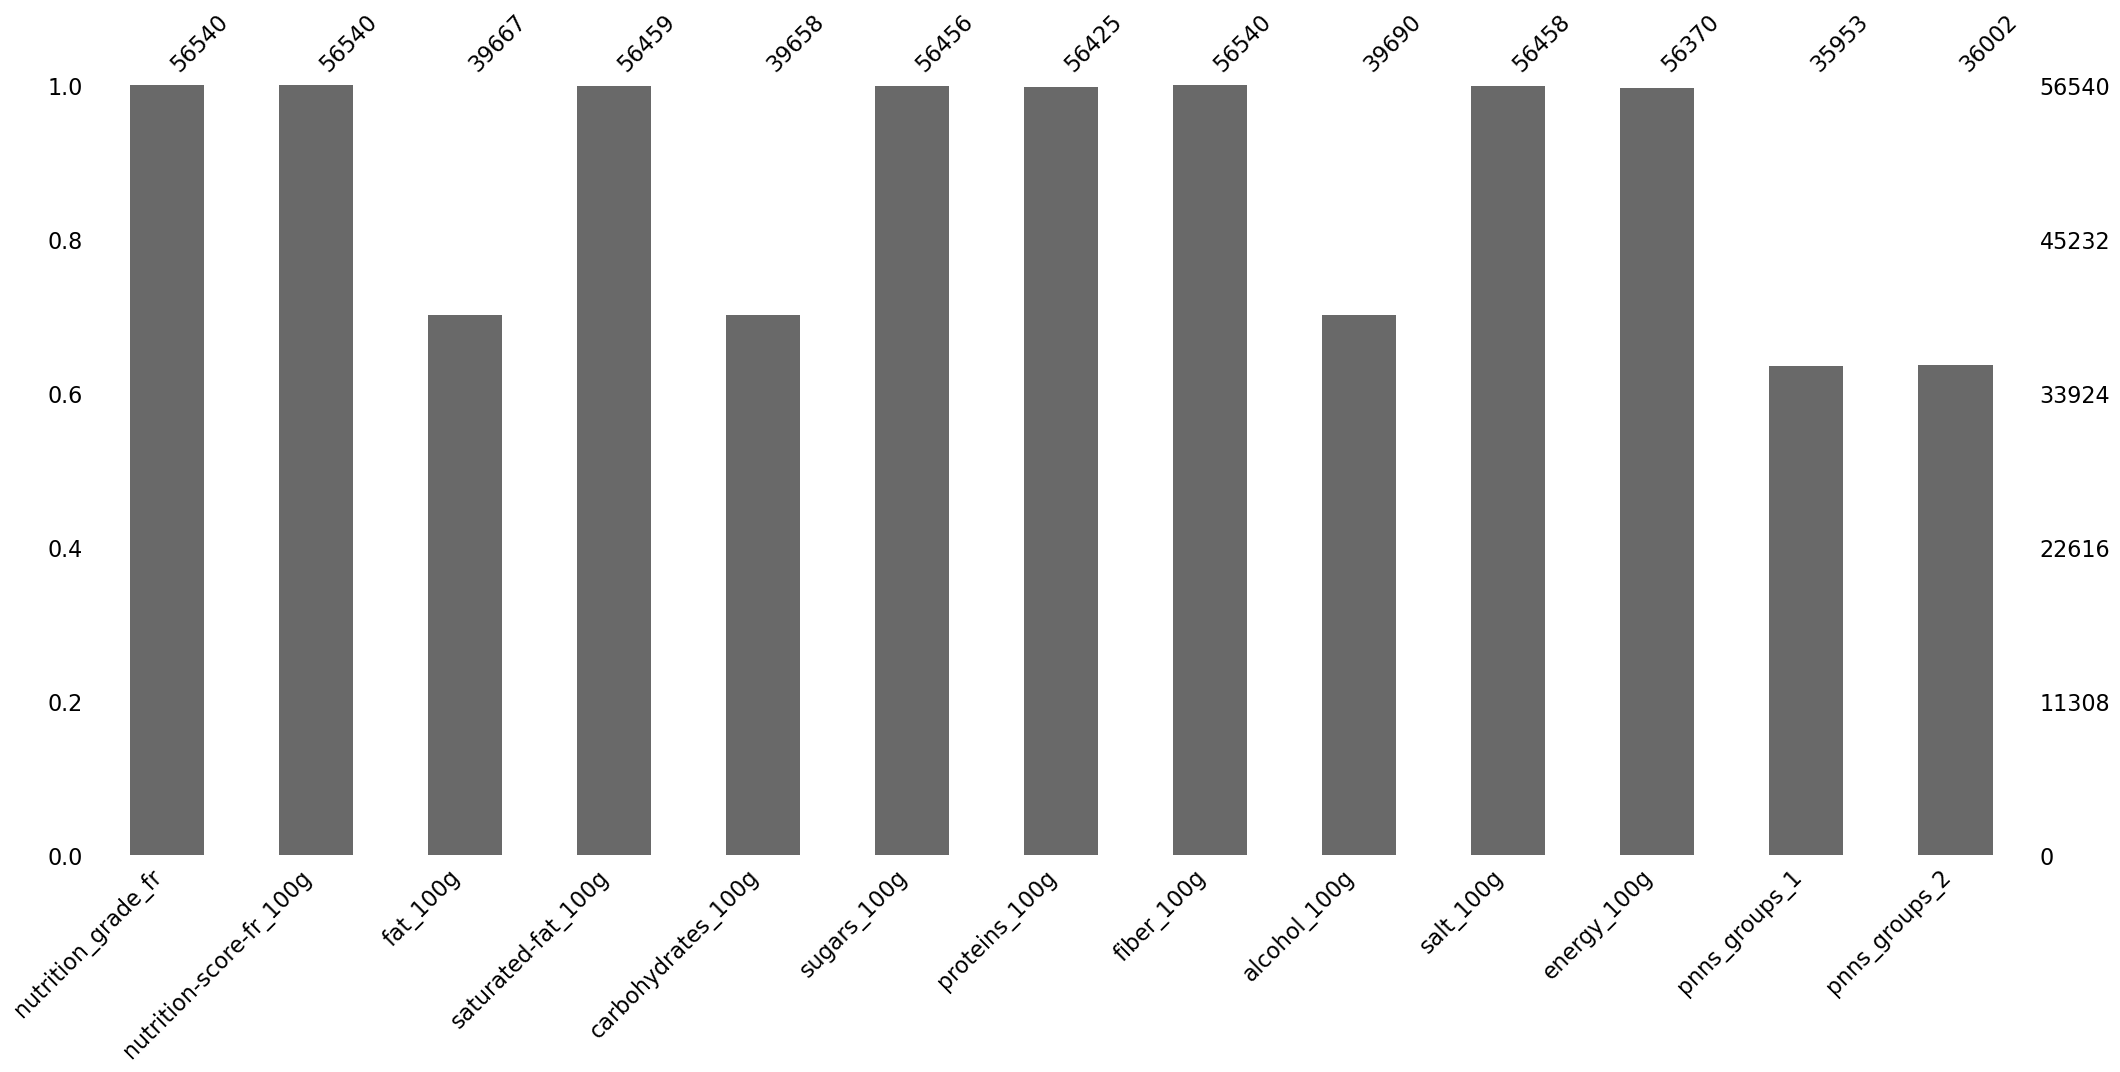

In [97]:
msno.bar(df_completed)

In [98]:
df_completed.shape

(56540, 13)

### KNeighborsClassifier

In [99]:
def impute_knn_categories(df, target_column, numerics_col, n_neighbors=5):
    # Copie du DataFrame original pour éviter de le modifier
    original_df = df.copy()
    df_knn = original_df.dropna(subset=numerics_col + [target_column])
    
    # Encodage de la colonne cible
    le = LabelEncoder()
    y_encoded = le.fit_transform(df_knn[target_column])
  
    # Séparation des features et de la target
    X = df_knn[numerics_col]
    y = y_encoded
    
    # Séparation des données en ensembles d'entraînement et de test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Recherche du meilleur nombre de voisins
    param_grid = {'n_neighbors': range(2, 15)}
    knn = KNeighborsClassifier()
    grid_search = GridSearchCV(knn, param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    
    # Entraînement du modèle avec le meilleur nombre de voisins
    best_knn = grid_search.best_estimator_
    best_knn.fit(X_train, y_train)
    
    # Prédiction des labels pour l'ensemble de test
    y_pred = best_knn.predict(X_test)
    
    # Évaluation de la précision
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Précision: {accuracy}, avec n_neighbors: {best_knn.n_neighbors}")
    
    # Prédiction des valeurs manquantes pour le DataFrame original
    missing_values_index = original_df[target_column].isna()
    df_missing = original_df.loc[missing_values_index, numerics_col]
    df_missing = df_missing.dropna()
    df_missing_notna = df_missing.dropna()
    
    # Vérifiez si nous avons des lignes à prédire
    if not df_missing.empty:
        predicted_labels = best_knn.predict(df_missing)
        # Inverse transformation to get original labels
        predicted_labels = le.inverse_transform(predicted_labels)
        # Assign predictions back to the original DataFrame
        original_df.loc[df_missing_notna.index, target_column] = predicted_labels

        return original_df


In [100]:
imputed_df = impute_knn_categories(df_completed, 'pnns_groups_1', numerics_col)

Précision: 0.8776057176891007, avec n_neighbors: 3


In [101]:
imputed_df = impute_knn_categories(imputed_df, 'pnns_groups_2', numerics_col)

C:\Users\estel\anaconda3\envs\OC\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Précision: 0.7718959107806691, avec n_neighbors: 3


<Axes: >

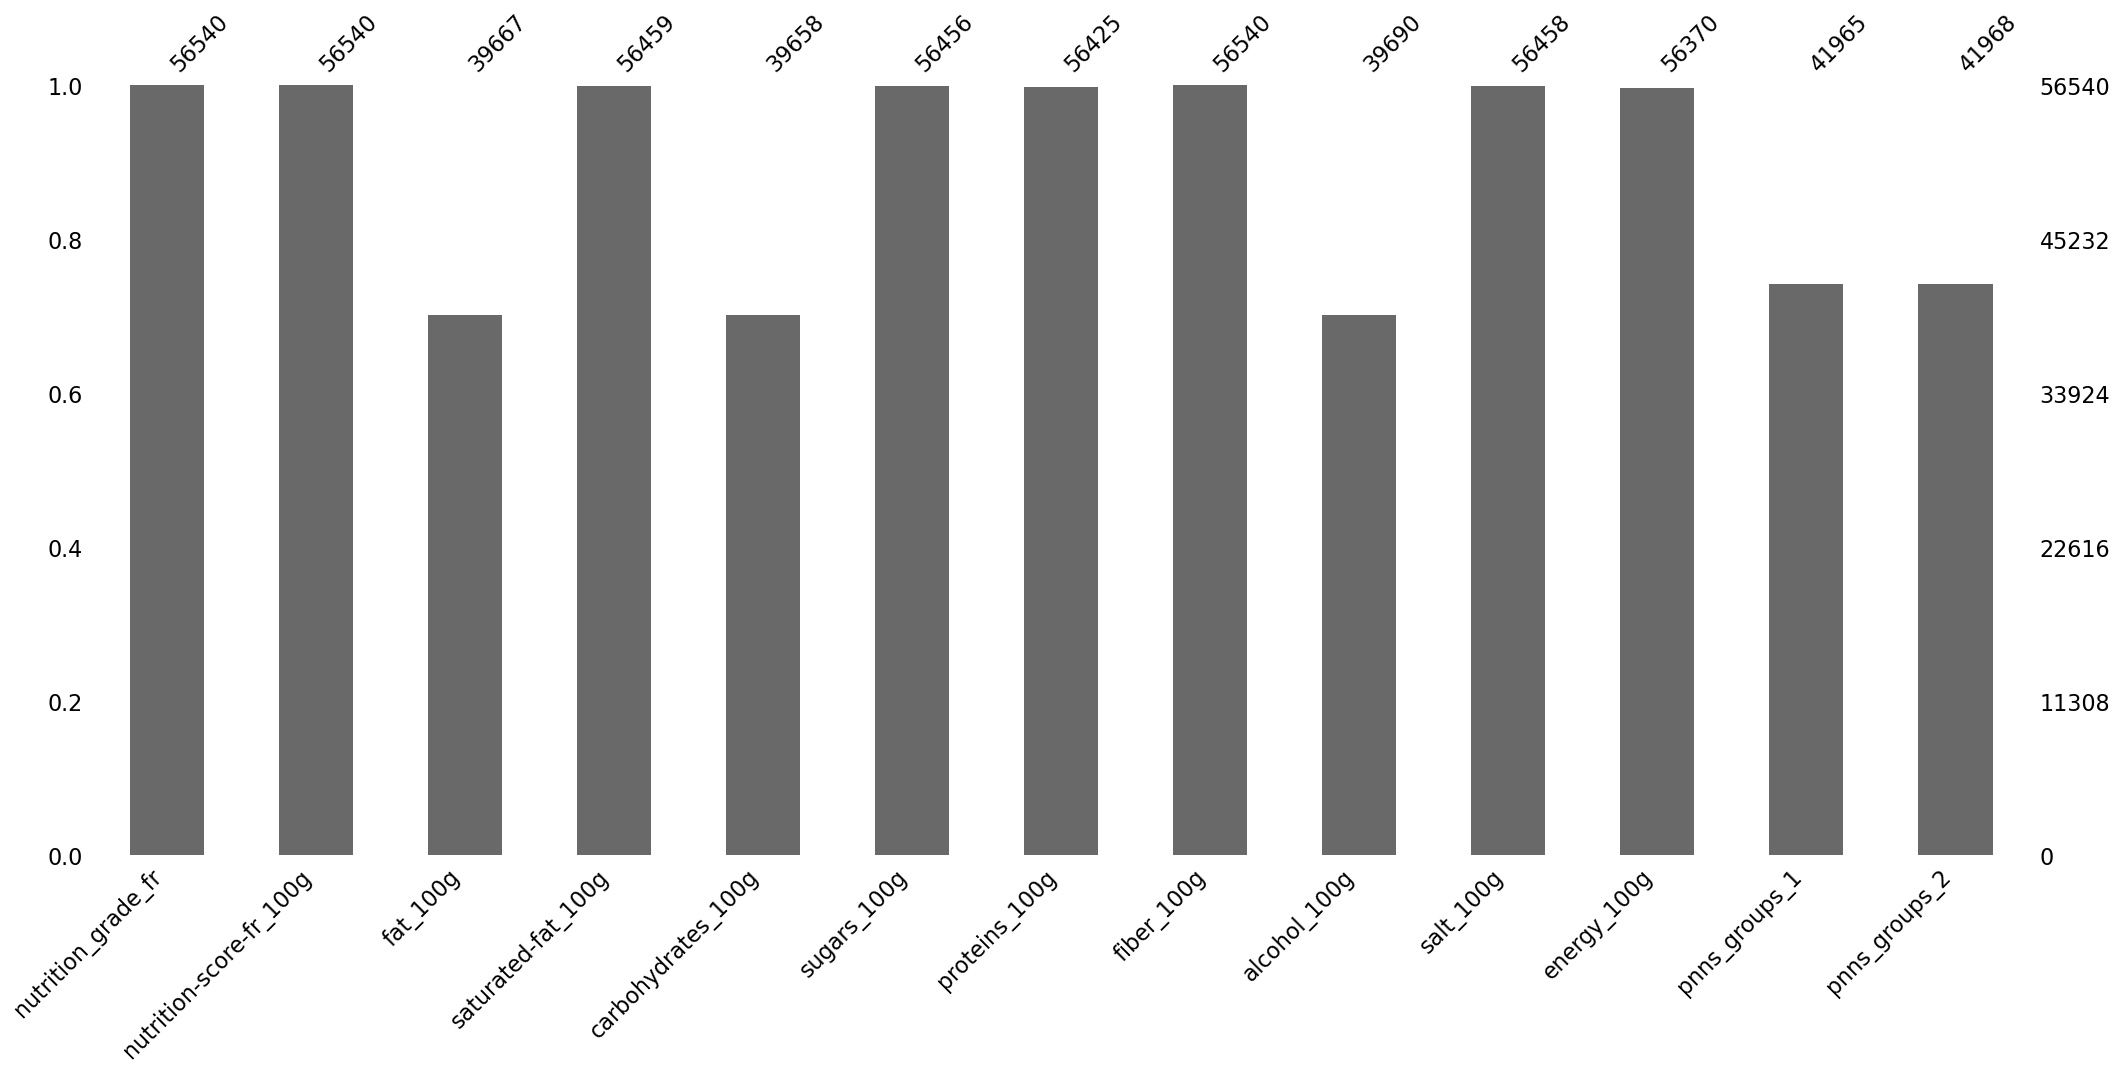

In [102]:
msno.bar(imputed_df)

In [103]:
imputed_df.head(5)

nutrition_grade_fr  nutrition-score-fr_100g  fat_100g  \
201989                  c                      6.0       3.0   
201009                  c                      3.0       0.0   
300929                  c                      9.0       0.8   
210545                  d                     16.0      14.3   
241659                  d                     11.0      10.8   

        saturated-fat_100g  carbohydrates_100g  sugars_100g  proteins_100g  \
201989                 2.0                 8.5          8.5           13.0   
201009                 0.0                10.0          9.7            0.5   
300929                 0.1                76.0         56.0            0.8   
210545                 6.2                59.1         34.3            5.5   
241659                 0.8                28.7          9.9            5.1   

        fiber_100g  alcohol_100g  salt_100g  energy_100g        pnns_groups_1  \
201989         0.0           0.0   2.000000        477.0  milk dairy products   
201009         0.0           0.0   0.030000        179.0            beverages   
300929         4.8           0.0   0.050038       1378.0        sugary snacks   
210545         2.6           0.0   0.530000       1636.0        sugary snacks   
241659         0.4           0.0   1.750000        977.0      composite foods   

                pnns_groups_2  
201989                 cheese  
201009           fruit juices  
300929                 sweets  
210545     biscuits and cakes  
241659  pizza pies and quiche

### Imputation par mediane du groupe (pnns groups 2)

In [104]:
# Pour chaque colonne se terminant par '_100g', remplacer les valeurs NaN par la médiane du même groupe pnns_groups_2
modified_counts = {}

for col in imputed_df.columns:
    if col.endswith('_100g') and imputed_df[col].dtype in ['float64', 'int64']:
        # Calculer la médiane pour chaque groupe de pnns_groups_2
        medians = imputed_df.groupby('pnns_groups_2')[col].transform('median')
        
        # Compter les valeurs NaN avant remplacement
        count_before = imputed_df[col].isna().sum()
        
        # Remplacer les valeurs NaN par la médiane correspondante
        imputed_df[col].fillna(medians, inplace=True)
        
        # Compter les valeurs NaN après remplacement
        count_after = imputed_df[col].isna().sum()
        
        # Calculer le nombre de valeurs modifiées
        modified_counts[col] = count_before - count_after



In [105]:
# Afficher le nombre de valeurs modifiées pour chaque colonne
for col, count in modified_counts.items():
    print(f"{count} valeurs ont été modifiées dans la colonne {col}.")

0 valeurs ont été modifiées dans la colonne nutrition-score-fr_100g.
2327 valeurs ont été modifiées dans la colonne fat_100g.
55 valeurs ont été modifiées dans la colonne saturated-fat_100g.
2327 valeurs ont été modifiées dans la colonne carbohydrates_100g.
55 valeurs ont été modifiées dans la colonne sugars_100g.
79 valeurs ont été modifiées dans la colonne proteins_100g.
0 valeurs ont été modifiées dans la colonne fiber_100g.
2331 valeurs ont été modifiées dans la colonne alcohol_100g.
55 valeurs ont été modifiées dans la colonne salt_100g.
74 valeurs ont été modifiées dans la colonne energy_100g.


In [106]:
imputed_df.shape

(56540, 13)

<Axes: >

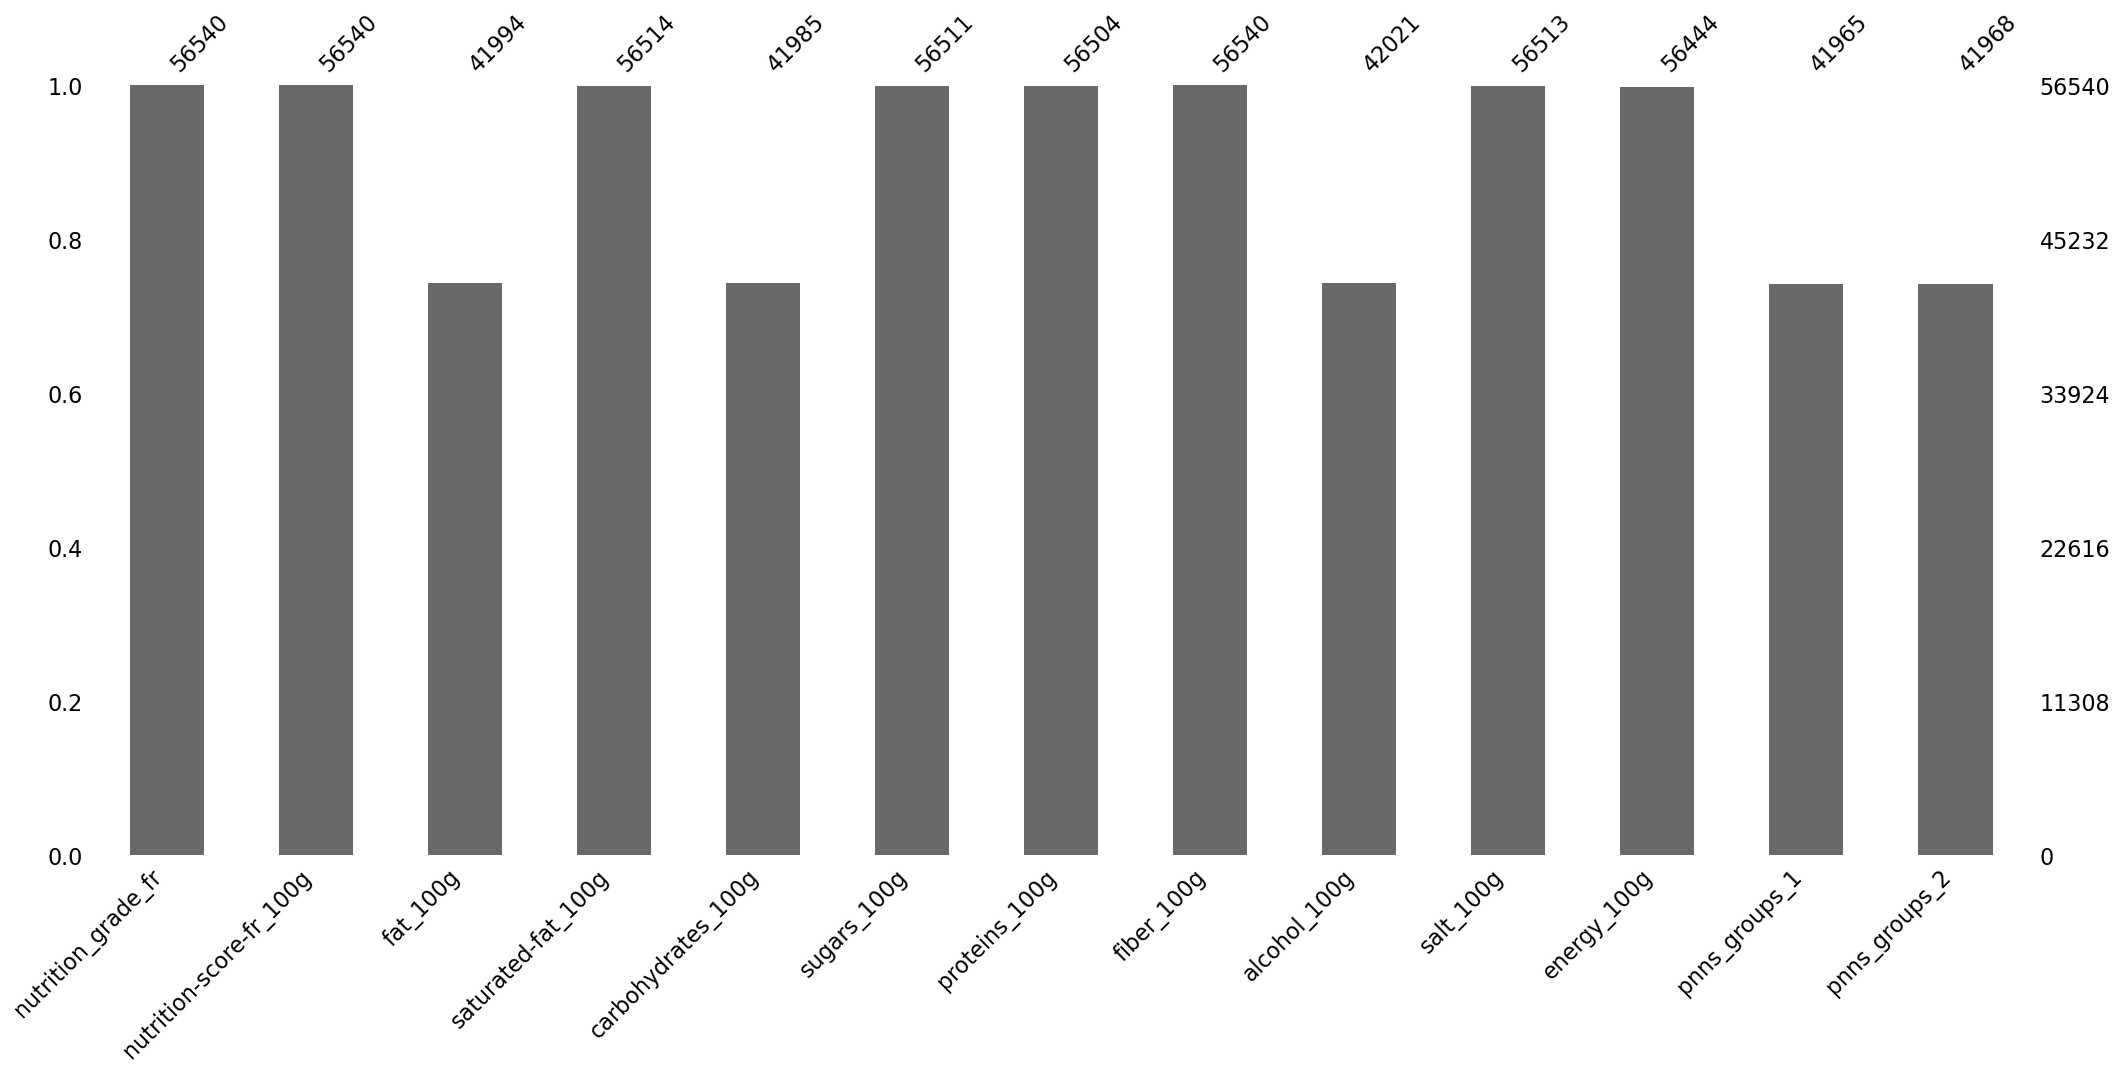

In [107]:
msno.bar(imputed_df)

### Suppression

On recheck les valeurs aberrantes après les imputations pour supprimer les incoherances créées.

In [108]:
imputed_df = validation_energy(imputed_df)

Nombre de lignes où l'energy et les nutriments ne sont pas cohérantes: 1587


In [109]:
imputed_df = validation_sucre_saturatedfat(imputed_df)

Nombre de lignes où les graisses saturées étaient incohérentes : 78
Nombre de lignes où les sucres étaient incohérents : 120


In [110]:
imputed_df = validation_nutrition_score(imputed_df, seuils_nutriscore)

Nombre de lignes où les nutrtions score et grade étaient incohérents pour le grade a: 0
Nombre de lignes où les nutrtions score et grade étaient incohérents pour le grade b: 0
Nombre de lignes où les nutrtions score et grade étaient incohérents pour le grade c: 0
Nombre de lignes où les nutrtions score et grade étaient incohérents pour le grade d: 0
Nombre de lignes où les nutrtions score et grade étaient incohérents pour le grade e: 0


In [111]:
imputed_df = validation_nutrition_score_boisson(imputed_df, seuils_nutriscore_boissons)

Nombre de lignes où les nutrtions score et grade étaient incohérents pour le grade a: 20
Nombre de lignes où les nutrtions score et grade étaient incohérents pour le grade b: 34
Nombre de lignes où les nutrtions score et grade étaient incohérents pour le grade c: 53
Nombre de lignes où les nutrtions score et grade étaient incohérents pour le grade d: 31
Nombre de lignes où les nutrtions score et grade étaient incohérents pour le grade e: 0


In [112]:
imputed_df.shape

(54637, 13)

In [113]:
# Valeurs manquantes
missing_values_count = imputed_df.isnull().sum()
total_cells = np.product(imputed_df.shape)
total_missing = missing_values_count.sum()
percent_missing = (total_missing/total_cells) * 100
print('Le pourcentage de valeurs manquantes est de', round(percent_missing, 2),'%')

Le pourcentage de valeurs manquantes est de 10.27 %


Comme nous n'avons pas pu imputer certaines variables (environ 10%) nous decidons de les supprimer avant de passer à l'analyse.

In [114]:
imputed_df = imputed_df.dropna()

In [115]:
# Valeurs manquantes
missing_values_count = imputed_df.isnull().sum()
total_cells = np.product(imputed_df.shape)
total_missing = missing_values_count.sum()
percent_missing = (total_missing/total_cells) * 100
print('Le pourcentage de valeurs manquantes est de', round(percent_missing, 2),'%')

Le pourcentage de valeurs manquantes est de 0.0 %


In [116]:
imputed_df.shape

(40065, 13)

<Axes: >

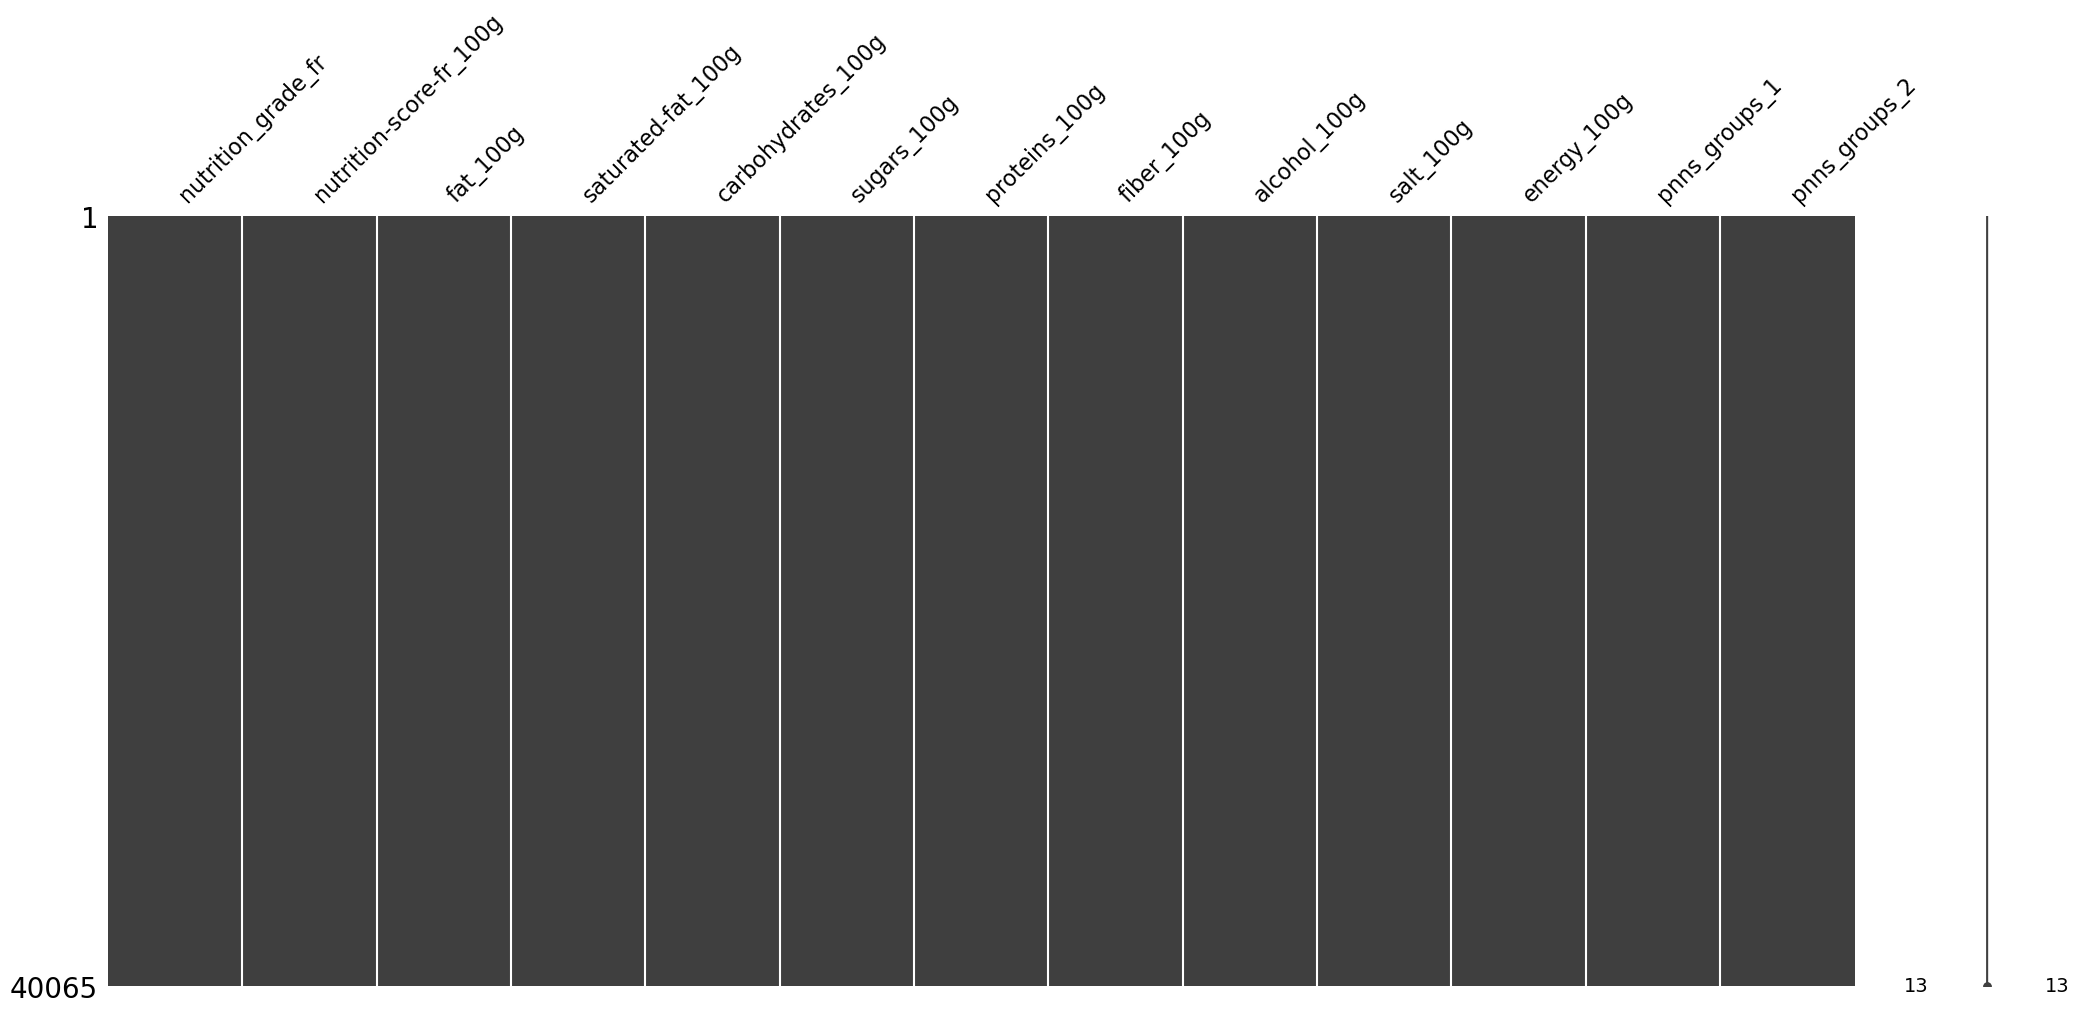

In [117]:
msno.matrix(imputed_df)

<Axes: >

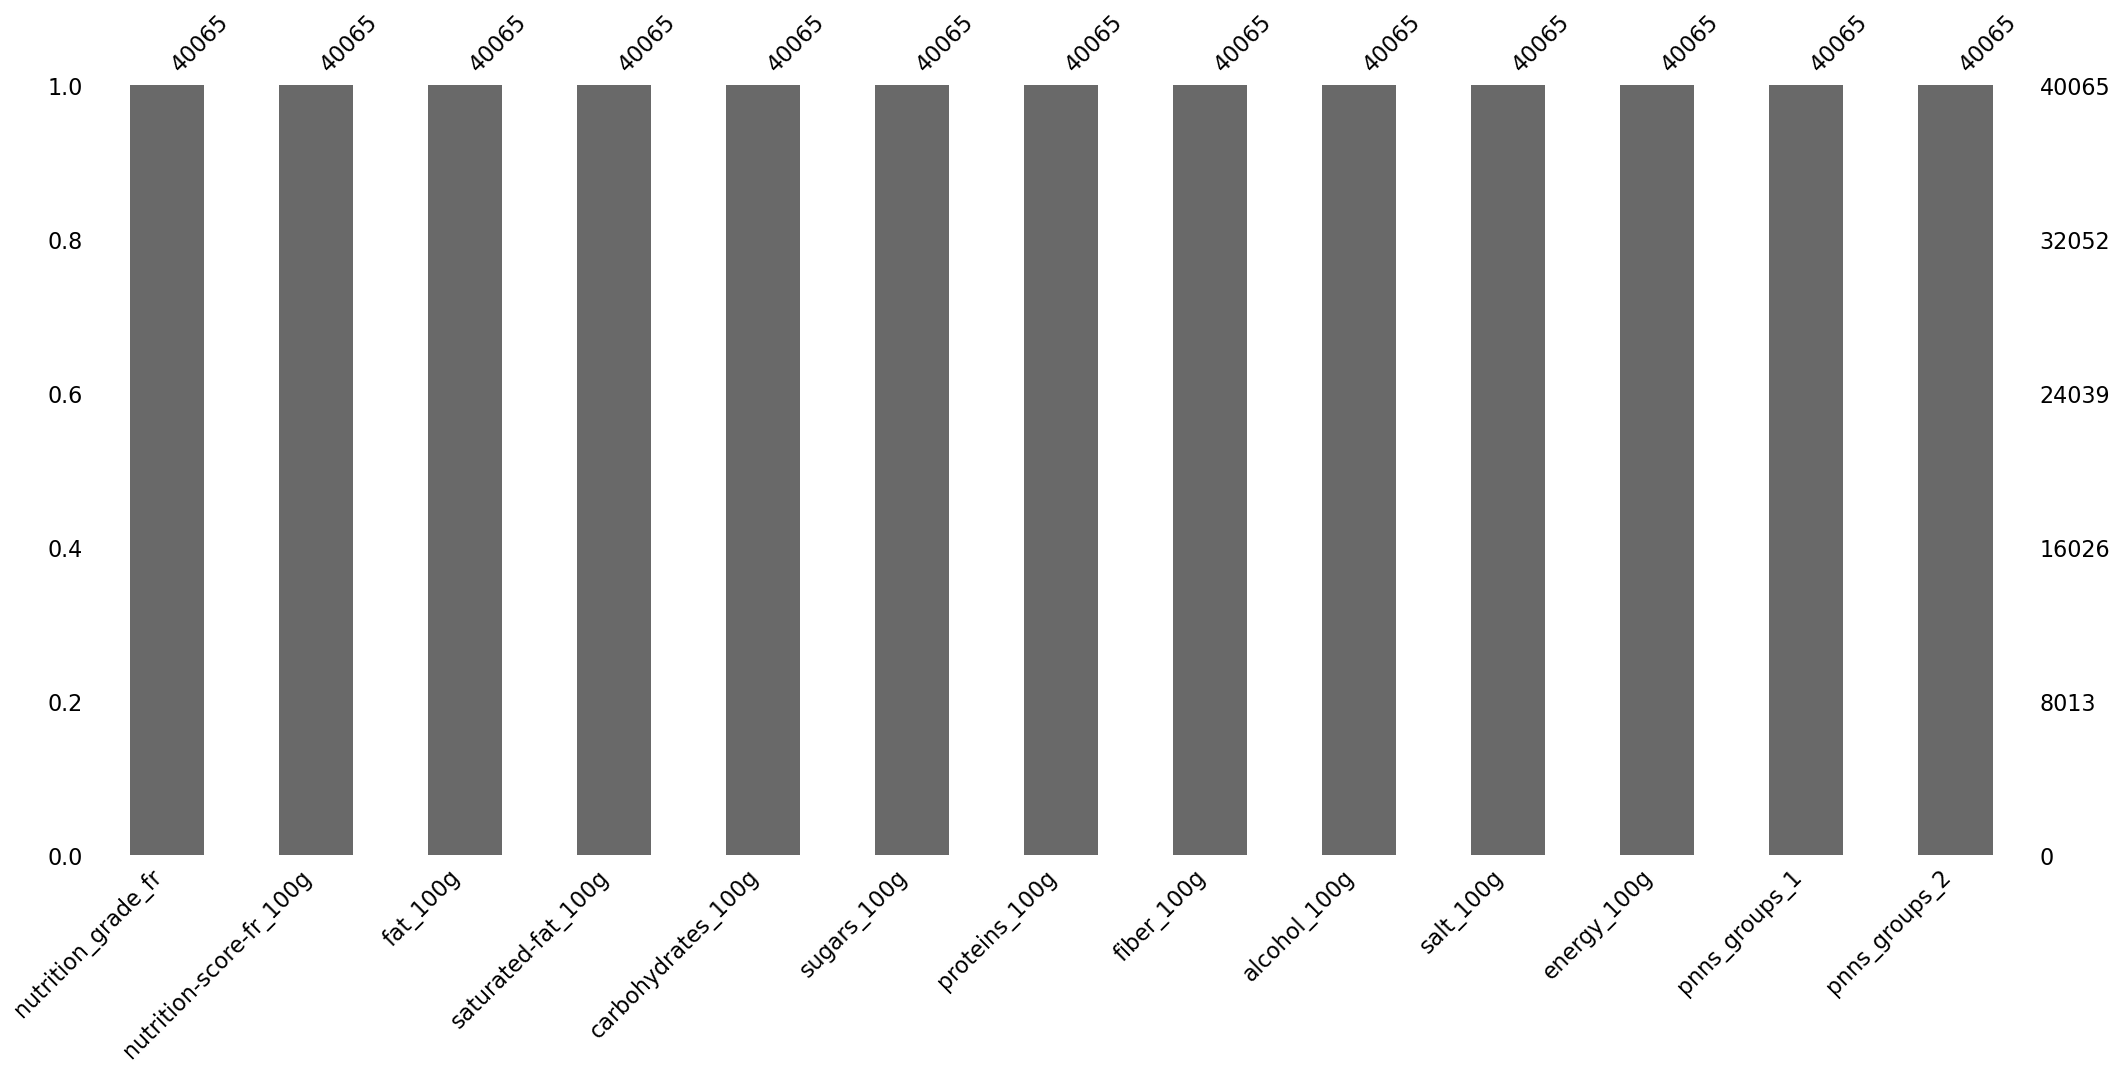

In [118]:
msno.bar(imputed_df)

# Analyse Exploratoire des Données

## Analyse Univariée

In [119]:
# séparation des boissons et des autres aliments car le nutriscore n'est pas calculé de la même façon
imputed_df_boisson = imputed_df[imputed_df['pnns_groups_1'] == "beverages"].copy()
imputed_df_autre = imputed_df[imputed_df['pnns_groups_1'] != "beverages"].copy()

In [120]:
imputed_df_boisson.shape

(3045, 13)

In [121]:
imputed_df_autre.shape

(37020, 13)

In [122]:
nutriments_col =  ['energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g','sugars_100g','proteins_100g',
                'fiber_100g','salt_100g','alcohol_100g']

In [123]:
imputed_df_autre.describe()

nutrition-score-fr_100g      fat_100g  saturated-fat_100g  \
count             37020.000000  37020.000000        37020.000000   
mean                  9.162912     15.288974            6.128029   
std                   9.047435     16.941810            8.310499   
min                 -14.000000      0.000000            0.000000   
25%                   1.000000      2.800000            0.700000   
50%                  10.000000      9.600000            2.700000   
75%                  16.000000     23.400000            9.000000   
max                  35.000000    100.000000          100.000000   

       carbohydrates_100g   sugars_100g  proteins_100g    fiber_100g  \
count        37020.000000  37020.000000   37020.000000  37020.000000   
mean            30.098613     13.413454       8.635470      1.736660   
std             27.495631     18.586677       7.259369      2.843358   
min              0.000000      0.000000       0.000000      0.000000   
25%              4.400000      1.000000       3.500000      0.000000   
50%             19.800000      3.700000       6.900000      0.500000   
75%             56.000000     21.000000      12.000000      2.500000   
max            100.000000    100.000000      95.000000     88.000000   

       alcohol_100g     salt_100g   energy_100g  
count  37020.000000  37020.000000  37020.000000  
mean       0.002420      1.016709   1240.273915  
std        0.108551      1.967780    729.244280  
min        0.000000      0.000000      0.000000  
25%        0.000000      0.125000    585.000000  
50%        0.000000      0.711200   1173.000000  
75%        0.000000      1.300480   1761.000000  
max       13.000000     93.600000   3772.000000

In [124]:
imputed_df_boisson.describe()

nutrition-score-fr_100g     fat_100g  saturated-fat_100g  \
count              3045.000000  3045.000000         3045.000000   
mean                  8.814122     0.498723            0.301449   
std                   6.787191     2.075100            1.701538   
min                   0.000000     0.000000            0.000000   
25%                   3.000000     0.000000            0.000000   
50%                   7.000000     0.000000            0.000000   
75%                  14.000000     0.100000            0.010000   
max                  40.000000    35.000000           34.600000   

       carbohydrates_100g  sugars_100g  proteins_100g   fiber_100g  \
count         3045.000000  3045.000000    3045.000000  3045.000000   
mean            15.309545    14.178282       0.622214     0.269256   
std             20.234962    19.085650       1.826320     1.164321   
min              0.000000     0.000000       0.000000     0.000000   
25%              7.500000     6.800000       0.000000     0.000000   
50%             10.400000     9.700000       0.200000     0.000000   
75%             11.900000    11.000000       0.500000     0.200000   
max             99.000000    94.000000      31.000000    34.700000   

       alcohol_100g    salt_100g  energy_100g  
count   3045.000000  3045.000000  3045.000000  
mean       0.000066     0.144667   291.266732  
std        0.002562     2.064486   387.907261  
min        0.000000     0.000000     0.000000  
25%        0.000000     0.000000   144.000000  
50%        0.000000     0.010000   188.000000  
75%        0.000000     0.030000   218.000000  
max        0.100000    76.200000  2320.000000

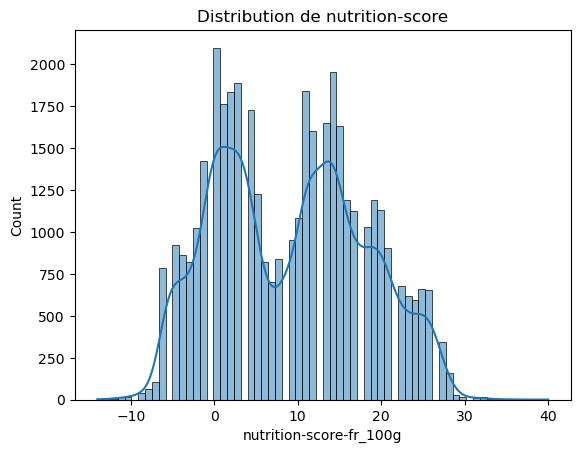

In [125]:
# Sélectionnez uniquement la colonne 'nutrition-score'
nutrition_score_column = imputed_df['nutrition-score-fr_100g']

# Créez un histogramme pour la distribution de la colonne 'nutrition-score'
sns.histplot(data=nutrition_score_column, kde=True)

# Ajoutez un titre au graphique
plt.title("Distribution de nutrition-score")

# Affichez le graphique
plt.show()

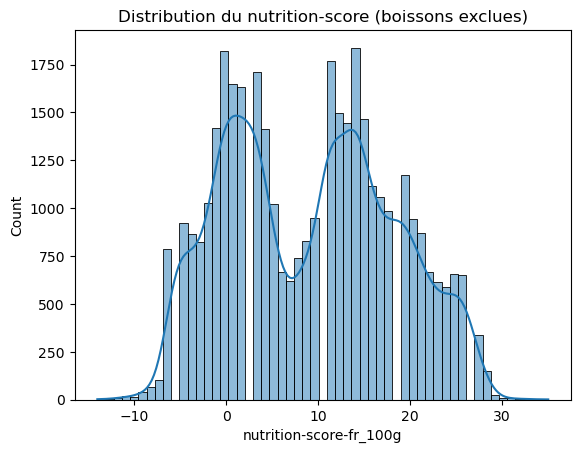

In [126]:
# Sélectionnez uniquement la colonne 'nutrition-score'
nutrition_score_column = imputed_df_autre['nutrition-score-fr_100g']

# Créez un histogramme pour la distribution de la colonne 'nutrition-score'
sns.histplot(data=nutrition_score_column, kde=True)

# Ajoutez un titre au graphique
plt.title("Distribution du nutrition-score (boissons exclues)")

# Affichez le graphique
plt.show()

La distribution du score nutritionnel pour tous les produits et pour les produits hors boissons montre deux pics principaux, ce qui pourrait suggérer la présence de deux sous-groupes distincts dans les données.

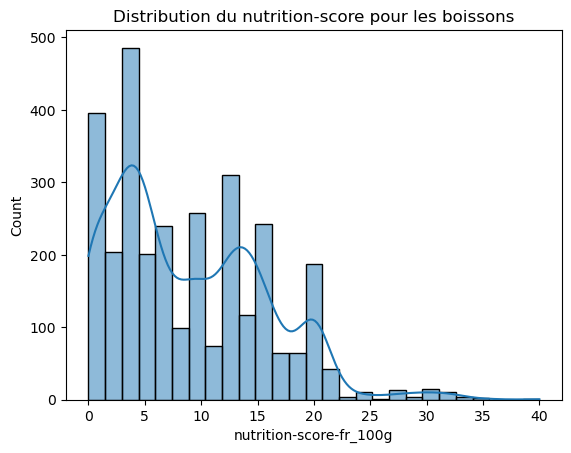

In [127]:
# Sélectionnez uniquement la colonne 'nutrition-score'
nutrition_score_column = imputed_df_boisson['nutrition-score-fr_100g']

# Créez un histogramme pour la distribution de la colonne 'nutrition-score'
sns.histplot(data=nutrition_score_column, kde=True)

# Ajoutez un titre au graphique
plt.title("Distribution du nutrition-score pour les boissons")

# Affichez le graphique
plt.show()

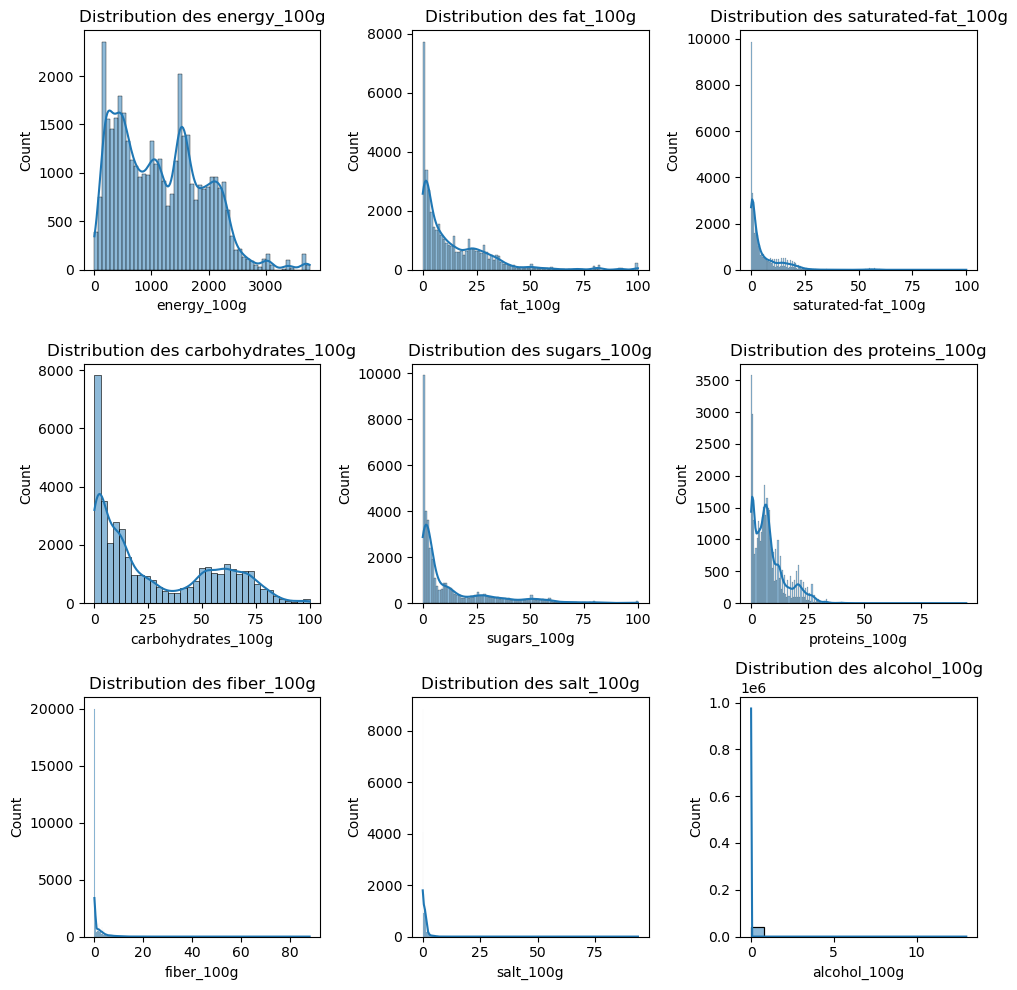

In [128]:
# Créer un density plot pour chaque colonne se terminant de nutriment et energy
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(10,10))
axs = axs.flatten()

for ax, column in zip(axs, nutriments_col):
    sns.histplot(data=imputed_df, x=column, kde=True, ax=ax)
    ax.set_title(f'Distribution des {column}')

# Affichez les graphiques
plt.tight_layout()
plt.show()

    Énergie (energy_100g) : La distribution de l'énergie montre plusieurs pics, ce qui pourrait indiquer la présence de différents groupes de produits avec des teneurs en énergie distinctes. 

    Matières grasses (fat_100g), Acides gras saturés (saturated-fat_100g), Glucides (carbohydrates_100g), Sucres (sugars_100g), Protéines (proteins_100g), Fibres (fiber_100g), Sel (salt_100g) : Ces variables semblent avoir des distributions fortement asymétriques avec de longues queues à droite, ce qui suggère que beaucoup de produits ont des teneurs faibles à modérées dans ces nutriments, avec quelques produits ayant des teneurs très élevées. 

    Alcool (alcohol_100g) : Cette variable est très asymétrique avec une concentration énorme de valeurs à zéro ou près de zéro, ce qui est attendu puisque la majorité des produits alimentaires ne contiennent pas d'alcool. 

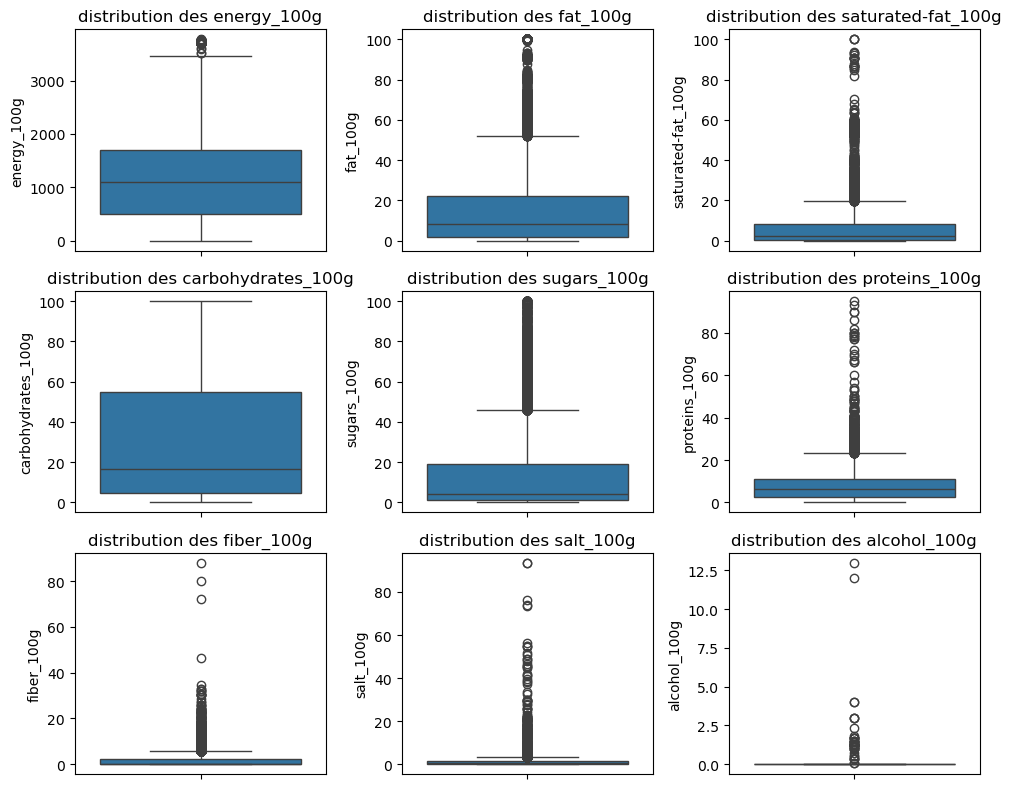

In [129]:
# Créer un boxplot pour chaque variable de nutriments et energy
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(10,8))
axs = axs.flatten()

for ax, column in zip(axs, nutriments_col):
    sns.boxplot(imputed_df[column], ax=ax)
    ax.set_title(f'distribution des {column}')

# Affichez les graphiques
plt.tight_layout()
plt.show()


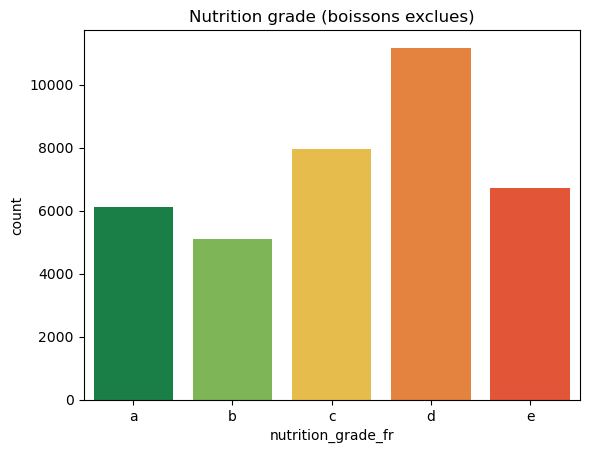

In [130]:
sns.countplot(x='nutrition_grade_fr', data=imputed_df_autre, order=grade_order, hue='nutrition_grade_fr', palette=grade_colors, legend=False)
plt.title("Nutrition grade (boissons exclues)")
plt.show()

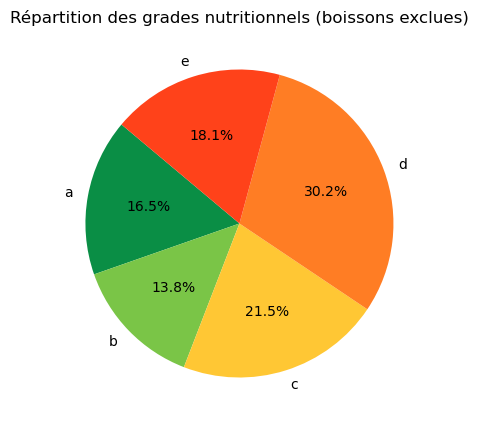

In [131]:
# Comptez le nombre d'occurrences de chaque 'nutrition_grade_fr'
grade_counts = imputed_df_autre['nutrition_grade_fr'].value_counts().loc[grade_order]

# Extraire les couleurs dans l'ordre
colors_ordered = [grade_colors[grade] for grade in grade_order]

# Créez le camembert en utilisant les counts et les couleurs spécifiées
plt.figure(figsize=(5, 5))
plt.pie(grade_counts, labels=grade_order, colors=colors_ordered, autopct='%1.1f%%', startangle=140)
plt.title("Répartition des grades nutritionnels (boissons exclues)")
plt.legend
plt.show()

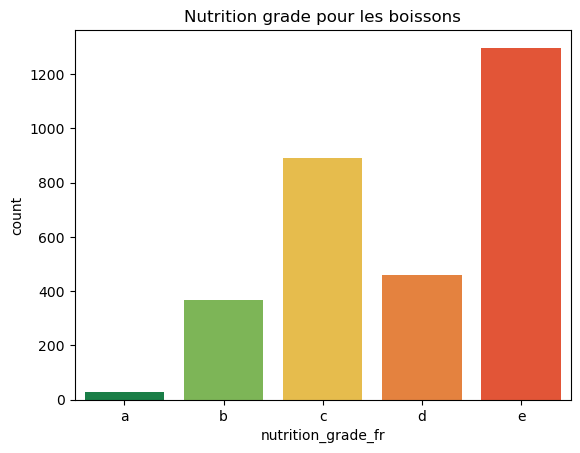

In [132]:
sns.countplot(x='nutrition_grade_fr', data=imputed_df_boisson, order=grade_order, hue='nutrition_grade_fr', palette=grade_colors, legend=False)
plt.title("Nutrition grade pour les boissons")
plt.show()

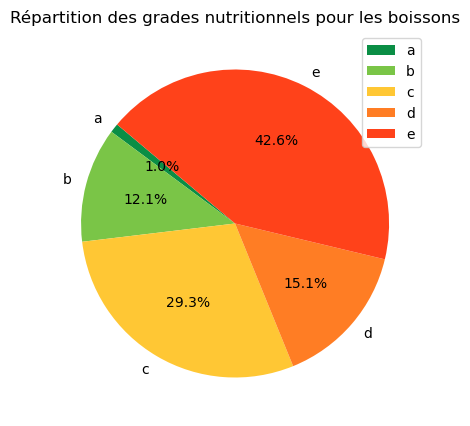

In [133]:
# Comptez le nombre d'occurrences de chaque 'nutrition_grade_fr'
grade_counts = imputed_df_boisson['nutrition_grade_fr'].value_counts().loc[grade_order]

# Créez le camembert en utilisant les counts et les couleurs spécifiées
plt.figure(figsize=(5, 5))
plt.pie(grade_counts, labels=grade_order, colors=colors_ordered, autopct='%1.1f%%', startangle=140)
plt.title("Répartition des grades nutritionnels pour les boissons")
plt.legend()
plt.show()

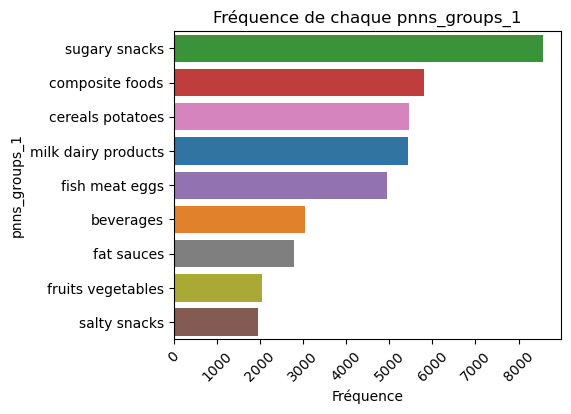

In [134]:
# pnns_groups_1
group_counts = imputed_df['pnns_groups_1'].value_counts()

plt.figure(figsize=(5, 4))

# Créer un graphique à barres avec des barres ordonnées par la fréquence (décroissante)
sns.countplot(y='pnns_groups_1', data=imputed_df, order=group_counts.index, hue='pnns_groups_1', palette="tab10", legend=False)

plt.xticks(rotation=45)

# Ajouter des titres et des labels
plt.title('Fréquence de chaque pnns_groups_1')
plt.xlabel('Fréquence')
plt.ylabel('pnns_groups_1')

plt.show()

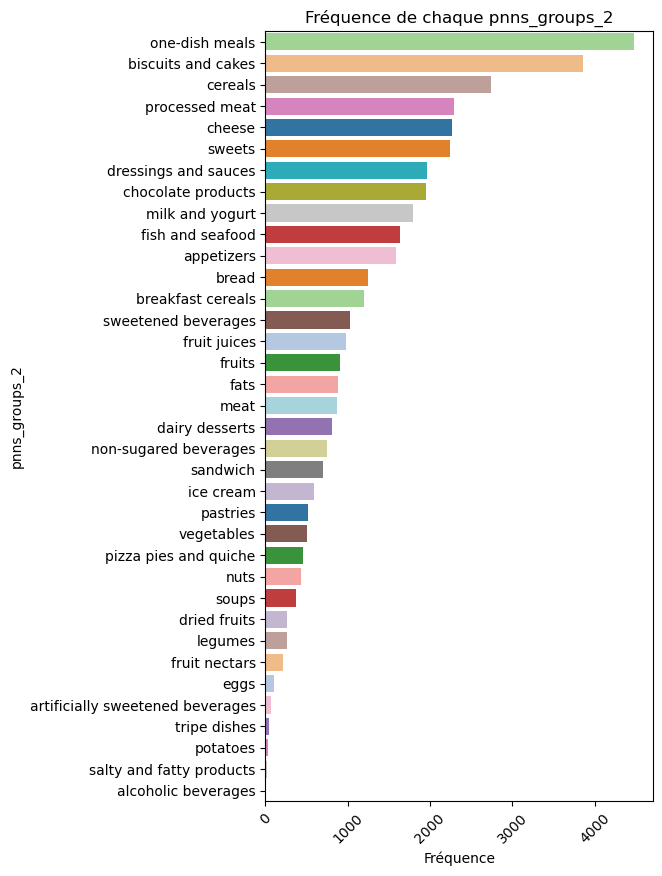

In [135]:
# pnns_groups_2
group_counts = imputed_df['pnns_groups_2'].value_counts()

plt.figure(figsize=(5, 10))

# Créer un graphique à barres avec des barres ordonnées par la fréquence (décroissante)
sns.countplot(y='pnns_groups_2', data=imputed_df, order=group_counts.index, hue='pnns_groups_2', palette="tab20", legend=False)

plt.xticks(rotation=45)

# Ajouter des titres et des labels
plt.title('Fréquence de chaque pnns_groups_2')
plt.xlabel('Fréquence')
plt.ylabel('pnns_groups_2')

plt.show()

## Analyse Bivariée

### Nutriscore grade / Nutrition score

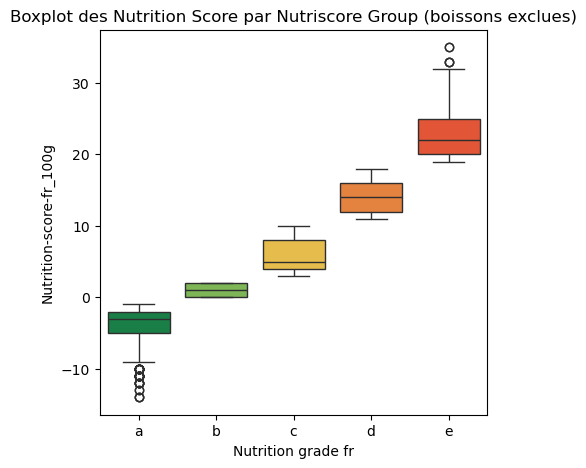

In [136]:
plt.figure(figsize=(5, 5))

sns.boxplot(x='nutrition_grade_fr', y='nutrition-score-fr_100g', data=imputed_df_autre, order=grade_order, hue='nutrition_grade_fr', palette=grade_colors, legend=False)
plt.xlabel('Nutrition grade fr')
plt.ylabel('Nutrition-score-fr_100g')
plt.title(f'Boxplot des Nutrition Score par Nutriscore Group (boissons exclues)')

plt.show()

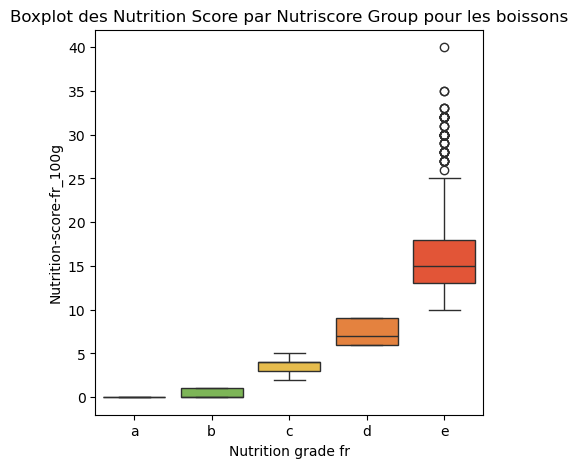

In [137]:
plt.figure(figsize=(5, 5))

sns.boxplot(x='nutrition_grade_fr', y='nutrition-score-fr_100g', data=imputed_df_boisson, order=grade_order, hue='nutrition_grade_fr', palette=grade_colors, legend=False)
plt.xlabel('Nutrition grade fr')
plt.ylabel('Nutrition-score-fr_100g')
plt.title(f'Boxplot des Nutrition Score par Nutriscore Group pour les boissons')

plt.show()

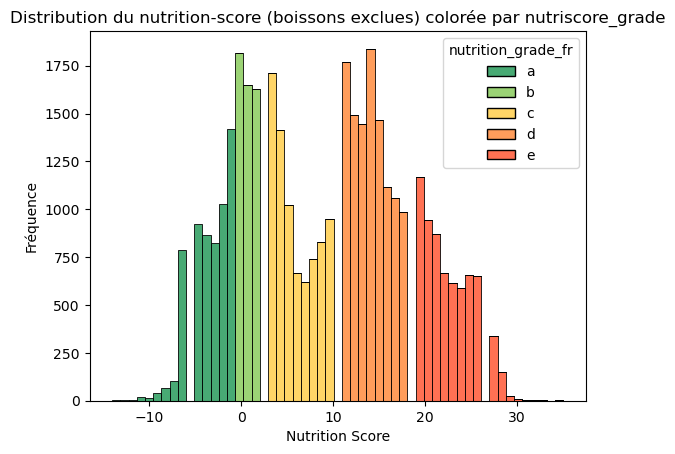

In [138]:
# Créez un histogramme pour la distribution de la colonne 'nutrition-score' coloré par 'nutriscore_grade'
sns.histplot(data=imputed_df_autre, x='nutrition-score-fr_100g', hue='nutrition_grade_fr', palette=grade_colors, multiple="stack", 
             hue_order=grade_order)

# Ajoutez un titre au graphique
plt.title("Distribution du nutrition-score (boissons exclues) colorée par nutriscore_grade")
plt.xlabel("Nutrition Score")
plt.ylabel("Fréquence")

# Affichez le graphique
plt.show()

Distribution bi-modale

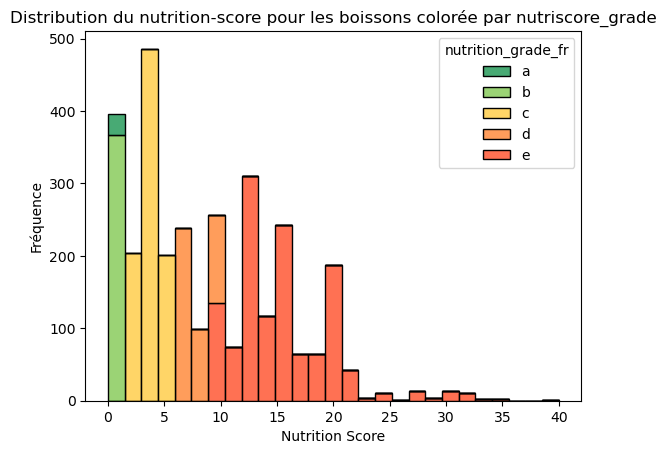

In [139]:
# Créez un histogramme pour la distribution de la colonne 'nutrition-score' coloré par 'nutriscore_grade'
sns.histplot(data=imputed_df_boisson, x='nutrition-score-fr_100g', hue='nutrition_grade_fr', palette=grade_colors, multiple="stack", 
             hue_order=grade_order)

# Ajoutez un titre au graphique
plt.title("Distribution du nutrition-score pour les boissons colorée par nutriscore_grade")
plt.xlabel("Nutrition Score")
plt.ylabel("Fréquence")

# Affichez le graphique
plt.show()

### Nutrition grade / Catégories

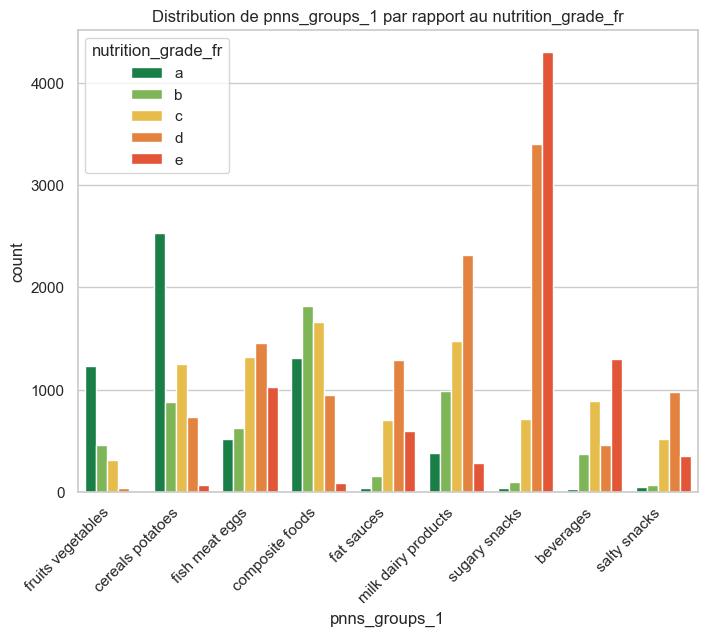

In [140]:
# Tri du DataFrame en fonction de la colonne nutrition_grade_fr
imputed_df = imputed_df.sort_values(by="nutrition_grade_fr", ascending=True)

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

sns.countplot(x="pnns_groups_1", hue="nutrition_grade_fr", data=imputed_df, palette=grade_colors)
plt.title("Distribution de pnns_groups_1 par rapport au nutrition_grade_fr")

plt.xticks(rotation=45, ha="right")

plt.show()


Les aliments avec un score 'a' semblent être plus fréquents dans les catégories des fruits et légumes et des céréales, ce qui est attendu car ces aliments sont généralement considérés comme sains. <br>
Les scores 'd' et 'e' sont plus fréquents dans les snacks sucrés et salés ainsi que dans les sauces grasses, ce qui suggère que ces aliments sont considérés comme moins sains.

In [141]:
from scipy.stats import chi2_contingency

# Créez un tableau croisé des deux variables catégorielles
cross_table = pd.crosstab(imputed_df['nutrition_grade_fr'], imputed_df['pnns_groups_1'])

# Effectuez le test du chi-carré
chi2, p, _, _ = chi2_contingency(cross_table)

print(f"Chi-squared value: {chi2}")
print(f"P-value: {p}")


Chi-squared value: 23275.183667153502
P-value: 0.0


Il existe une relation statistiquement significative entre le nutrition_grade_fr et le pnns_groups_1.

### Nutrition grade / Nutriments

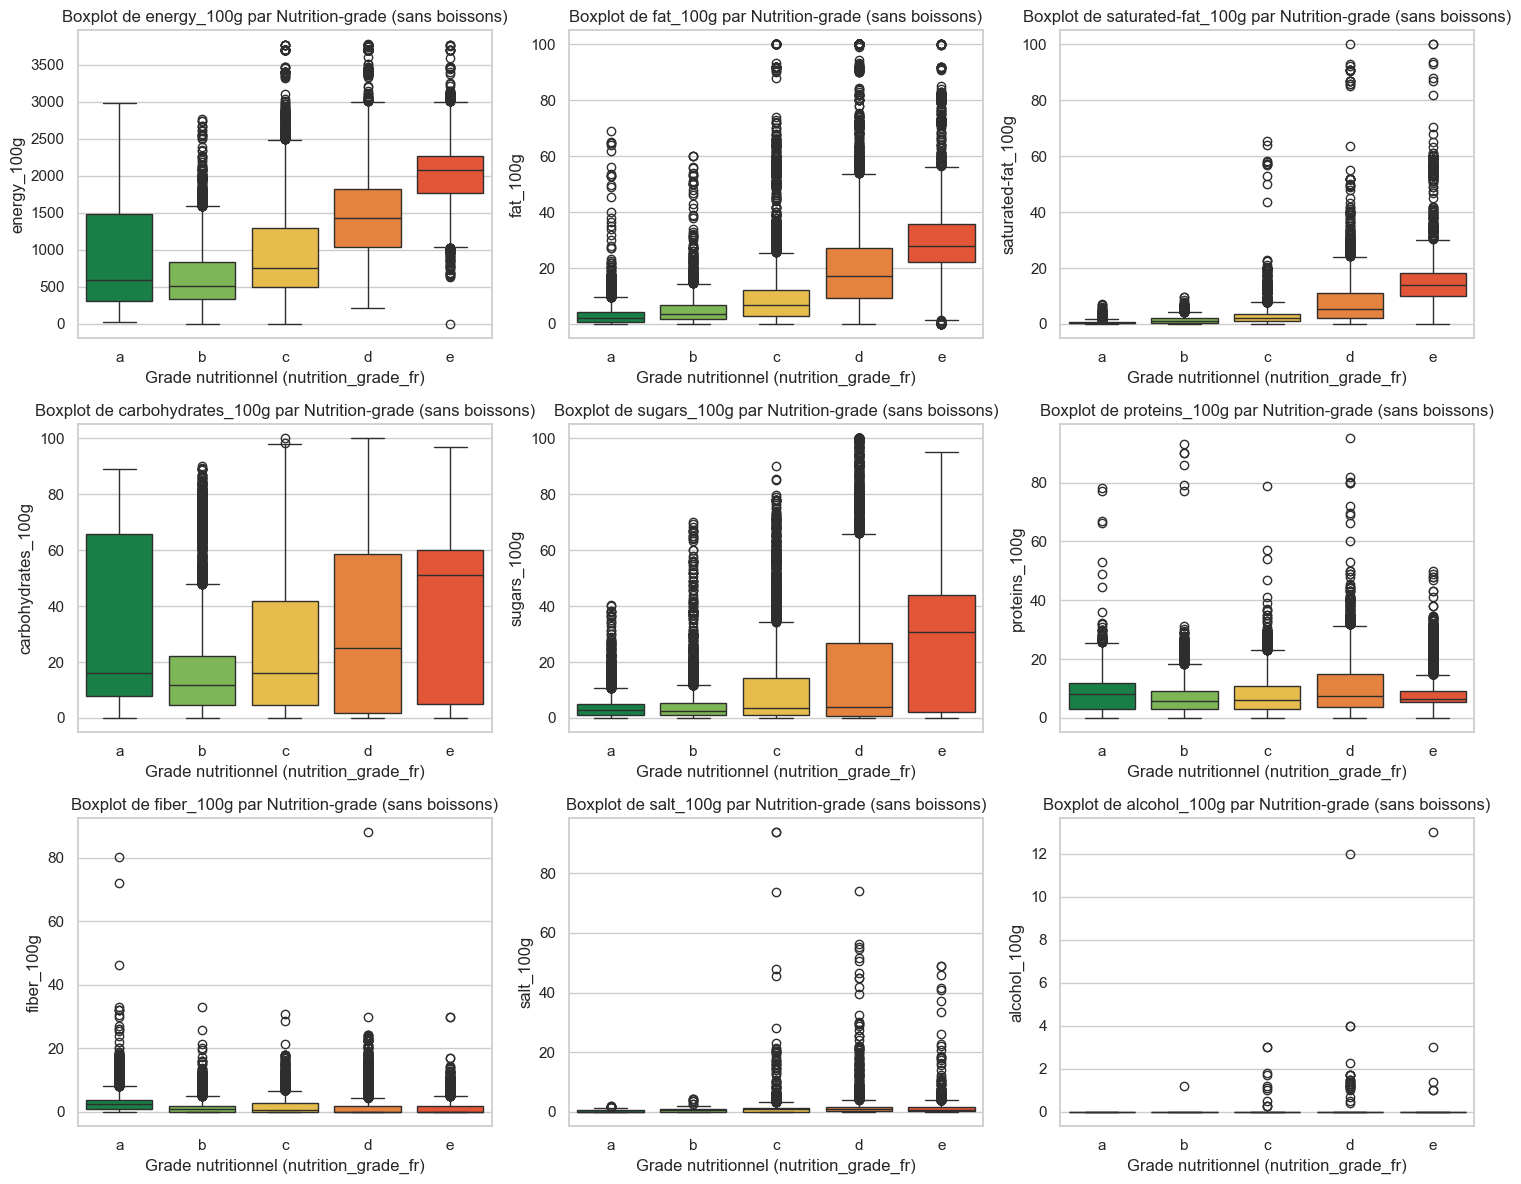

In [142]:
# Créer un boxplot pour chaque variable de nutriments et energy
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15,12))
axs = axs.flatten()

for ax, column in zip(axs, nutriments_col):
    sns.boxplot(x='nutrition_grade_fr', y=column, data=imputed_df_autre, ax=ax, order=grade_order, hue='nutrition_grade_fr', palette=grade_colors, legend=False)
    ax.set_xlabel('Grade nutritionnel (nutrition_grade_fr)')
    ax.set_ylabel(column)
    ax.set_title(f"Boxplot de {column} par Nutrition-grade (sans boissons)")


# Affichez les graphiques
plt.tight_layout()
plt.show()



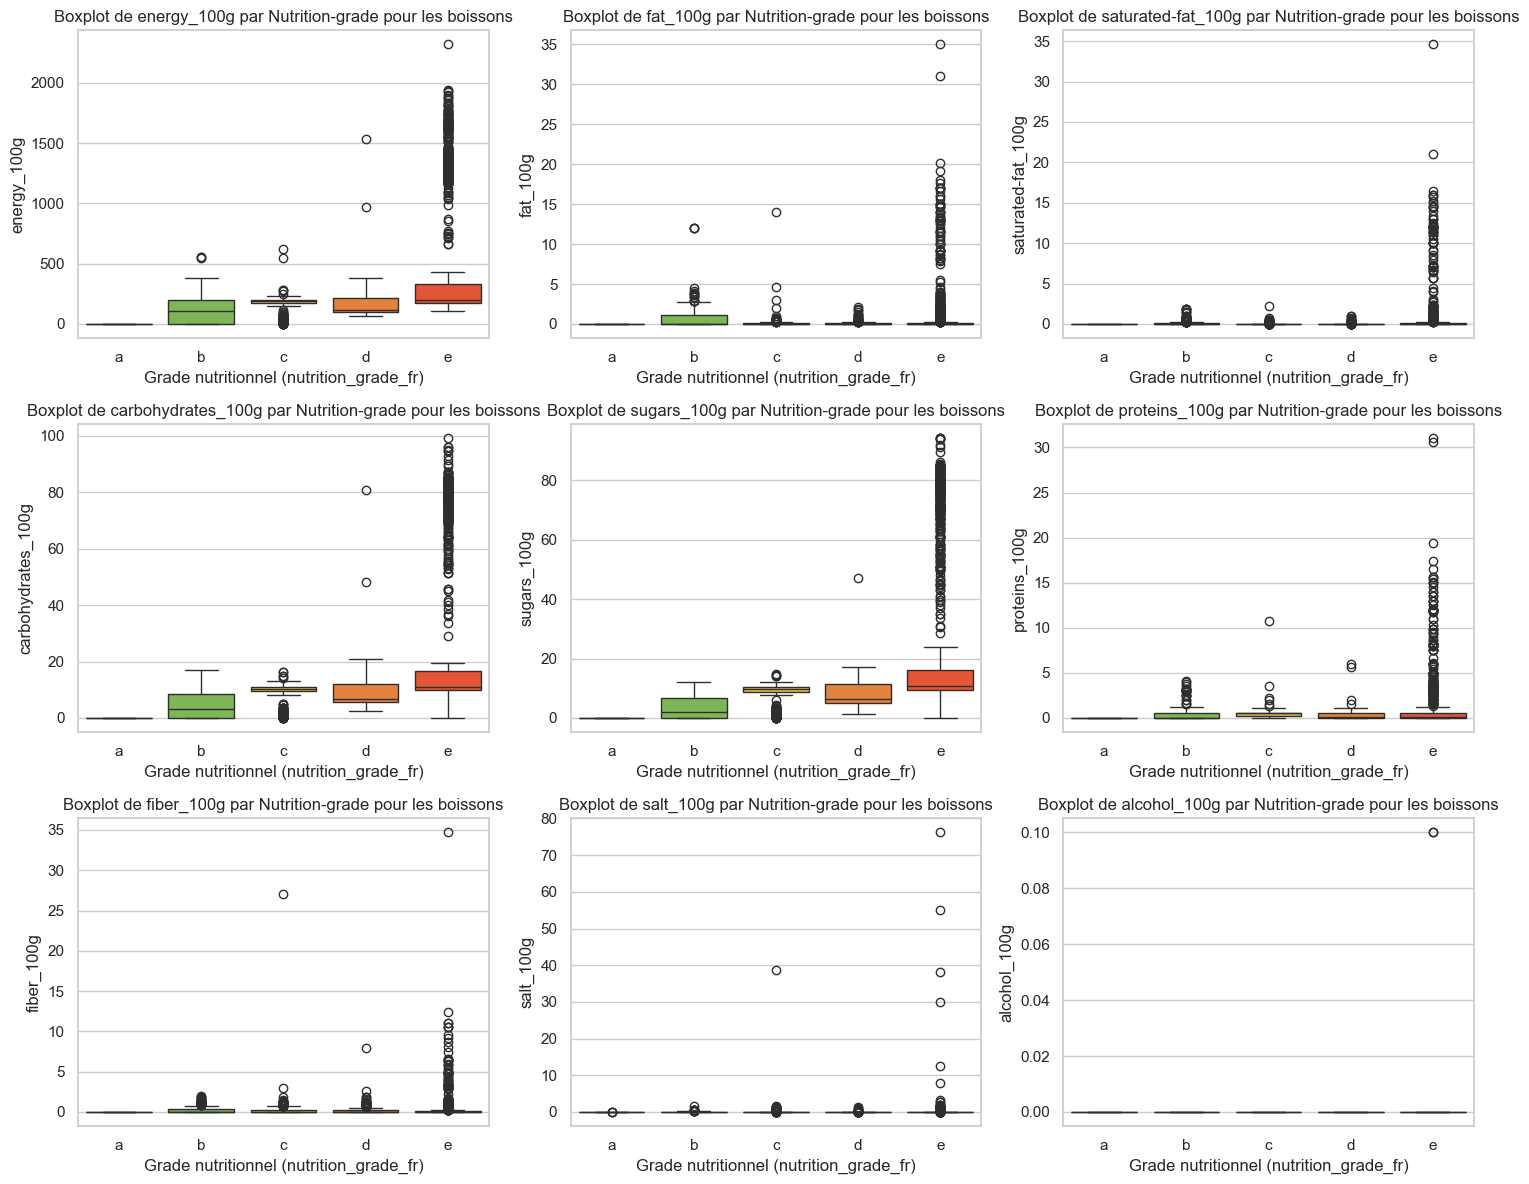

In [143]:
# Créer un boxplot pour chaque variable de nutriments et energy
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15,12))
axs = axs.flatten()

for ax, column in zip(axs, nutriments_col):
    sns.boxplot(x='nutrition_grade_fr', y=column, data=imputed_df_boisson, ax=ax, order=grade_order, hue='nutrition_grade_fr', palette=grade_colors, legend=False)
    ax.set_xlabel('Grade nutritionnel (nutrition_grade_fr)')
    ax.set_ylabel(column)
    ax.set_title(f"Boxplot de {column} par Nutrition-grade pour les boissons")


# Affichez les graphiques
plt.tight_layout()
plt.show()

### Etude des corrélations

In [144]:
# Normalisation des données
#scaler = MinMaxScaler()
scaler = StandardScaler()

imputed_df_normalized = imputed_df.copy()

# Appliquez la normalisation min-max aux données
imputed_df_normalized[numerics_col] = scaler.fit_transform(imputed_df[numerics_col])


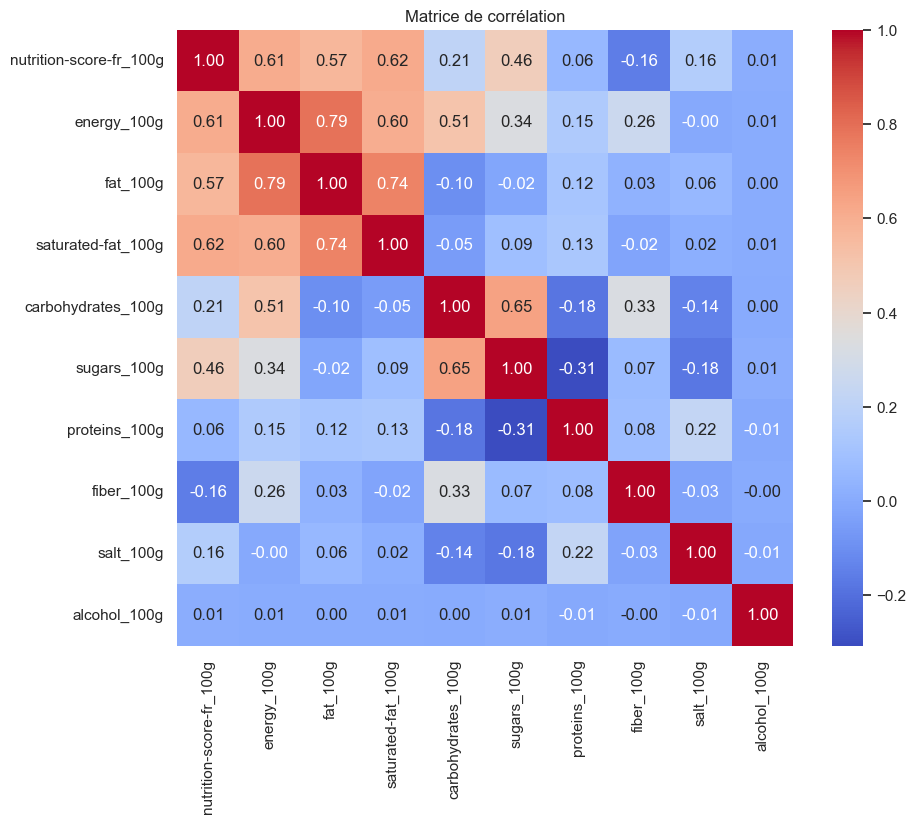

In [145]:
# Calcul de la matrice de corrélation
corr_matrix = imputed_df_normalized[numerics_col].corr()

# Création d'une heatmap avec seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)

# Titre et affichage du graphique
plt.title('Matrice de corrélation')
plt.show()

<b>"nutrition-score-fr_100g"</b> semble positivement corrélé avec <b>energy_100g</b>, <b>"saturated-fat_100g"</b> et <b>"fat_100g"</b>, ce qui suggère que des scores nutritionnels plus élevés pourraient être associés à des niveaux plus élevés de ces nutriments.<br>
<br>
<b>"energy_100g"</b> est fortement corrélé avec <b>"fat_100g"</b> et <b>"saturated-fat_100g"</b>, ce qui est logique car les matières grasses ont une teneur élevée en calories.<br>
<br>
<b>"carbohydrates_100g"</b> et <b>"sugars_100g"</b> sont également fortement corrélés, suggérant que la teneur en glucides des produits est souvent influencée par leur teneur en sucre.<br>
<br>
Il y a peu ou pas de corrélation entre <b>"protein_100g"</b>, <b>"fiber_100g"</b>, <b>"salt_100g"</b>, <b>"alcohol_100g"</b> et le <b>"nutrition-score-fr_100g"</b>, ce qui peut indiquer que ces nutriments n'influencent pas directement le score nutritionnel autant que les graisses et les sucres.

### Pairplots

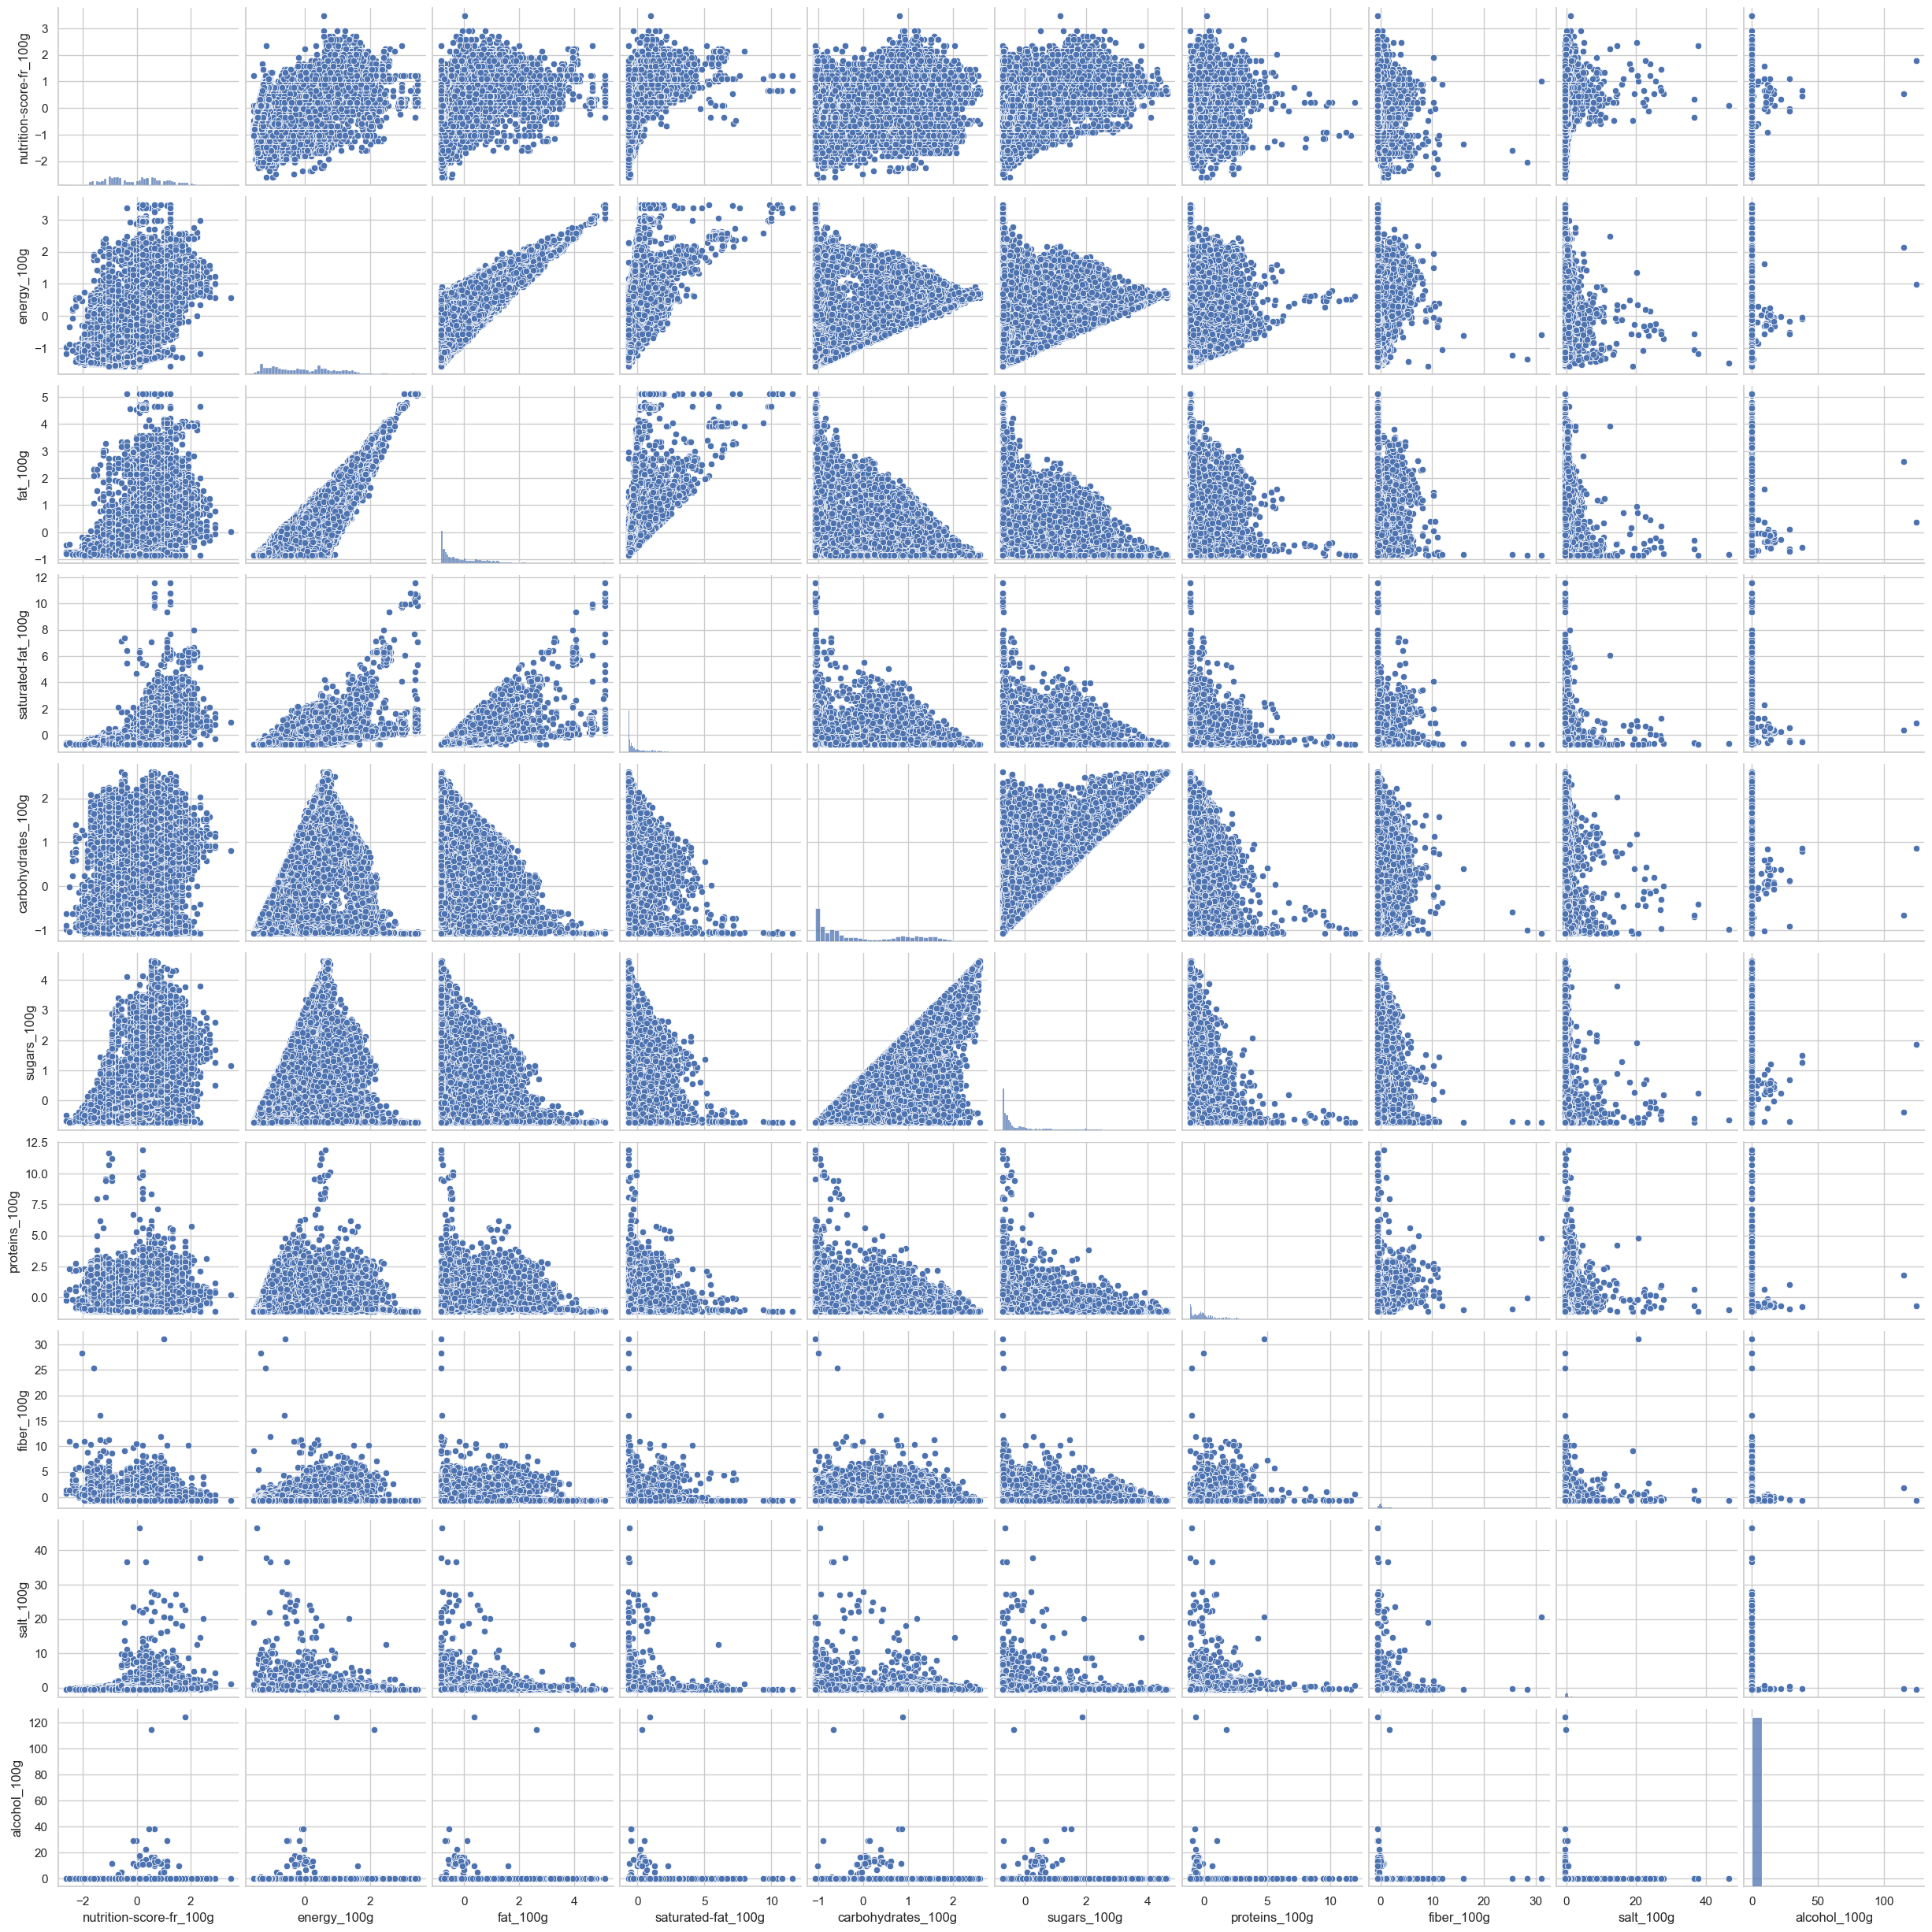

In [146]:
sns.pairplot(imputed_df_normalized[numerics_col])

plt.show()

## Analyse Multivariée

### ANOVA

In [147]:
# Créez un dictionnaire pour stocker les résultats des tests de Tukey pour chaque variable
tukey_results = {}

# Boucle à travers chaque variable numérique
for column in numerics_col:
    # Effectuez l'ANOVA
    formula = f"Q('{column}') ~ C(nutrition_grade_fr)"
    model = ols(formula, data=imputed_df_autre).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    
    # Effectuez le test de Tukey pour les comparaisons post-hoc
    tukey_result = pairwise_tukeyhsd(endog=imputed_df_autre[column], groups=imputed_df_autre['nutrition_grade_fr'], alpha=0.05)
    
    # Stockez les résultats dans le dictionnaire
    tukey_results[column] = {'ANOVA Table': anova_table, 'Tukey Results': tukey_result}

# Affichez les résultats des tests de Tukey pour chaque variable
print("ANOVA pour tous les aliments sauf les boissons")
for column, result in tukey_results.items():
    print(f"Variable: {column}")
    print("Table ANOVA:")
    print(result['ANOVA Table'])
    print("\nRésultats du test de Tukey:")
    print(result['Tukey Results'])
    print("\n")


ANOVA pour tous les aliments sauf les boissons
Variable: nutrition-score-fr_100g
Table ANOVA:
                             sum_sq       df              F  PR(>F)
C(nutrition_grade_fr)  2.848788e+06      4.0  145291.491458     0.0
Residual               1.814420e+05  37015.0            NaN     NaN

Résultats du test de Tukey:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     a      b    4.381   0.0  4.2664  4.4957   True
     a      c   9.3389   0.0  9.2361  9.4417   True
     a      d  17.5132   0.0 17.4171 17.6094   True
     a      e  25.8786   0.0 25.7717 25.9855   True
     b      c   4.9579   0.0  4.8495  5.0662   True
     b      d  13.1322   0.0 13.0301 13.2343   True
     b      e  21.4976   0.0 21.3853 21.6098   True
     c      d   8.1743   0.0  8.0857   8.263   True
     c      e  16.5397   0.0 16.4396 16.6399   True
     d      e   8.3654   0.0  8.2721  8.4587   Tr

<b>Signification Statistique :</b><br>
Les résultats de l'ANOVA et du test de Tukey montrent que les différences entre les groupes de "nutrition_grade_fr" sont statistiquement significatives pour la plupart des variables nutritionnelles, avec des p-valeurs inférieures à 0.05. Cela indique que les variations observées ne sont probablement pas dues au hasard. Les p-valeurs extrêmement faibles suggèrent une forte fiabilité des résultats obtenus.
<br><br>
<b>Interprétation globale :</b><br>
Les résultats suggèrent que le "nutrition_grade_fr" est fortement associé à la plupart des variables nutritionnelles, avec des différences claires et significatives dans les compositions nutritionnelles moyennes entre les différents grades. 
<br><br>
Pour les variables comme les protéines et le sel, où des différences significatives entre certains grades ne sont pas toujours observées, cela peut indiquer que ces composants spécifiques ne contribuent pas de manière aussi importante à la variation des grades nutritionnels, ou que les grades nutritionnels pourraient être influencés par une combinaison plus complexe de facteurs nutritionnels, au-delà de ces seules variables.
<br><br>
En résumé, les grades nutritionnels semblent être un reflet de la composition nutritionnelle des produits

In [148]:
# Créez un dictionnaire pour stocker les résultats des tests de Tukey pour chaque variable
tukey_results = {}

# Boucle à travers chaque variable numérique
for column in numerics_col:
    # Effectuez l'ANOVA
    formula = f"Q('{column}') ~ C(nutrition_grade_fr)"
    model = ols(formula, data=imputed_df_boisson).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    
    # Effectuez le test de Tukey pour les comparaisons post-hoc
    tukey_result = pairwise_tukeyhsd(endog=imputed_df_boisson[column], groups=imputed_df_boisson['nutrition_grade_fr'], alpha=0.05)
    
    # Stockez les résultats dans le dictionnaire
    tukey_results[column] = {'ANOVA Table': anova_table, 'Tukey Results': tukey_result}

# Affichez les résultats des tests de Tukey pour chaque variable
print("ANOVA pour les boissons")
for column, result in tukey_results.items():
    print(f"Variable: {column}")
    print("Table ANOVA:")
    print(result['ANOVA Table'])
    print("\nRésultats du test de Tukey:")
    print(result['Tukey Results'])
    print("\n")


ANOVA pour les boissons
Variable: nutrition-score-fr_100g
Table ANOVA:
                              sum_sq      df            F  PR(>F)
C(nutrition_grade_fr)  112302.640897     4.0  3056.713088     0.0
Residual                27922.151878  3040.0          NaN     NaN

Résultats du test de Tukey:
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     a      b   0.3161 0.9831 -1.2795  1.9117  False
     a      c   3.5758    0.0  2.0149  5.1366   True
     a      d   7.4043    0.0  5.8206  8.9881   True
     a      e  15.5092    0.0 13.9561 17.0624   True
     b      c   3.2597    0.0  2.7466  3.7727   True
     b      d   7.0883    0.0  6.5093  7.6672   True
     b      e  15.1932    0.0 14.7041 15.6822   True
     c      d   3.8286    0.0  3.3537  4.3035   True
     c      e  11.9335    0.0 11.5736 12.2934   True
     d      e   8.1049    0.0   7.656  8.5537   True
-------------

Les boissons semblent présenter un modèle différent de celui des autres aliments en termes d'association entre le "nutrition_grade_fr" et les variables nutritionnelles. Les boissons ont tendance à montrer moins de différences significatives entre certains grades, notament entre les grades a et b.

### ACP

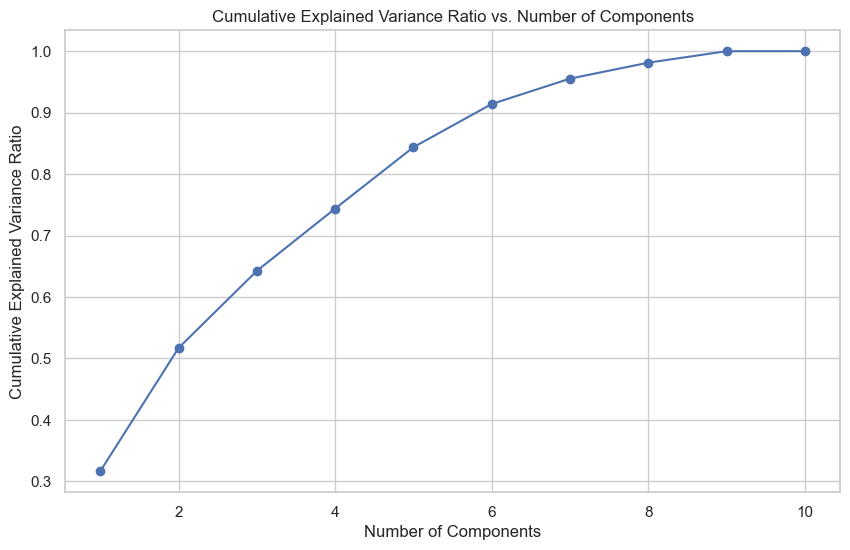

In [149]:
# Application de l'ACP
pca = PCA()
principal_components = pca.fit_transform(imputed_df_normalized[numerics_col])

# Calculate the cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Plot the explained variance ratio and cumulative explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio vs. Number of Components')
plt.grid(True)
plt.show()

In [150]:
# Appliquez la PCA
pca = PCA(n_components=4) 
principal_components = pca.fit_transform(imputed_df_normalized[numerics_col])

# Créez un DataFrame avec les composants principaux
principal_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2', 'Principal Component 3', 'Principal Component 4'], index=imputed_df_normalized.index)


In [151]:
principal_components

array([[-1.16525187, -0.64517656,  4.45095244, -1.0967483 ],
       [-0.85622982, -1.0049031 ,  1.70792088, -0.37204395],
       [-1.60399915,  1.01387764, -0.0455595 , -0.48233884],
       ...,
       [-0.86991458, -0.08715058, -1.34527713,  0.27781103],
       [ 1.42264659,  0.54709108, -0.98254453,  0.15971116],
       [ 4.50215756,  2.20307435, -0.93128058, -2.22269319]])

In [152]:
principal_df.head(5)

Principal Component 1  Principal Component 2  Principal Component 3  \
199713              -1.165252              -0.645177               4.450952   
301839              -0.856230              -1.004903               1.707921   
242326              -1.603999               1.013878              -0.045560   
200440              -1.619257               1.007521              -0.075451   
188918              -0.907854              -0.632663               1.069106   

        Principal Component 4  
199713              -1.096748  
301839              -0.372044  
242326              -0.482339  
200440              -0.490359  
188918              -0.094507

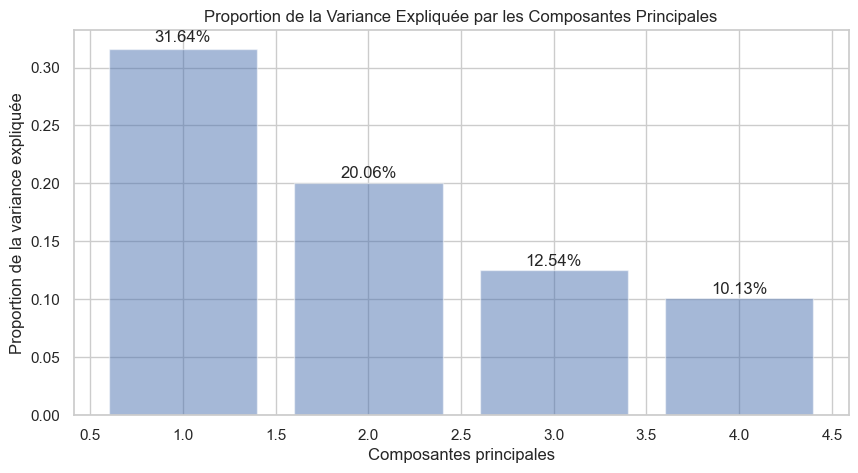

In [153]:
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(10, 5))
bars = plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center')

plt.ylabel('Proportion de la variance expliquée')
plt.xlabel('Composantes principales')
plt.title('Proportion de la Variance Expliquée par les Composantes Principales')
# Ajouter le pourcentage au-dessus de chaque barre
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., 1.01*height, '{0:.2%}'.format(height), ha='center', va='bottom')

plt.show()

In [154]:
#explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance: {explained_variance}")

Explained Variance: [0.31644954 0.20057714 0.12543801 0.10134286]


In [155]:
components_df = pd.DataFrame(pca.components_, columns=[numerics_col], index=[f'PC{i+1}' for i in range(pca.n_components_)])
print(components_df)

    nutrition-score-fr_100g energy_100g  fat_100g saturated-fat_100g  \
PC1                0.462251    0.519558  0.452296           0.438600   
PC2                0.044531   -0.045445  0.296335           0.257600   
PC3               -0.260191    0.207323 -0.017875          -0.123469   
PC4                0.297595   -0.078629 -0.260424          -0.197667   

    carbohydrates_100g sugars_100g proteins_100g fiber_100g salt_100g  \
PC1           0.218090    0.252087      0.049568   0.073561  0.019613   
PC2          -0.561841   -0.513726      0.368544  -0.213603  0.284027   
PC3           0.212691   -0.205354      0.473393   0.725942  0.184509   
PC4           0.179409    0.242978      0.181056  -0.217394  0.784314   

    alcohol_100g  
PC1     0.008872  
PC2    -0.008784  
PC3    -0.034790  
PC4    -0.109300  


In [156]:
def biplot(score, coeff, pcx=1, pcy=2, labels=None):
    xs = score[:, pcx-1]
    ys = score[:, pcy-1]
    n = coeff.shape[0]
    
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    
    plt.scatter(xs * scalex, ys * scaley, alpha=0.5)
    
    for i in range(n):
        plt.arrow(0, 0, coeff[i, pcx-1], coeff[i, pcy-1], color='r', alpha=0.9)
        if labels is None:
            plt.text(coeff[i, pcx-1]* 1.15, coeff[i, pcy-1] * 1.15, "Var"+str(i+1), color='r', ha='center', va='center')
        else:
            plt.text(coeff[i, pcx-1]* 1.15, coeff[i, pcy-1] * 1.15, labels[i], color='g', ha='center', va='center', fontsize=12)
    
    plt.xlim(-0.5, 1)
    plt.ylim(-0.8, 1)
    plt.xlabel(f"PC{pcx}", fontsize=14)
    plt.ylabel(f"PC{pcy}", fontsize=14)
    plt.title(f"Visualisation de l'analyse en composants principaux (PC{pcx} vs PC{pcy})", fontsize=16)
    plt.grid(True)
    plt.axhline(0, color='grey', lw=1)
    plt.axvline(0, color='grey', lw=1)
    plt.show()


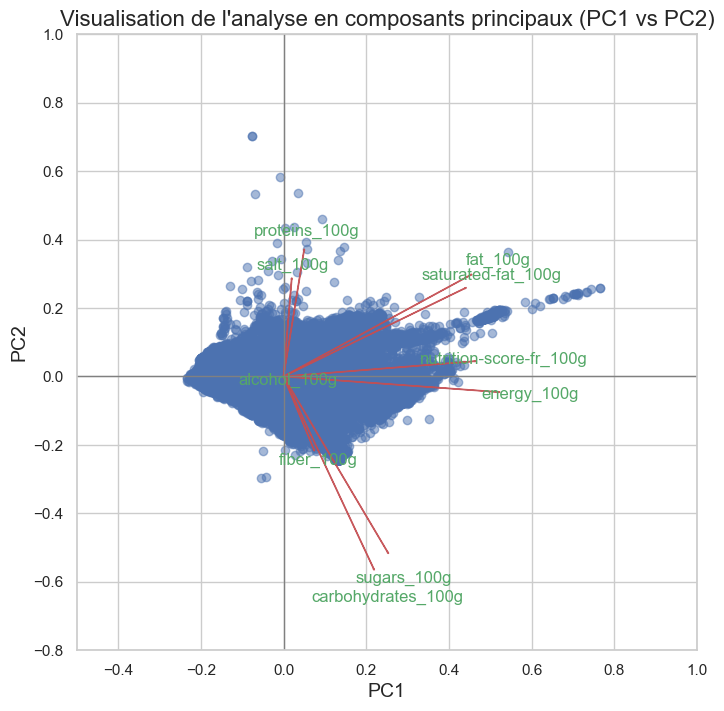

In [157]:
# PCA loading vectors
coeff = pca.components_.T

# Score from PCA
score = principal_components

# Variable names
labels = numerics_col

# Appliquer la fonction pour PC1 vs PC2
plt.figure(figsize=(8, 8))
biplot(score, coeff, pcx=1, pcy=2, labels=labels)


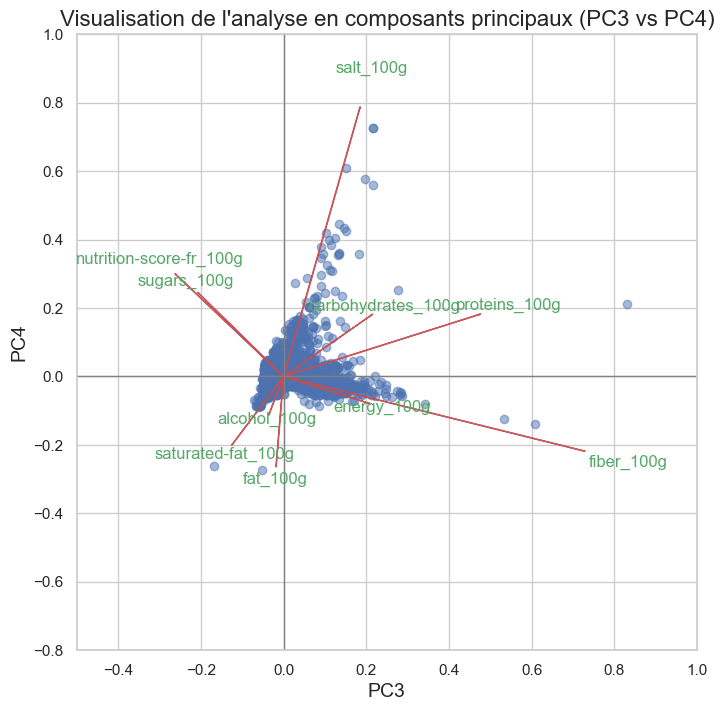

In [158]:
# Appliquer la fonction pour PC3 vs PC4
plt.figure(figsize=(8, 8))
biplot(score, coeff, pcx=3, pcy=4, labels=labels)

PC1 : Le premier composant principal montre une forte association avec le "nutrition-score-fr_100g", l'"energy_100g", le "fat_100g" et le "saturated-fat_100g", indiquant que ce composant pourrait représenter une mesure globale de la densité énergétique et de la teneur en matières grasses des aliments.
<br><br>
PC2 : Le deuxième composant principal est négativement corrélé avec les "carbohydrates_100g" et les "sugars_100g", mais positivement avec les "proteins_100g" et le "salt_100g", ce qui pourrait refléter une sorte d'équilibre entre les sources de glucides et d'autres nutriments comme les protéines et le sel dans les aliments.
<br><br>
PC3 : Le troisième composant principal montre une forte contribution positive des "fibers_100g" et "proteins_100g" et une contribution négative des "sugars_100g" et du "nutrition-score-fr_100g", suggérant que ce composant pourrait représenter un contraste entre les aliments riches en fibres et ceux riches en sucres.
<br><br>
PC4 : Le quatrième composant principal est fortement influencé positivement par le "salt_100g" et négativement par les "fat_100g" et "saturated-fat_100g", indiquant que ce composant pourrait représenter un contraste entre les aliments riches en sel par rapport à ceux riches en graisses.

In [159]:
# On remet le nutrtion_grade
#imputed_df = imputed_df.reset_index()
principal_df['nutrition_grade_fr'] = imputed_df['nutrition_grade_fr']

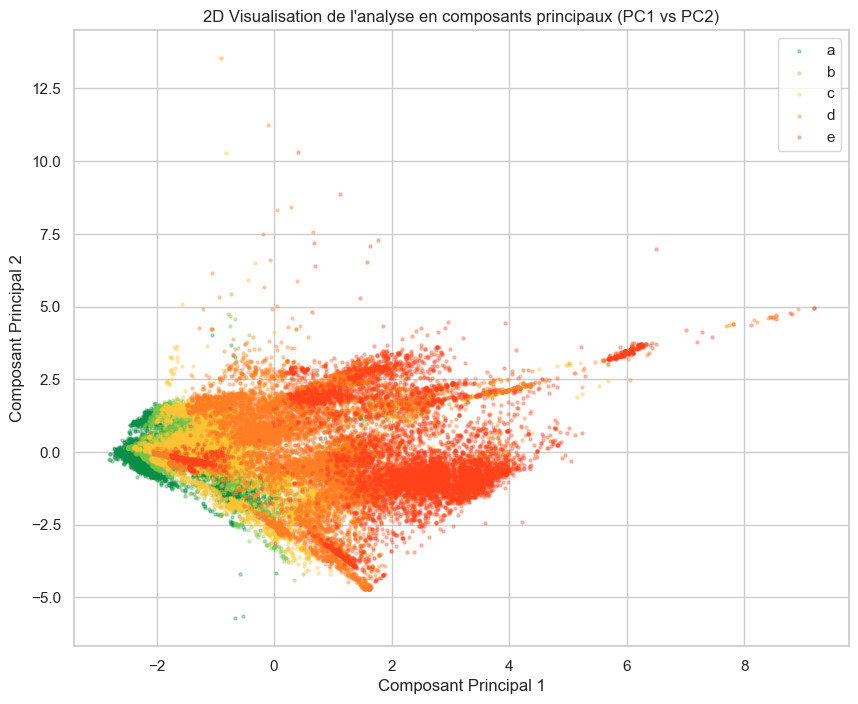

In [160]:
plt.figure(figsize=(10, 8))
plt.grid(True)

# Bouclez sur les catégories de nutrition et créez un scatter plot pour chaque catégorie
for grade in principal_df['nutrition_grade_fr'].unique():
    subset = principal_df[principal_df['nutrition_grade_fr'] == grade]
    plt.scatter(subset['Principal Component 1'],
                subset['Principal Component 2'],
                color=grade_colors[grade],
                alpha=0.3,
                s=5,
                label=grade)     

plt.xlabel('Composant Principal 1')
plt.ylabel('Composant Principal 2')
plt.title("2D Visualisation de l'analyse en composants principaux (PC1 vs PC2)")
plt.legend()
plt.show()


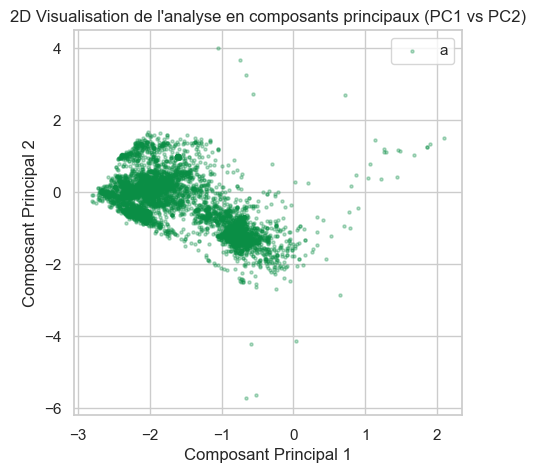

In [161]:
grade_a = principal_df[principal_df['nutrition_grade_fr'] == 'a']

plt.figure(figsize=(5, 5))
plt.grid(True)

# Bouclez sur les catégories de nutrition et créez un scatter plot pour chaque catégorie
for grade in grade_a['nutrition_grade_fr'].unique():
    subset = grade_a[grade_a['nutrition_grade_fr'] == grade]
    plt.scatter(subset['Principal Component 1'],
                subset['Principal Component 2'],
                color=grade_colors[grade],
                alpha=0.3,
                s=5,
                label=grade)     

plt.xlabel('Composant Principal 1')
plt.ylabel('Composant Principal 2')
plt.title("2D Visualisation de l'analyse en composants principaux (PC1 vs PC2)")
plt.legend()
plt.show()


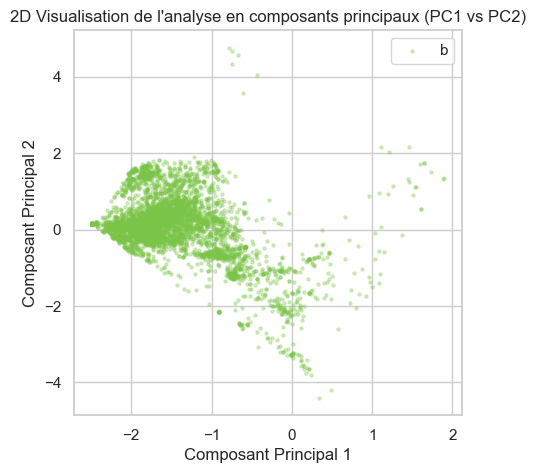

In [162]:
grade_b = principal_df[principal_df['nutrition_grade_fr'] == 'b']

plt.figure(figsize=(5, 5))
plt.grid(True)

# Bouclez sur les catégories de nutrition et créez un scatter plot pour chaque catégorie
for grade in grade_b['nutrition_grade_fr'].unique():
    subset = grade_b[grade_b['nutrition_grade_fr'] == grade]
    plt.scatter(subset['Principal Component 1'],
                subset['Principal Component 2'],
                color=grade_colors[grade],
                alpha=0.3,
                s=5,
                label=grade)     

plt.xlabel('Composant Principal 1')
plt.ylabel('Composant Principal 2')
plt.title("2D Visualisation de l'analyse en composants principaux (PC1 vs PC2)")
plt.legend()
plt.show()

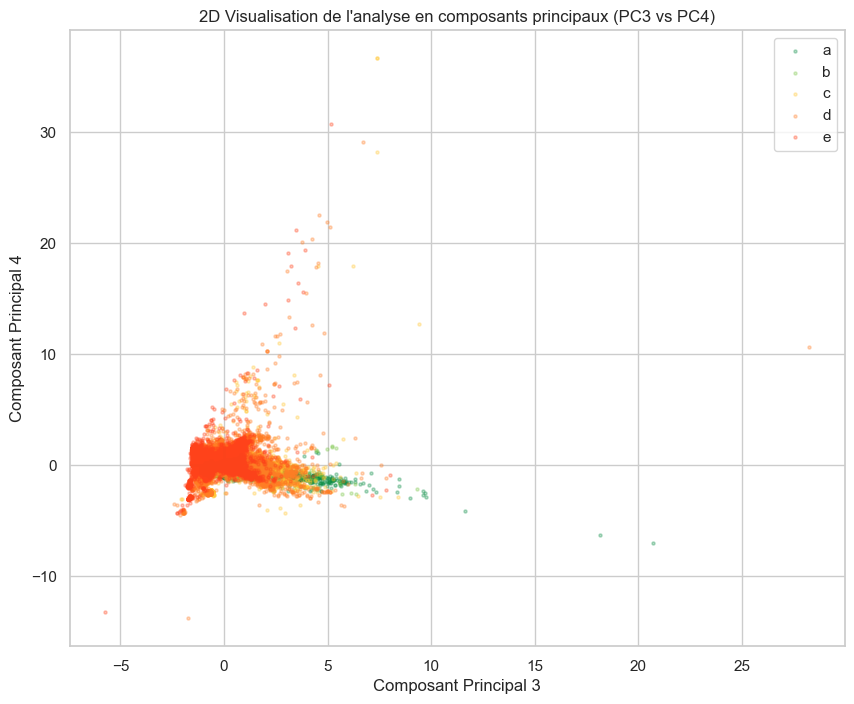

In [163]:
plt.figure(figsize=(10, 8))
plt.grid(True)

# Bouclez sur les catégories de nutrition et créez un scatter plot pour chaque catégorie
for grade in principal_df['nutrition_grade_fr'].unique():
    subset = principal_df[principal_df['nutrition_grade_fr'] == grade]
    plt.scatter(subset['Principal Component 3'],
                subset['Principal Component 4'],
                color=grade_colors[grade],  
                alpha=0.3,
                s=5,
                label=grade)       

plt.xlabel('Composant Principal 3')
plt.ylabel('Composant Principal 4')
plt.title("2D Visualisation de l'analyse en composants principaux (PC3 vs PC4)")
plt.legend()
plt.show()

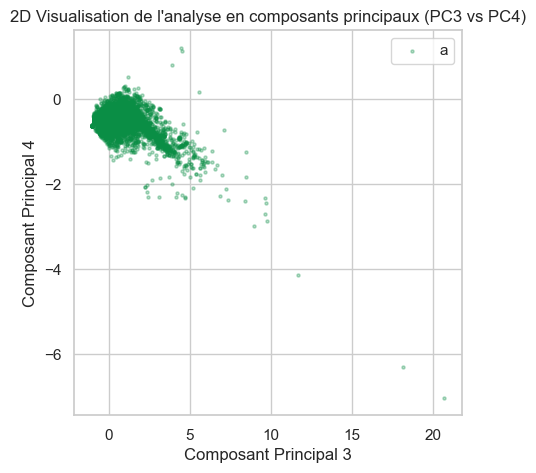

In [164]:
plt.figure(figsize=(5, 5))
plt.grid(True)

# Bouclez sur les catégories de nutrition et créez un scatter plot pour chaque catégorie
for grade in grade_a['nutrition_grade_fr'].unique():
    subset = grade_a[grade_a['nutrition_grade_fr'] == grade]
    plt.scatter(subset['Principal Component 3'],
                subset['Principal Component 4'],
                color=grade_colors[grade],  
                alpha=0.3,
                s=5,
                label=grade)       

plt.xlabel('Composant Principal 3')
plt.ylabel('Composant Principal 4')
plt.title("2D Visualisation de l'analyse en composants principaux (PC3 vs PC4)")
plt.legend()
plt.show()